In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import ResUNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
OxfordIITPet()

Path to downloaded dataset files: /kaggle/input/oxfordiiitpet
Dataset copied to: /content/datasets/oxfordiiitpet
Could not delete original download folder '/kaggle/input/oxfordiiitpet': [Errno 30] Read-only file system: 'sample_149.png'


'/content/datasets/oxfordiiitpet'

In [6]:
config = {"Dir of dataset": "./datasets/oxfordiiitpet", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None,
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "ResUNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-ResUNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1024


Organizing masks: 100%|██████████| 1024/1024 [00:00<00:00, 165937.77it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 146746.18it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 111813.17it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


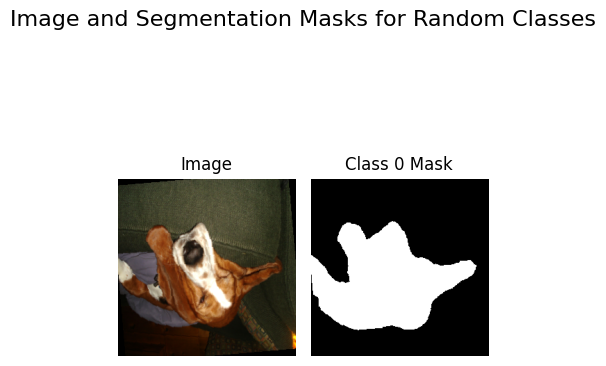

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 176MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

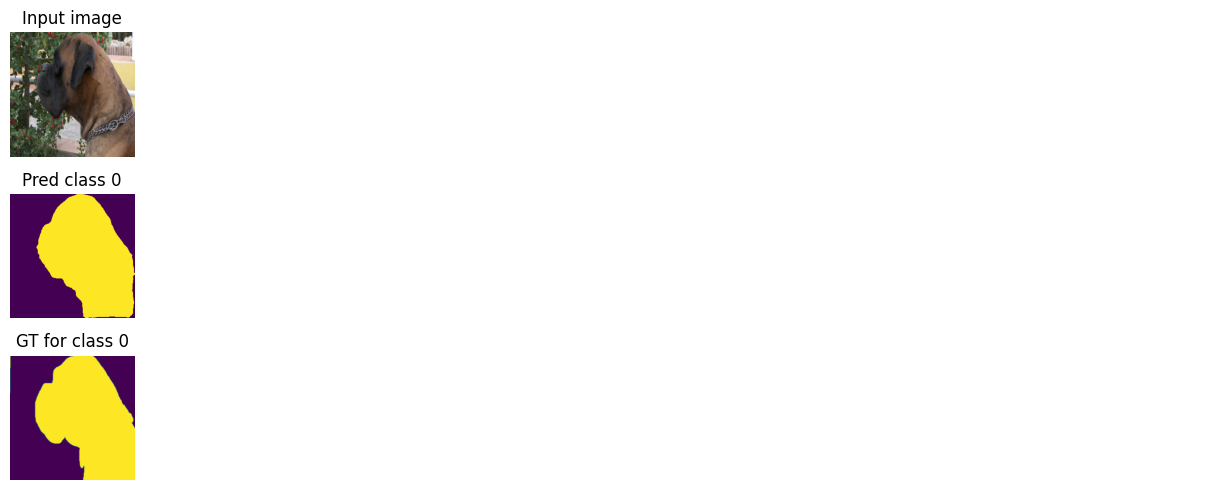

Train loss: 0.45847 | Time: 0m 24s | Val loss: 0.39343
Train_DICE_avg: 0.73293 | Train_Jaccard_avg: 0.62271 | Train_Sensitivity_avg: 0.82074 | Train_Specificity_avg: 0.82187 
Class 0 - Train_DICE: 0.73293 | Train_Jaccard: 0.62271 | Train_Sensitivity: 0.82074 | Train_Specificity: 0.82187 
Val_DICE_avg: 0.88052 | Val_Jaccard_avg: 0.79647 | Val_Sensitivity_avg: 0.89311 | Val_Specificity_avg: 0.90287 
Class 0 - Val_DICE: 0.88052 | Val_Jaccard: 0.79647 | Val_Sensitivity: 0.89311 | Val_Specificity: 0.90287 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.35821 | Time: 0m 47s | Val loss: 0.31086
Train_DICE_avg: 0.89238 | Train_Jaccard_avg: 0.81449 | Train_Sensitivity_avg: 0.86195 | Train_Specificity_avg: 0.94033 
Class 0 - Train_DICE: 0.89238 | Train_Jaccard: 0.81449 | Train_Sensitivity: 0.86195 | Train_Specificity: 0.94033 
Val_DICE_avg: 0.91473 | Val_Jaccard_avg: 0.85070 | Val_Sensitivity_avg: 0.89213 | Val_Specificity_avg: 0.95483 
Class 0 - Val_DICE: 0.91473 | Val_Jaccard: 0.85070 | Val_Sensitivity: 0.89213 | Val_Specificity: 0.95483 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.33463 | Time: 1m 9s | Val loss: 0.31330
Train_DICE_avg: 0.90602 | Train_Jaccard_avg: 0.83547 | Train_Sensitivity_avg: 0.87606 | Train_Specificity_avg: 0.95026 
Class 0 - Train_DICE: 0.90602 | Train_Jaccard: 0.83547 | Train_Sensitivity: 0.87606 | Train_Specificity: 0.95026 
Val_DICE_avg: 0.92337 | Val_Jaccard_avg: 0.86494 | Val_Sensitivity_avg: 0.90217 | Val_Specificity_avg: 0.96092 
Class 0 - Val_DICE: 0.92337 | Val_Jaccard: 0.86494 | Val_Sensitivity: 0.90217 | Val_Specificity: 0.96092 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.32025 | Time: 1m 31s | Val loss: 0.30834
Train_DICE_avg: 0.91078 | Train_Jaccard_avg: 0.84331 | Train_Sensitivity_avg: 0.88030 | Train_Specificity_avg: 0.95512 
Class 0 - Train_DICE: 0.91078 | Train_Jaccard: 0.84331 | Train_Sensitivity: 0.88030 | Train_Specificity: 0.95512 
Val_DICE_avg: 0.92078 | Val_Jaccard_avg: 0.86096 | Val_Sensitivity_avg: 0.88771 | Val_Specificity_avg: 0.97056 
Class 0 - Val_DICE: 0.92078 | Val_Jaccard: 0.86096 | Val_Sensitivity: 0.88771 | Val_Specificity: 0.97056 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.30746 | Time: 1m 53s | Val loss: 0.28837
Train_DICE_avg: 0.91534 | Train_Jaccard_avg: 0.85079 | Train_Sensitivity_avg: 0.88527 | Train_Specificity_avg: 0.95859 
Class 0 - Train_DICE: 0.91534 | Train_Jaccard: 0.85079 | Train_Sensitivity: 0.88527 | Train_Specificity: 0.95859 
Val_DICE_avg: 0.91891 | Val_Jaccard_avg: 0.85854 | Val_Sensitivity_avg: 0.88133 | Val_Specificity_avg: 0.97412 
Class 0 - Val_DICE: 0.91891 | Val_Jaccard: 0.85854 | Val_Sensitivity: 0.88133 | Val_Specificity: 0.97412 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

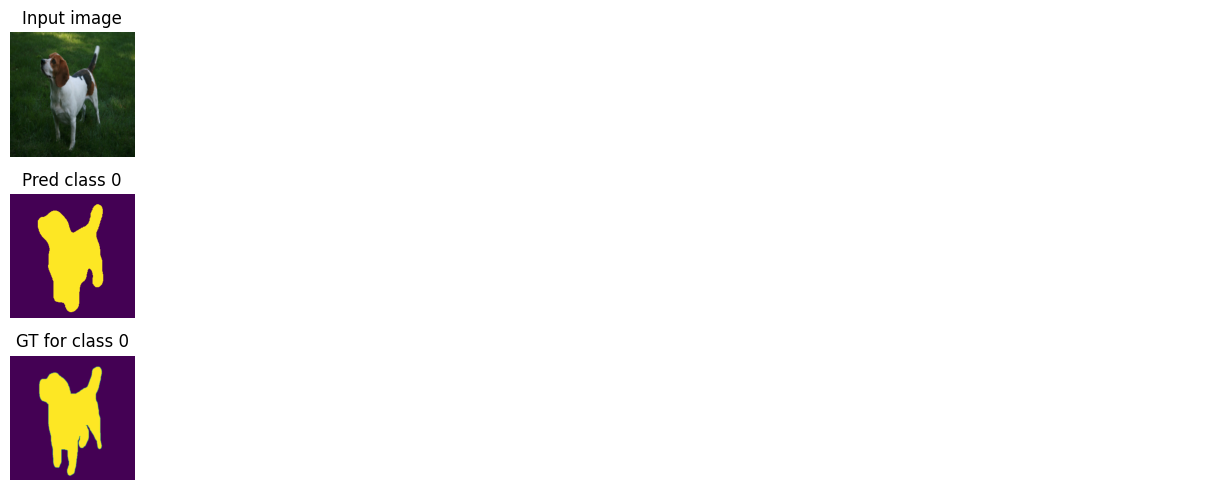

Train loss: 0.29565 | Time: 2m 16s | Val loss: 0.28611
Train_DICE_avg: 0.91757 | Train_Jaccard_avg: 0.85438 | Train_Sensitivity_avg: 0.88589 | Train_Specificity_avg: 0.96307 
Class 0 - Train_DICE: 0.91757 | Train_Jaccard: 0.85438 | Train_Sensitivity: 0.88589 | Train_Specificity: 0.96307 
Val_DICE_avg: 0.92528 | Val_Jaccard_avg: 0.86792 | Val_Sensitivity_avg: 0.89489 | Val_Specificity_avg: 0.97327 
Class 0 - Val_DICE: 0.92528 | Val_Jaccard: 0.86792 | Val_Sensitivity: 0.89489 | Val_Specificity: 0.97327 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.28554 | Time: 2m 39s | Val loss: 0.27600
Train_DICE_avg: 0.91846 | Train_Jaccard_avg: 0.85579 | Train_Sensitivity_avg: 0.88715 | Train_Specificity_avg: 0.96446 
Class 0 - Train_DICE: 0.91846 | Train_Jaccard: 0.85579 | Train_Sensitivity: 0.88715 | Train_Specificity: 0.96446 
Val_DICE_avg: 0.92837 | Val_Jaccard_avg: 0.87333 | Val_Sensitivity_avg: 0.90857 | Val_Specificity_avg: 0.96488 
Class 0 - Val_DICE: 0.92837 | Val_Jaccard: 0.87333 | Val_Sensitivity: 0.90857 | Val_Specificity: 0.96488 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.27470 | Time: 3m 1s | Val loss: 0.27864
Train_DICE_avg: 0.92064 | Train_Jaccard_avg: 0.85911 | Train_Sensitivity_avg: 0.88819 | Train_Specificity_avg: 0.96693 
Class 0 - Train_DICE: 0.92064 | Train_Jaccard: 0.85911 | Train_Sensitivity: 0.88819 | Train_Specificity: 0.96693 
Val_DICE_avg: 0.92034 | Val_Jaccard_avg: 0.85936 | Val_Sensitivity_avg: 0.88044 | Val_Specificity_avg: 0.97971 
Class 0 - Val_DICE: 0.92034 | Val_Jaccard: 0.85936 | Val_Sensitivity: 0.88044 | Val_Specificity: 0.97971 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.26467 | Time: 3m 23s | Val loss: 0.25990
Train_DICE_avg: 0.92284 | Train_Jaccard_avg: 0.86231 | Train_Sensitivity_avg: 0.89072 | Train_Specificity_avg: 0.96877 
Class 0 - Train_DICE: 0.92284 | Train_Jaccard: 0.86231 | Train_Sensitivity: 0.89072 | Train_Specificity: 0.96877 
Val_DICE_avg: 0.92455 | Val_Jaccard_avg: 0.86698 | Val_Sensitivity_avg: 0.89275 | Val_Specificity_avg: 0.97690 
Class 0 - Val_DICE: 0.92455 | Val_Jaccard: 0.86698 | Val_Sensitivity: 0.89275 | Val_Specificity: 0.97690 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.25598 | Time: 3m 45s | Val loss: 0.24750
Train_DICE_avg: 0.92282 | Train_Jaccard_avg: 0.86249 | Train_Sensitivity_avg: 0.89077 | Train_Specificity_avg: 0.96995 
Class 0 - Train_DICE: 0.92282 | Train_Jaccard: 0.86249 | Train_Sensitivity: 0.89077 | Train_Specificity: 0.96995 
Val_DICE_avg: 0.92249 | Val_Jaccard_avg: 0.86393 | Val_Sensitivity_avg: 0.88579 | Val_Specificity_avg: 0.97753 
Class 0 - Val_DICE: 0.92249 | Val_Jaccard: 0.86393 | Val_Sensitivity: 0.88579 | Val_Specificity: 0.97753 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

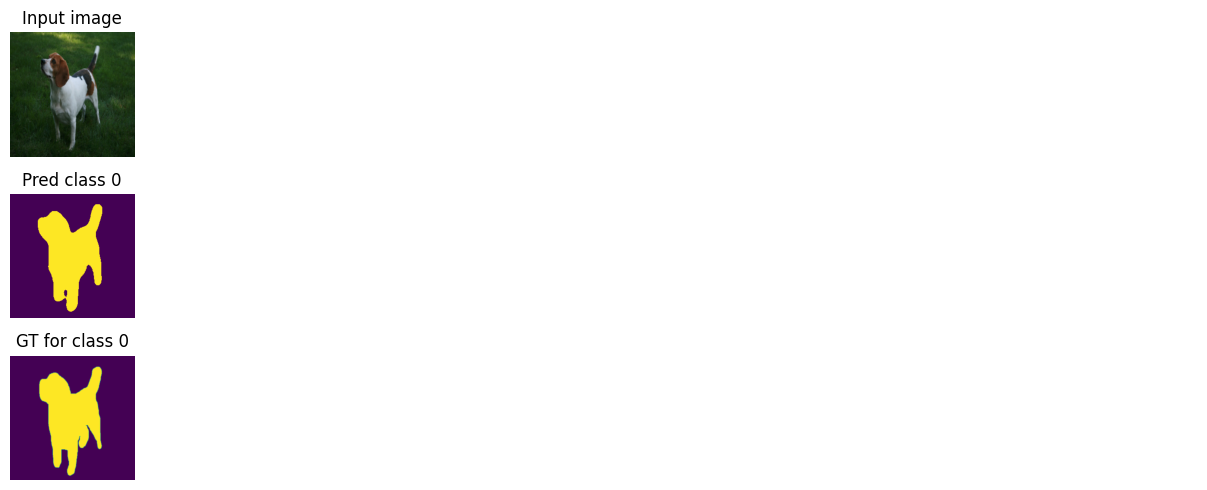

Train loss: 0.24677 | Time: 4m 9s | Val loss: 0.23911
Train_DICE_avg: 0.92545 | Train_Jaccard_avg: 0.86660 | Train_Sensitivity_avg: 0.89524 | Train_Specificity_avg: 0.96900 
Class 0 - Train_DICE: 0.92545 | Train_Jaccard: 0.86660 | Train_Sensitivity: 0.89524 | Train_Specificity: 0.96900 
Val_DICE_avg: 0.92852 | Val_Jaccard_avg: 0.87395 | Val_Sensitivity_avg: 0.90314 | Val_Specificity_avg: 0.97464 
Class 0 - Val_DICE: 0.92852 | Val_Jaccard: 0.87395 | Val_Sensitivity: 0.90314 | Val_Specificity: 0.97464 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23745 | Time: 4m 32s | Val loss: 0.23086
Train_DICE_avg: 0.92609 | Train_Jaccard_avg: 0.86765 | Train_Sensitivity_avg: 0.89611 | Train_Specificity_avg: 0.96991 
Class 0 - Train_DICE: 0.92609 | Train_Jaccard: 0.86765 | Train_Sensitivity: 0.89611 | Train_Specificity: 0.96991 
Val_DICE_avg: 0.93191 | Val_Jaccard_avg: 0.87921 | Val_Sensitivity_avg: 0.91353 | Val_Specificity_avg: 0.97085 
Class 0 - Val_DICE: 0.93191 | Val_Jaccard: 0.87921 | Val_Sensitivity: 0.91353 | Val_Specificity: 0.97085 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22805 | Time: 4m 55s | Val loss: 0.22708
Train_DICE_avg: 0.92958 | Train_Jaccard_avg: 0.87328 | Train_Sensitivity_avg: 0.90194 | Train_Specificity_avg: 0.97158 
Class 0 - Train_DICE: 0.92958 | Train_Jaccard: 0.87328 | Train_Sensitivity: 0.90194 | Train_Specificity: 0.97158 
Val_DICE_avg: 0.93127 | Val_Jaccard_avg: 0.87825 | Val_Sensitivity_avg: 0.90410 | Val_Specificity_avg: 0.97643 
Class 0 - Val_DICE: 0.93127 | Val_Jaccard: 0.87825 | Val_Sensitivity: 0.90410 | Val_Specificity: 0.97643 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22009 | Time: 5m 17s | Val loss: 0.21918
Train_DICE_avg: 0.93015 | Train_Jaccard_avg: 0.87437 | Train_Sensitivity_avg: 0.90249 | Train_Specificity_avg: 0.97138 
Class 0 - Train_DICE: 0.93015 | Train_Jaccard: 0.87437 | Train_Sensitivity: 0.90249 | Train_Specificity: 0.97138 
Val_DICE_avg: 0.93066 | Val_Jaccard_avg: 0.87710 | Val_Sensitivity_avg: 0.90078 | Val_Specificity_avg: 0.97749 
Class 0 - Val_DICE: 0.93066 | Val_Jaccard: 0.87710 | Val_Sensitivity: 0.90078 | Val_Specificity: 0.97749 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21230 | Time: 5m 40s | Val loss: 0.20749
Train_DICE_avg: 0.93200 | Train_Jaccard_avg: 0.87773 | Train_Sensitivity_avg: 0.90688 | Train_Specificity_avg: 0.97041 
Class 0 - Train_DICE: 0.93200 | Train_Jaccard: 0.87773 | Train_Sensitivity: 0.90688 | Train_Specificity: 0.97041 
Val_DICE_avg: 0.93271 | Val_Jaccard_avg: 0.88102 | Val_Sensitivity_avg: 0.91337 | Val_Specificity_avg: 0.97198 
Class 0 - Val_DICE: 0.93271 | Val_Jaccard: 0.88102 | Val_Sensitivity: 0.91337 | Val_Specificity: 0.97198 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

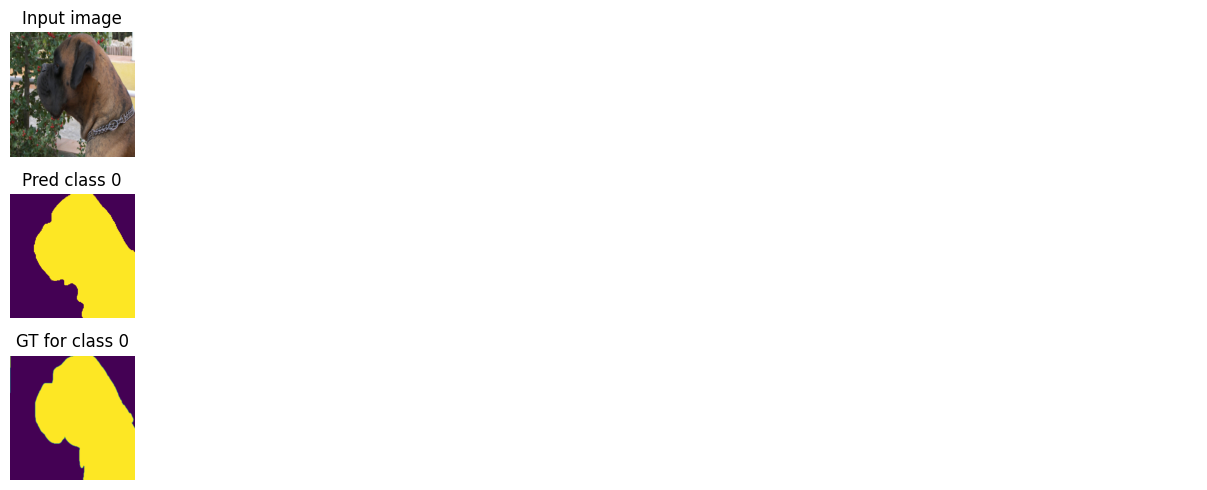

Train loss: 0.20527 | Time: 6m 4s | Val loss: 0.19675
Train_DICE_avg: 0.93257 | Train_Jaccard_avg: 0.87869 | Train_Sensitivity_avg: 0.90878 | Train_Specificity_avg: 0.97046 
Class 0 - Train_DICE: 0.93257 | Train_Jaccard: 0.87869 | Train_Sensitivity: 0.90878 | Train_Specificity: 0.97046 
Val_DICE_avg: 0.93575 | Val_Jaccard_avg: 0.88614 | Val_Sensitivity_avg: 0.92030 | Val_Specificity_avg: 0.97040 
Class 0 - Val_DICE: 0.93575 | Val_Jaccard: 0.88614 | Val_Sensitivity: 0.92030 | Val_Specificity: 0.97040 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19877 | Time: 6m 27s | Val loss: 0.18973
Train_DICE_avg: 0.93411 | Train_Jaccard_avg: 0.88111 | Train_Sensitivity_avg: 0.91184 | Train_Specificity_avg: 0.96877 
Class 0 - Train_DICE: 0.93411 | Train_Jaccard: 0.88111 | Train_Sensitivity: 0.91184 | Train_Specificity: 0.96877 
Val_DICE_avg: 0.93813 | Val_Jaccard_avg: 0.88991 | Val_Sensitivity_avg: 0.93158 | Val_Specificity_avg: 0.96641 
Class 0 - Val_DICE: 0.93813 | Val_Jaccard: 0.88991 | Val_Sensitivity: 0.93158 | Val_Specificity: 0.96641 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19125 | Time: 6m 49s | Val loss: 0.19078
Train_DICE_avg: 0.93564 | Train_Jaccard_avg: 0.88379 | Train_Sensitivity_avg: 0.91449 | Train_Specificity_avg: 0.96900 
Class 0 - Train_DICE: 0.93564 | Train_Jaccard: 0.88379 | Train_Sensitivity: 0.91449 | Train_Specificity: 0.96900 
Val_DICE_avg: 0.93440 | Val_Jaccard_avg: 0.88431 | Val_Sensitivity_avg: 0.92431 | Val_Specificity_avg: 0.96675 
Class 0 - Val_DICE: 0.93440 | Val_Jaccard: 0.88431 | Val_Sensitivity: 0.92431 | Val_Specificity: 0.96675 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18526 | Time: 7m 12s | Val loss: 0.18646
Train_DICE_avg: 0.93617 | Train_Jaccard_avg: 0.88446 | Train_Sensitivity_avg: 0.91653 | Train_Specificity_avg: 0.96902 
Class 0 - Train_DICE: 0.93617 | Train_Jaccard: 0.88446 | Train_Sensitivity: 0.91653 | Train_Specificity: 0.96902 
Val_DICE_avg: 0.93583 | Val_Jaccard_avg: 0.88644 | Val_Sensitivity_avg: 0.92581 | Val_Specificity_avg: 0.96993 
Class 0 - Val_DICE: 0.93583 | Val_Jaccard: 0.88644 | Val_Sensitivity: 0.92581 | Val_Specificity: 0.96993 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17776 | Time: 7m 35s | Val loss: 0.18252
Train_DICE_avg: 0.93944 | Train_Jaccard_avg: 0.88987 | Train_Sensitivity_avg: 0.92031 | Train_Specificity_avg: 0.97010 
Class 0 - Train_DICE: 0.93944 | Train_Jaccard: 0.88987 | Train_Sensitivity: 0.92031 | Train_Specificity: 0.97010 
Val_DICE_avg: 0.93557 | Val_Jaccard_avg: 0.88546 | Val_Sensitivity_avg: 0.93240 | Val_Specificity_avg: 0.96644 
Class 0 - Val_DICE: 0.93557 | Val_Jaccard: 0.88546 | Val_Sensitivity: 0.93240 | Val_Specificity: 0.96644 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

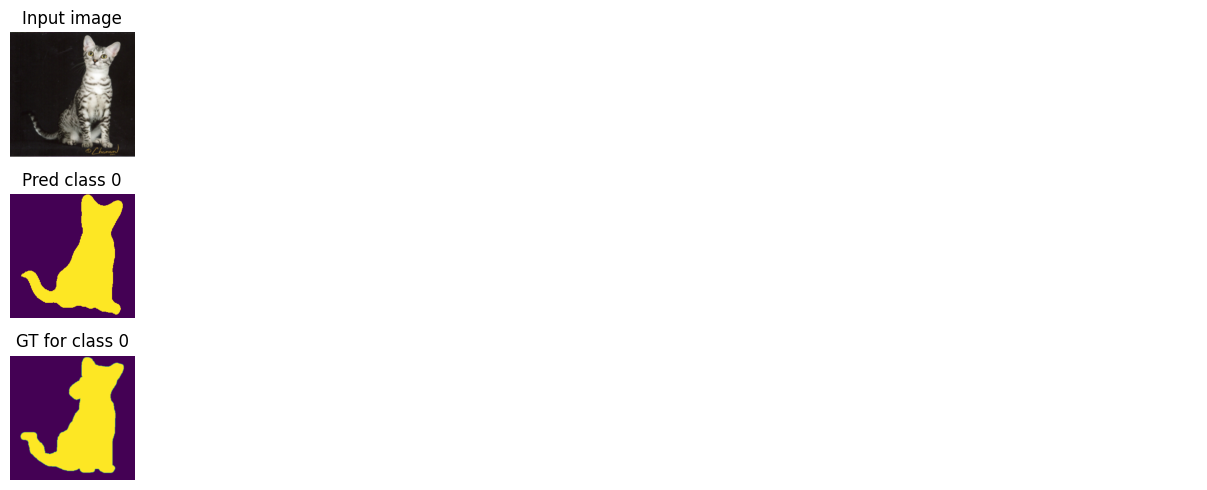

Train loss: 0.17285 | Time: 7m 58s | Val loss: 0.16230
Train_DICE_avg: 0.93887 | Train_Jaccard_avg: 0.88901 | Train_Sensitivity_avg: 0.92260 | Train_Specificity_avg: 0.96726 
Class 0 - Train_DICE: 0.93887 | Train_Jaccard: 0.88901 | Train_Sensitivity: 0.92260 | Train_Specificity: 0.96726 
Val_DICE_avg: 0.93717 | Val_Jaccard_avg: 0.88925 | Val_Sensitivity_avg: 0.94179 | Val_Specificity_avg: 0.96273 
Class 0 - Val_DICE: 0.93717 | Val_Jaccard: 0.88925 | Val_Sensitivity: 0.94179 | Val_Specificity: 0.96273 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16488 | Time: 8m 21s | Val loss: 0.17182
Train_DICE_avg: 0.94156 | Train_Jaccard_avg: 0.89353 | Train_Sensitivity_avg: 0.92567 | Train_Specificity_avg: 0.96918 
Class 0 - Train_DICE: 0.94156 | Train_Jaccard: 0.89353 | Train_Sensitivity: 0.92567 | Train_Specificity: 0.96918 
Val_DICE_avg: 0.93216 | Val_Jaccard_avg: 0.88023 | Val_Sensitivity_avg: 0.92677 | Val_Specificity_avg: 0.96863 
Class 0 - Val_DICE: 0.93216 | Val_Jaccard: 0.88023 | Val_Sensitivity: 0.92677 | Val_Specificity: 0.96863 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15928 | Time: 8m 44s | Val loss: 0.16218
Train_DICE_avg: 0.94147 | Train_Jaccard_avg: 0.89361 | Train_Sensitivity_avg: 0.92588 | Train_Specificity_avg: 0.96898 
Class 0 - Train_DICE: 0.94147 | Train_Jaccard: 0.89361 | Train_Sensitivity: 0.92588 | Train_Specificity: 0.96898 
Val_DICE_avg: 0.93630 | Val_Jaccard_avg: 0.88729 | Val_Sensitivity_avg: 0.93670 | Val_Specificity_avg: 0.96422 
Class 0 - Val_DICE: 0.93630 | Val_Jaccard: 0.88729 | Val_Sensitivity: 0.93670 | Val_Specificity: 0.96422 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15349 | Time: 9m 7s | Val loss: 0.15413
Train_DICE_avg: 0.94247 | Train_Jaccard_avg: 0.89567 | Train_Sensitivity_avg: 0.92869 | Train_Specificity_avg: 0.96781 
Class 0 - Train_DICE: 0.94247 | Train_Jaccard: 0.89567 | Train_Sensitivity: 0.92869 | Train_Specificity: 0.96781 
Val_DICE_avg: 0.93873 | Val_Jaccard_avg: 0.89114 | Val_Sensitivity_avg: 0.93515 | Val_Specificity_avg: 0.96625 
Class 0 - Val_DICE: 0.93873 | Val_Jaccard: 0.89114 | Val_Sensitivity: 0.93515 | Val_Specificity: 0.96625 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14675 | Time: 9m 30s | Val loss: 0.15317
Train_DICE_avg: 0.94558 | Train_Jaccard_avg: 0.90077 | Train_Sensitivity_avg: 0.93362 | Train_Specificity_avg: 0.96835 
Class 0 - Train_DICE: 0.94558 | Train_Jaccard: 0.90077 | Train_Sensitivity: 0.93362 | Train_Specificity: 0.96835 
Val_DICE_avg: 0.93671 | Val_Jaccard_avg: 0.88826 | Val_Sensitivity_avg: 0.93495 | Val_Specificity_avg: 0.96565 
Class 0 - Val_DICE: 0.93671 | Val_Jaccard: 0.88826 | Val_Sensitivity: 0.93495 | Val_Specificity: 0.96565 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

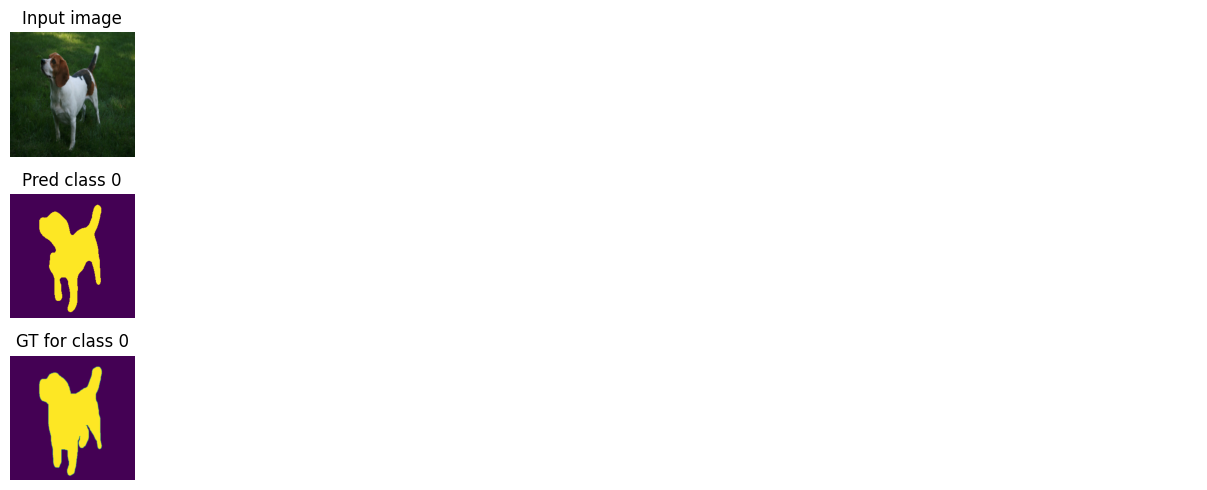

Train loss: 0.14204 | Time: 9m 53s | Val loss: 0.13807
Train_DICE_avg: 0.94556 | Train_Jaccard_avg: 0.90085 | Train_Sensitivity_avg: 0.93430 | Train_Specificity_avg: 0.96748 
Class 0 - Train_DICE: 0.94556 | Train_Jaccard: 0.90085 | Train_Sensitivity: 0.93430 | Train_Specificity: 0.96748 
Val_DICE_avg: 0.93834 | Val_Jaccard_avg: 0.89102 | Val_Sensitivity_avg: 0.94607 | Val_Specificity_avg: 0.96020 
Class 0 - Val_DICE: 0.93834 | Val_Jaccard: 0.89102 | Val_Sensitivity: 0.94607 | Val_Specificity: 0.96020 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13670 | Time: 10m 16s | Val loss: 0.13479
Train_DICE_avg: 0.94709 | Train_Jaccard_avg: 0.90341 | Train_Sensitivity_avg: 0.93688 | Train_Specificity_avg: 0.96752 
Class 0 - Train_DICE: 0.94709 | Train_Jaccard: 0.90341 | Train_Sensitivity: 0.93688 | Train_Specificity: 0.96752 
Val_DICE_avg: 0.93952 | Val_Jaccard_avg: 0.89272 | Val_Sensitivity_avg: 0.94218 | Val_Specificity_avg: 0.96348 
Class 0 - Val_DICE: 0.93952 | Val_Jaccard: 0.89272 | Val_Sensitivity: 0.94218 | Val_Specificity: 0.96348 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13181 | Time: 10m 39s | Val loss: 0.13783
Train_DICE_avg: 0.94781 | Train_Jaccard_avg: 0.90443 | Train_Sensitivity_avg: 0.93825 | Train_Specificity_avg: 0.96709 
Class 0 - Train_DICE: 0.94781 | Train_Jaccard: 0.90443 | Train_Sensitivity: 0.93825 | Train_Specificity: 0.96709 
Val_DICE_avg: 0.93987 | Val_Jaccard_avg: 0.89407 | Val_Sensitivity_avg: 0.93921 | Val_Specificity_avg: 0.96471 
Class 0 - Val_DICE: 0.93987 | Val_Jaccard: 0.89407 | Val_Sensitivity: 0.93921 | Val_Specificity: 0.96471 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12784 | Time: 11m 2s | Val loss: 0.13373
Train_DICE_avg: 0.94791 | Train_Jaccard_avg: 0.90472 | Train_Sensitivity_avg: 0.93872 | Train_Specificity_avg: 0.96725 
Class 0 - Train_DICE: 0.94791 | Train_Jaccard: 0.90472 | Train_Sensitivity: 0.93872 | Train_Specificity: 0.96725 
Val_DICE_avg: 0.93634 | Val_Jaccard_avg: 0.88819 | Val_Sensitivity_avg: 0.94212 | Val_Specificity_avg: 0.96168 
Class 0 - Val_DICE: 0.93634 | Val_Jaccard: 0.88819 | Val_Sensitivity: 0.94212 | Val_Specificity: 0.96168 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12320 | Time: 11m 24s | Val loss: 0.13233
Train_DICE_avg: 0.94903 | Train_Jaccard_avg: 0.90649 | Train_Sensitivity_avg: 0.94081 | Train_Specificity_avg: 0.96795 
Class 0 - Train_DICE: 0.94903 | Train_Jaccard: 0.90649 | Train_Sensitivity: 0.94081 | Train_Specificity: 0.96795 
Val_DICE_avg: 0.93725 | Val_Jaccard_avg: 0.89016 | Val_Sensitivity_avg: 0.94535 | Val_Specificity_avg: 0.95950 
Class 0 - Val_DICE: 0.93725 | Val_Jaccard: 0.89016 | Val_Sensitivity: 0.94535 | Val_Specificity: 0.95950 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

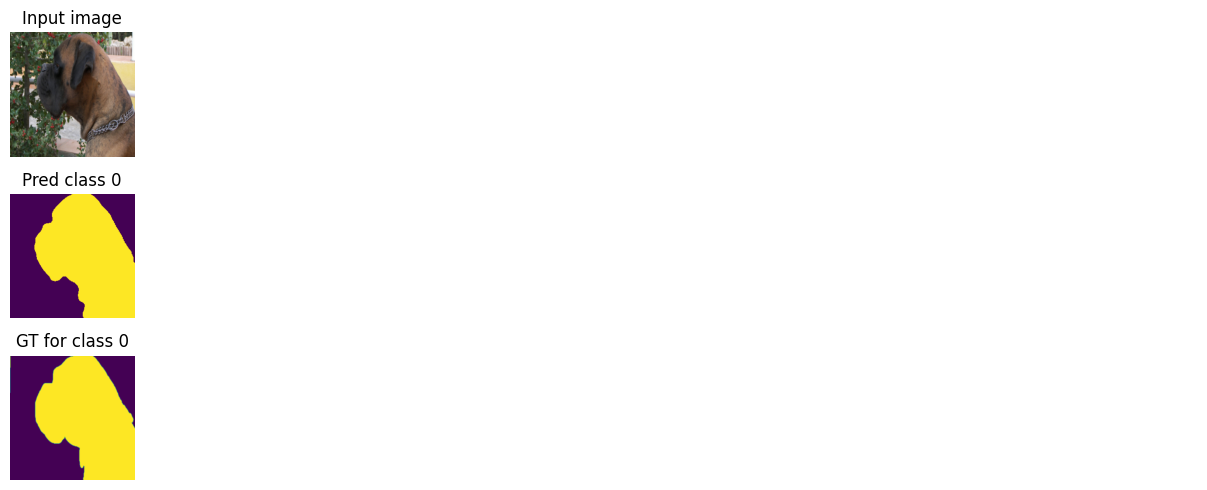

Train loss: 0.12007 | Time: 11m 48s | Val loss: 0.12866
Train_DICE_avg: 0.94838 | Train_Jaccard_avg: 0.90553 | Train_Sensitivity_avg: 0.94123 | Train_Specificity_avg: 0.96587 
Class 0 - Train_DICE: 0.94838 | Train_Jaccard: 0.90553 | Train_Sensitivity: 0.94123 | Train_Specificity: 0.96587 
Val_DICE_avg: 0.93789 | Val_Jaccard_avg: 0.89108 | Val_Sensitivity_avg: 0.92980 | Val_Specificity_avg: 0.96920 
Class 0 - Val_DICE: 0.93789 | Val_Jaccard: 0.89108 | Val_Sensitivity: 0.92980 | Val_Specificity: 0.96920 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11367 | Time: 12m 11s | Val loss: 0.12318
Train_DICE_avg: 0.95133 | Train_Jaccard_avg: 0.91064 | Train_Sensitivity_avg: 0.94448 | Train_Specificity_avg: 0.96853 
Class 0 - Train_DICE: 0.95133 | Train_Jaccard: 0.91064 | Train_Sensitivity: 0.94448 | Train_Specificity: 0.96853 
Val_DICE_avg: 0.94043 | Val_Jaccard_avg: 0.89488 | Val_Sensitivity_avg: 0.94792 | Val_Specificity_avg: 0.95993 
Class 0 - Val_DICE: 0.94043 | Val_Jaccard: 0.89488 | Val_Sensitivity: 0.94792 | Val_Specificity: 0.95993 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10923 | Time: 12m 34s | Val loss: 0.12052
Train_DICE_avg: 0.95208 | Train_Jaccard_avg: 0.91205 | Train_Sensitivity_avg: 0.94573 | Train_Specificity_avg: 0.96783 
Class 0 - Train_DICE: 0.95208 | Train_Jaccard: 0.91205 | Train_Sensitivity: 0.94573 | Train_Specificity: 0.96783 
Val_DICE_avg: 0.94095 | Val_Jaccard_avg: 0.89531 | Val_Sensitivity_avg: 0.94756 | Val_Specificity_avg: 0.96074 
Class 0 - Val_DICE: 0.94095 | Val_Jaccard: 0.89531 | Val_Sensitivity: 0.94756 | Val_Specificity: 0.96074 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10581 | Time: 12m 57s | Val loss: 0.11653
Train_DICE_avg: 0.95257 | Train_Jaccard_avg: 0.91282 | Train_Sensitivity_avg: 0.94657 | Train_Specificity_avg: 0.96845 
Class 0 - Train_DICE: 0.95257 | Train_Jaccard: 0.91282 | Train_Sensitivity: 0.94657 | Train_Specificity: 0.96845 
Val_DICE_avg: 0.94037 | Val_Jaccard_avg: 0.89463 | Val_Sensitivity_avg: 0.94110 | Val_Specificity_avg: 0.96368 
Class 0 - Val_DICE: 0.94037 | Val_Jaccard: 0.89463 | Val_Sensitivity: 0.94110 | Val_Specificity: 0.96368 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10160 | Time: 13m 20s | Val loss: 0.11249
Train_DICE_avg: 0.95430 | Train_Jaccard_avg: 0.91580 | Train_Sensitivity_avg: 0.94897 | Train_Specificity_avg: 0.96909 
Class 0 - Train_DICE: 0.95430 | Train_Jaccard: 0.91580 | Train_Sensitivity: 0.94897 | Train_Specificity: 0.96909 
Val_DICE_avg: 0.93962 | Val_Jaccard_avg: 0.89332 | Val_Sensitivity_avg: 0.95250 | Val_Specificity_avg: 0.95658 
Class 0 - Val_DICE: 0.93962 | Val_Jaccard: 0.89332 | Val_Sensitivity: 0.95250 | Val_Specificity: 0.95658 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

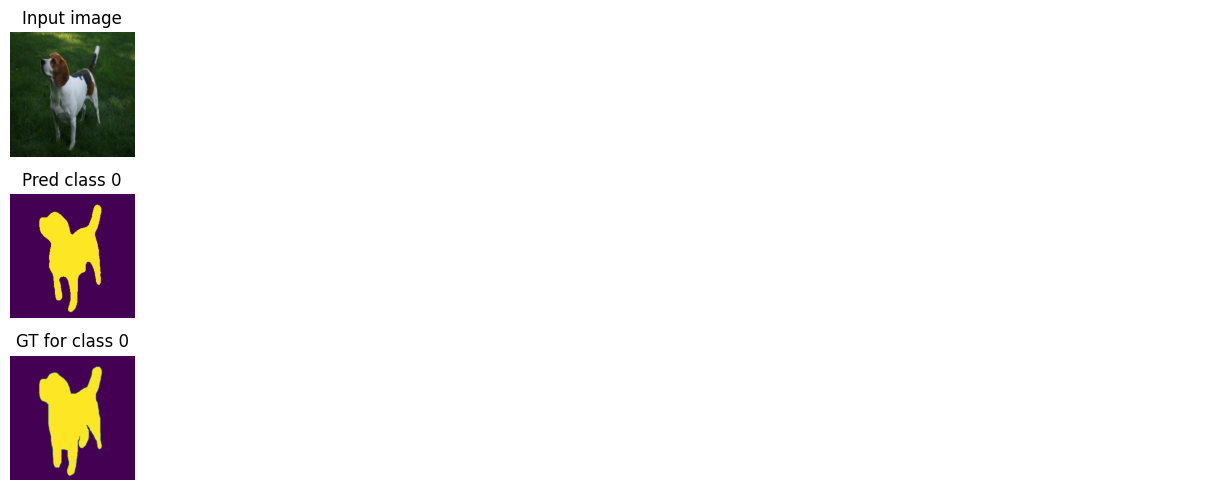

Train loss: 0.09799 | Time: 13m 43s | Val loss: 0.10919
Train_DICE_avg: 0.95558 | Train_Jaccard_avg: 0.91818 | Train_Sensitivity_avg: 0.95015 | Train_Specificity_avg: 0.97033 
Class 0 - Train_DICE: 0.95558 | Train_Jaccard: 0.91818 | Train_Sensitivity: 0.95015 | Train_Specificity: 0.97033 
Val_DICE_avg: 0.93983 | Val_Jaccard_avg: 0.89401 | Val_Sensitivity_avg: 0.94333 | Val_Specificity_avg: 0.96398 
Class 0 - Val_DICE: 0.93983 | Val_Jaccard: 0.89401 | Val_Sensitivity: 0.94333 | Val_Specificity: 0.96398 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09672 | Time: 14m 6s | Val loss: 0.10604
Train_DICE_avg: 0.95448 | Train_Jaccard_avg: 0.91635 | Train_Sensitivity_avg: 0.94963 | Train_Specificity_avg: 0.96848 
Class 0 - Train_DICE: 0.95448 | Train_Jaccard: 0.91635 | Train_Sensitivity: 0.94963 | Train_Specificity: 0.96848 
Val_DICE_avg: 0.94047 | Val_Jaccard_avg: 0.89509 | Val_Sensitivity_avg: 0.95484 | Val_Specificity_avg: 0.95577 
Class 0 - Val_DICE: 0.94047 | Val_Jaccard: 0.89509 | Val_Sensitivity: 0.95484 | Val_Specificity: 0.95577 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09369 | Time: 14m 29s | Val loss: 0.10467
Train_DICE_avg: 0.95565 | Train_Jaccard_avg: 0.91828 | Train_Sensitivity_avg: 0.95123 | Train_Specificity_avg: 0.96965 
Class 0 - Train_DICE: 0.95565 | Train_Jaccard: 0.91828 | Train_Sensitivity: 0.95123 | Train_Specificity: 0.96965 
Val_DICE_avg: 0.94118 | Val_Jaccard_avg: 0.89614 | Val_Sensitivity_avg: 0.94907 | Val_Specificity_avg: 0.95908 
Class 0 - Val_DICE: 0.94118 | Val_Jaccard: 0.89614 | Val_Sensitivity: 0.94907 | Val_Specificity: 0.95908 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09143 | Time: 14m 53s | Val loss: 0.10195
Train_DICE_avg: 0.95623 | Train_Jaccard_avg: 0.91937 | Train_Sensitivity_avg: 0.95204 | Train_Specificity_avg: 0.97023 
Class 0 - Train_DICE: 0.95623 | Train_Jaccard: 0.91937 | Train_Sensitivity: 0.95204 | Train_Specificity: 0.97023 
Val_DICE_avg: 0.94236 | Val_Jaccard_avg: 0.89761 | Val_Sensitivity_avg: 0.94187 | Val_Specificity_avg: 0.96542 
Class 0 - Val_DICE: 0.94236 | Val_Jaccard: 0.89761 | Val_Sensitivity: 0.94187 | Val_Specificity: 0.96542 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08945 | Time: 15m 16s | Val loss: 0.10083
Train_DICE_avg: 0.95650 | Train_Jaccard_avg: 0.91977 | Train_Sensitivity_avg: 0.95189 | Train_Specificity_avg: 0.97056 
Class 0 - Train_DICE: 0.95650 | Train_Jaccard: 0.91977 | Train_Sensitivity: 0.95189 | Train_Specificity: 0.97056 
Val_DICE_avg: 0.94201 | Val_Jaccard_avg: 0.89699 | Val_Sensitivity_avg: 0.95186 | Val_Specificity_avg: 0.95933 
Class 0 - Val_DICE: 0.94201 | Val_Jaccard: 0.89699 | Val_Sensitivity: 0.95186 | Val_Specificity: 0.95933 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

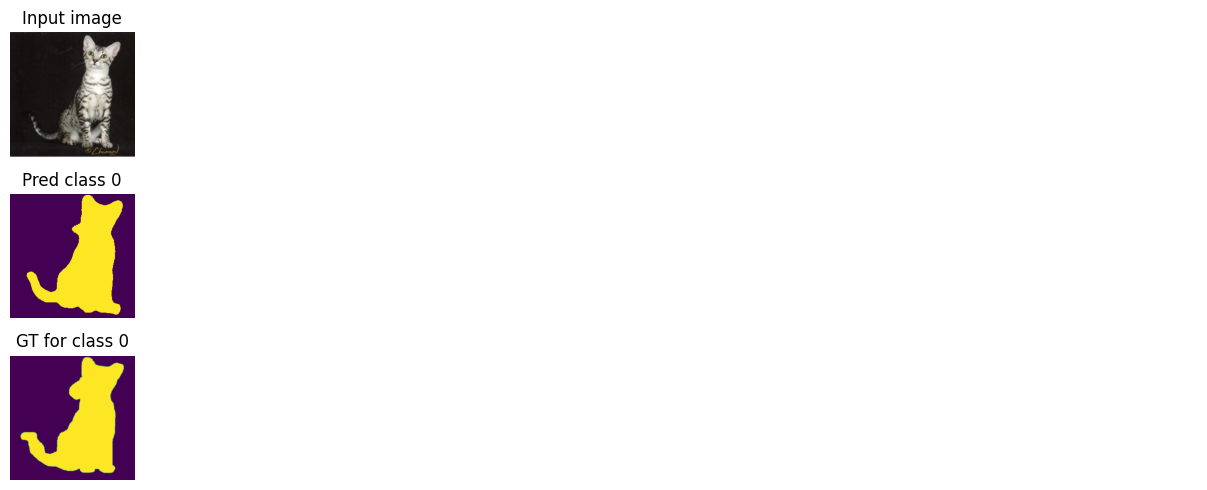

Train loss: 0.08698 | Time: 15m 39s | Val loss: 0.09991
Train_DICE_avg: 0.95779 | Train_Jaccard_avg: 0.92208 | Train_Sensitivity_avg: 0.95407 | Train_Specificity_avg: 0.97000 
Class 0 - Train_DICE: 0.95779 | Train_Jaccard: 0.92208 | Train_Sensitivity: 0.95407 | Train_Specificity: 0.97000 
Val_DICE_avg: 0.94075 | Val_Jaccard_avg: 0.89518 | Val_Sensitivity_avg: 0.95275 | Val_Specificity_avg: 0.95725 
Class 0 - Val_DICE: 0.94075 | Val_Jaccard: 0.89518 | Val_Sensitivity: 0.95275 | Val_Specificity: 0.95725 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08491 | Time: 16m 2s | Val loss: 0.09943
Train_DICE_avg: 0.95866 | Train_Jaccard_avg: 0.92364 | Train_Sensitivity_avg: 0.95538 | Train_Specificity_avg: 0.97067 
Class 0 - Train_DICE: 0.95866 | Train_Jaccard: 0.92364 | Train_Sensitivity: 0.95538 | Train_Specificity: 0.97067 
Val_DICE_avg: 0.94107 | Val_Jaccard_avg: 0.89571 | Val_Sensitivity_avg: 0.95006 | Val_Specificity_avg: 0.95837 
Class 0 - Val_DICE: 0.94107 | Val_Jaccard: 0.89571 | Val_Sensitivity: 0.95006 | Val_Specificity: 0.95837 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08434 | Time: 16m 25s | Val loss: 0.09819
Train_DICE_avg: 0.95788 | Train_Jaccard_avg: 0.92234 | Train_Sensitivity_avg: 0.95420 | Train_Specificity_avg: 0.97155 
Class 0 - Train_DICE: 0.95788 | Train_Jaccard: 0.92234 | Train_Sensitivity: 0.95420 | Train_Specificity: 0.97155 
Val_DICE_avg: 0.94169 | Val_Jaccard_avg: 0.89670 | Val_Sensitivity_avg: 0.94658 | Val_Specificity_avg: 0.96146 
Class 0 - Val_DICE: 0.94169 | Val_Jaccard: 0.89670 | Val_Sensitivity: 0.94658 | Val_Specificity: 0.96146 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08206 | Time: 16m 48s | Val loss: 0.09556
Train_DICE_avg: 0.95916 | Train_Jaccard_avg: 0.92456 | Train_Sensitivity_avg: 0.95521 | Train_Specificity_avg: 0.97237 
Class 0 - Train_DICE: 0.95916 | Train_Jaccard: 0.92456 | Train_Sensitivity: 0.95521 | Train_Specificity: 0.97237 
Val_DICE_avg: 0.94229 | Val_Jaccard_avg: 0.89768 | Val_Sensitivity_avg: 0.94724 | Val_Specificity_avg: 0.96112 
Class 0 - Val_DICE: 0.94229 | Val_Jaccard: 0.89768 | Val_Sensitivity: 0.94724 | Val_Specificity: 0.96112 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08169 | Time: 17m 11s | Val loss: 0.09520
Train_DICE_avg: 0.95848 | Train_Jaccard_avg: 0.92344 | Train_Sensitivity_avg: 0.95548 | Train_Specificity_avg: 0.97057 
Class 0 - Train_DICE: 0.95848 | Train_Jaccard: 0.92344 | Train_Sensitivity: 0.95548 | Train_Specificity: 0.97057 
Val_DICE_avg: 0.94175 | Val_Jaccard_avg: 0.89683 | Val_Sensitivity_avg: 0.94560 | Val_Specificity_avg: 0.96116 
Class 0 - Val_DICE: 0.94175 | Val_Jaccard: 0.89683 | Val_Sensitivity: 0.94560 | Val_Specificity: 0.96116 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

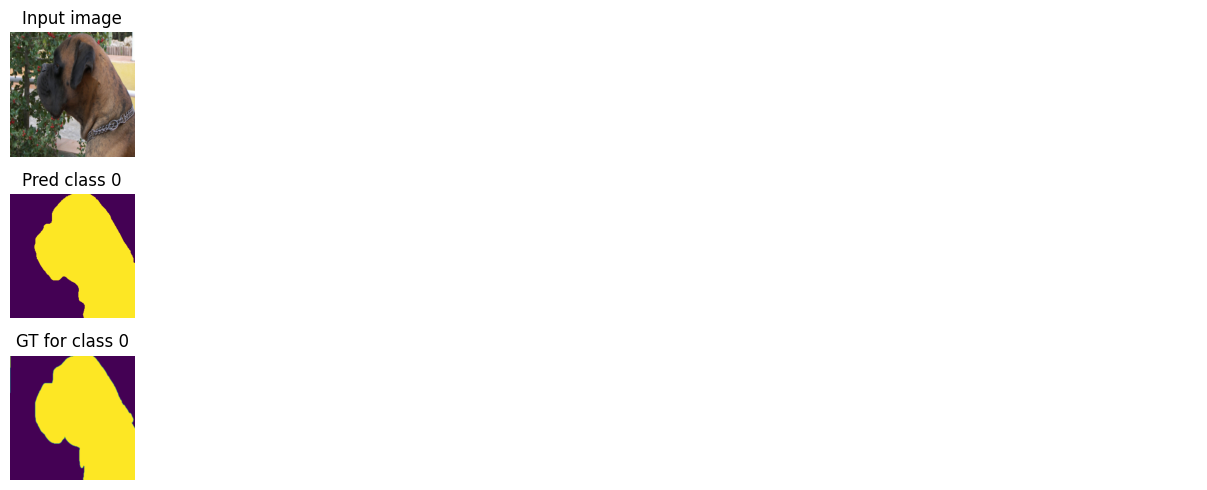

Train loss: 0.07969 | Time: 17m 34s | Val loss: 0.09323
Train_DICE_avg: 0.95972 | Train_Jaccard_avg: 0.92558 | Train_Sensitivity_avg: 0.95655 | Train_Specificity_avg: 0.97186 
Class 0 - Train_DICE: 0.95972 | Train_Jaccard: 0.92558 | Train_Sensitivity: 0.95655 | Train_Specificity: 0.97186 
Val_DICE_avg: 0.94294 | Val_Jaccard_avg: 0.89898 | Val_Sensitivity_avg: 0.94395 | Val_Specificity_avg: 0.96374 
Class 0 - Val_DICE: 0.94294 | Val_Jaccard: 0.89898 | Val_Sensitivity: 0.94395 | Val_Specificity: 0.96374 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07855 | Time: 17m 57s | Val loss: 0.09439
Train_DICE_avg: 0.95995 | Train_Jaccard_avg: 0.92601 | Train_Sensitivity_avg: 0.95637 | Train_Specificity_avg: 0.97110 
Class 0 - Train_DICE: 0.95995 | Train_Jaccard: 0.92601 | Train_Sensitivity: 0.95637 | Train_Specificity: 0.97110 
Val_DICE_avg: 0.94258 | Val_Jaccard_avg: 0.89838 | Val_Sensitivity_avg: 0.94302 | Val_Specificity_avg: 0.96402 
Class 0 - Val_DICE: 0.94258 | Val_Jaccard: 0.89838 | Val_Sensitivity: 0.94302 | Val_Specificity: 0.96402 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07778 | Time: 18m 20s | Val loss: 0.09272
Train_DICE_avg: 0.96004 | Train_Jaccard_avg: 0.92620 | Train_Sensitivity_avg: 0.95728 | Train_Specificity_avg: 0.97143 
Class 0 - Train_DICE: 0.96004 | Train_Jaccard: 0.92620 | Train_Sensitivity: 0.95728 | Train_Specificity: 0.97143 
Val_DICE_avg: 0.94257 | Val_Jaccard_avg: 0.89839 | Val_Sensitivity_avg: 0.94384 | Val_Specificity_avg: 0.96288 
Class 0 - Val_DICE: 0.94257 | Val_Jaccard: 0.89839 | Val_Sensitivity: 0.94384 | Val_Specificity: 0.96288 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07647 | Time: 18m 43s | Val loss: 0.09224
Train_DICE_avg: 0.96057 | Train_Jaccard_avg: 0.92712 | Train_Sensitivity_avg: 0.95733 | Train_Specificity_avg: 0.97227 
Class 0 - Train_DICE: 0.96057 | Train_Jaccard: 0.92712 | Train_Sensitivity: 0.95733 | Train_Specificity: 0.97227 
Val_DICE_avg: 0.94270 | Val_Jaccard_avg: 0.89849 | Val_Sensitivity_avg: 0.94091 | Val_Specificity_avg: 0.96476 
Class 0 - Val_DICE: 0.94270 | Val_Jaccard: 0.89849 | Val_Sensitivity: 0.94091 | Val_Specificity: 0.96476 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07627 | Time: 19m 6s | Val loss: 0.09282
Train_DICE_avg: 0.96014 | Train_Jaccard_avg: 0.92654 | Train_Sensitivity_avg: 0.95738 | Train_Specificity_avg: 0.97287 
Class 0 - Train_DICE: 0.96014 | Train_Jaccard: 0.92654 | Train_Sensitivity: 0.95738 | Train_Specificity: 0.97287 
Val_DICE_avg: 0.94258 | Val_Jaccard_avg: 0.89815 | Val_Sensitivity_avg: 0.94374 | Val_Specificity_avg: 0.96274 
Class 0 - Val_DICE: 0.94258 | Val_Jaccard: 0.89815 | Val_Sensitivity: 0.94374 | Val_Specificity: 0.96274 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

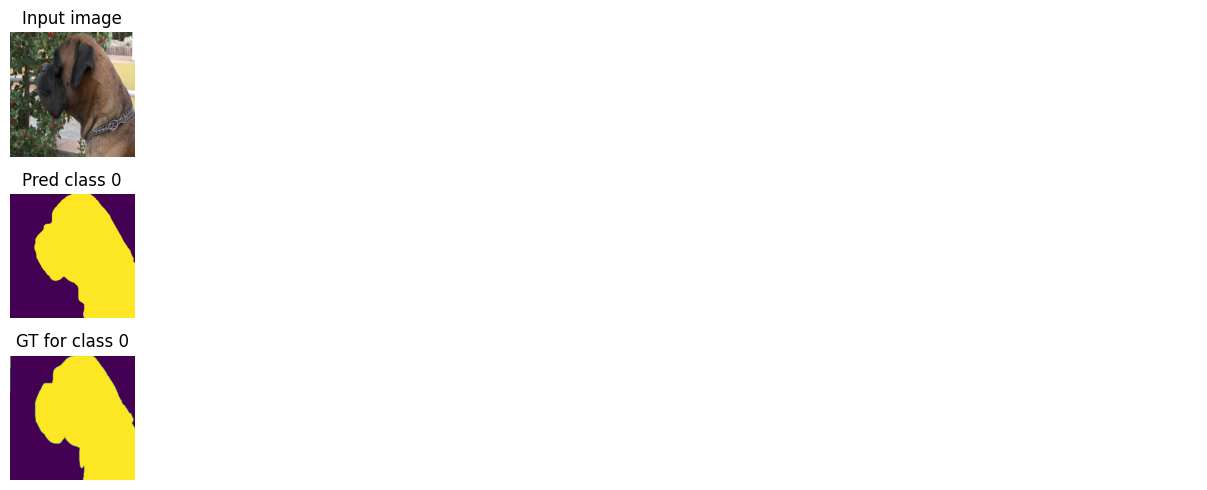

Train loss: 0.07451 | Time: 19m 30s | Val loss: 0.09170
Train_DICE_avg: 0.96134 | Train_Jaccard_avg: 0.92853 | Train_Sensitivity_avg: 0.95846 | Train_Specificity_avg: 0.97282 
Class 0 - Train_DICE: 0.96134 | Train_Jaccard: 0.92853 | Train_Sensitivity: 0.95846 | Train_Specificity: 0.97282 
Val_DICE_avg: 0.94318 | Val_Jaccard_avg: 0.89916 | Val_Sensitivity_avg: 0.94221 | Val_Specificity_avg: 0.96433 
Class 0 - Val_DICE: 0.94318 | Val_Jaccard: 0.89916 | Val_Sensitivity: 0.94221 | Val_Specificity: 0.96433 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07437 | Time: 19m 53s | Val loss: 0.09086
Train_DICE_avg: 0.96083 | Train_Jaccard_avg: 0.92758 | Train_Sensitivity_avg: 0.95772 | Train_Specificity_avg: 0.97233 
Class 0 - Train_DICE: 0.96083 | Train_Jaccard: 0.92758 | Train_Sensitivity: 0.95772 | Train_Specificity: 0.97233 
Val_DICE_avg: 0.94299 | Val_Jaccard_avg: 0.89885 | Val_Sensitivity_avg: 0.94351 | Val_Specificity_avg: 0.96330 
Class 0 - Val_DICE: 0.94299 | Val_Jaccard: 0.89885 | Val_Sensitivity: 0.94351 | Val_Specificity: 0.96330 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07283 | Time: 20m 16s | Val loss: 0.09113
Train_DICE_avg: 0.96205 | Train_Jaccard_avg: 0.92978 | Train_Sensitivity_avg: 0.95953 | Train_Specificity_avg: 0.97357 
Class 0 - Train_DICE: 0.96205 | Train_Jaccard: 0.92978 | Train_Sensitivity: 0.95953 | Train_Specificity: 0.97357 
Val_DICE_avg: 0.94269 | Val_Jaccard_avg: 0.89840 | Val_Sensitivity_avg: 0.93988 | Val_Specificity_avg: 0.96579 
Class 0 - Val_DICE: 0.94269 | Val_Jaccard: 0.89840 | Val_Sensitivity: 0.93988 | Val_Specificity: 0.96579 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07262 | Time: 20m 39s | Val loss: 0.09103
Train_DICE_avg: 0.96178 | Train_Jaccard_avg: 0.92938 | Train_Sensitivity_avg: 0.95936 | Train_Specificity_avg: 0.97291 
Class 0 - Train_DICE: 0.96178 | Train_Jaccard: 0.92938 | Train_Sensitivity: 0.95936 | Train_Specificity: 0.97291 
Val_DICE_avg: 0.94212 | Val_Jaccard_avg: 0.89752 | Val_Sensitivity_avg: 0.94055 | Val_Specificity_avg: 0.96430 
Class 0 - Val_DICE: 0.94212 | Val_Jaccard: 0.89752 | Val_Sensitivity: 0.94055 | Val_Specificity: 0.96430 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07248 | Time: 21m 2s | Val loss: 0.09067
Train_DICE_avg: 0.96140 | Train_Jaccard_avg: 0.92868 | Train_Sensitivity_avg: 0.95852 | Train_Specificity_avg: 0.97205 
Class 0 - Train_DICE: 0.96140 | Train_Jaccard: 0.92868 | Train_Sensitivity: 0.95852 | Train_Specificity: 0.97205 
Val_DICE_avg: 0.94220 | Val_Jaccard_avg: 0.89749 | Val_Sensitivity_avg: 0.94315 | Val_Specificity_avg: 0.96297 
Class 0 - Val_DICE: 0.94220 | Val_Jaccard: 0.89749 | Val_Sensitivity: 0.94315 | Val_Specificity: 0.96297 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

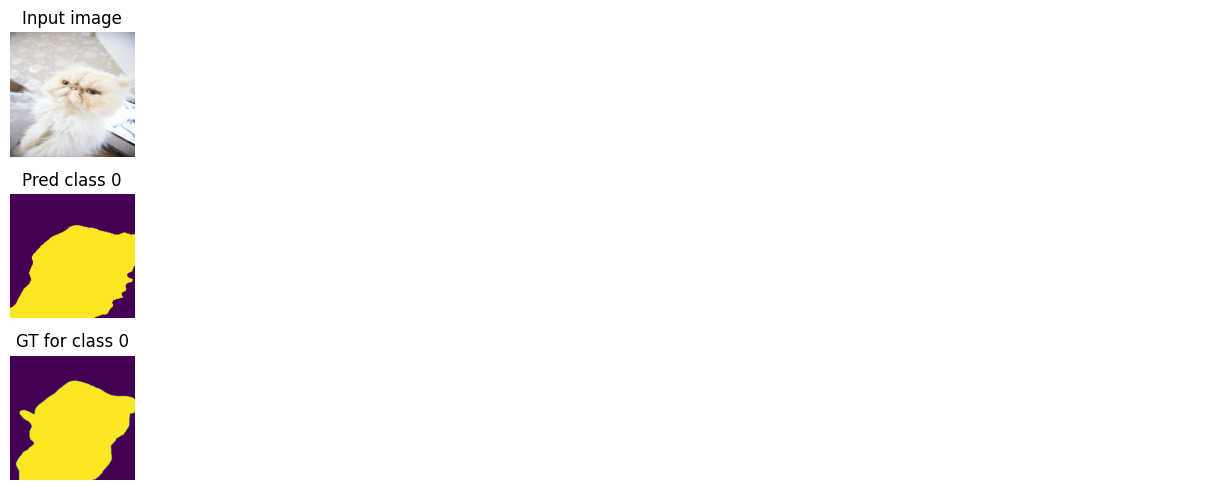

Train loss: 0.07152 | Time: 21m 25s | Val loss: 0.08933
Train_DICE_avg: 0.96206 | Train_Jaccard_avg: 0.92992 | Train_Sensitivity_avg: 0.95985 | Train_Specificity_avg: 0.97294 
Class 0 - Train_DICE: 0.96206 | Train_Jaccard: 0.92992 | Train_Sensitivity: 0.95985 | Train_Specificity: 0.97294 
Val_DICE_avg: 0.94251 | Val_Jaccard_avg: 0.89797 | Val_Sensitivity_avg: 0.94538 | Val_Specificity_avg: 0.96283 
Class 0 - Val_DICE: 0.94251 | Val_Jaccard: 0.89797 | Val_Sensitivity: 0.94538 | Val_Specificity: 0.96283 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07111 | Time: 21m 48s | Val loss: 0.08890
Train_DICE_avg: 0.96214 | Train_Jaccard_avg: 0.93004 | Train_Sensitivity_avg: 0.95958 | Train_Specificity_avg: 0.97413 
Class 0 - Train_DICE: 0.96214 | Train_Jaccard: 0.93004 | Train_Sensitivity: 0.95958 | Train_Specificity: 0.97413 
Val_DICE_avg: 0.94236 | Val_Jaccard_avg: 0.89782 | Val_Sensitivity_avg: 0.94394 | Val_Specificity_avg: 0.96328 
Class 0 - Val_DICE: 0.94236 | Val_Jaccard: 0.89782 | Val_Sensitivity: 0.94394 | Val_Specificity: 0.96328 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07009 | Time: 22m 11s | Val loss: 0.08984
Train_DICE_avg: 0.96280 | Train_Jaccard_avg: 0.93122 | Train_Sensitivity_avg: 0.96007 | Train_Specificity_avg: 0.97452 
Class 0 - Train_DICE: 0.96280 | Train_Jaccard: 0.93122 | Train_Sensitivity: 0.96007 | Train_Specificity: 0.97452 
Val_DICE_avg: 0.94171 | Val_Jaccard_avg: 0.89678 | Val_Sensitivity_avg: 0.94425 | Val_Specificity_avg: 0.96189 
Class 0 - Val_DICE: 0.94171 | Val_Jaccard: 0.89678 | Val_Sensitivity: 0.94425 | Val_Specificity: 0.96189 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06947 | Time: 22m 34s | Val loss: 0.08993
Train_DICE_avg: 0.96314 | Train_Jaccard_avg: 0.93180 | Train_Sensitivity_avg: 0.96071 | Train_Specificity_avg: 0.97390 
Class 0 - Train_DICE: 0.96314 | Train_Jaccard: 0.93180 | Train_Sensitivity: 0.96071 | Train_Specificity: 0.97390 
Val_DICE_avg: 0.94193 | Val_Jaccard_avg: 0.89702 | Val_Sensitivity_avg: 0.94528 | Val_Specificity_avg: 0.96130 
Class 0 - Val_DICE: 0.94193 | Val_Jaccard: 0.89702 | Val_Sensitivity: 0.94528 | Val_Specificity: 0.96130 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06920 | Time: 22m 57s | Val loss: 0.08819
Train_DICE_avg: 0.96310 | Train_Jaccard_avg: 0.93175 | Train_Sensitivity_avg: 0.96062 | Train_Specificity_avg: 0.97449 
Class 0 - Train_DICE: 0.96310 | Train_Jaccard: 0.93175 | Train_Sensitivity: 0.96062 | Train_Specificity: 0.97449 
Val_DICE_avg: 0.94201 | Val_Jaccard_avg: 0.89735 | Val_Sensitivity_avg: 0.94259 | Val_Specificity_avg: 0.96272 
Class 0 - Val_DICE: 0.94201 | Val_Jaccard: 0.89735 | Val_Sensitivity: 0.94259 | Val_Specificity: 0.96272 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

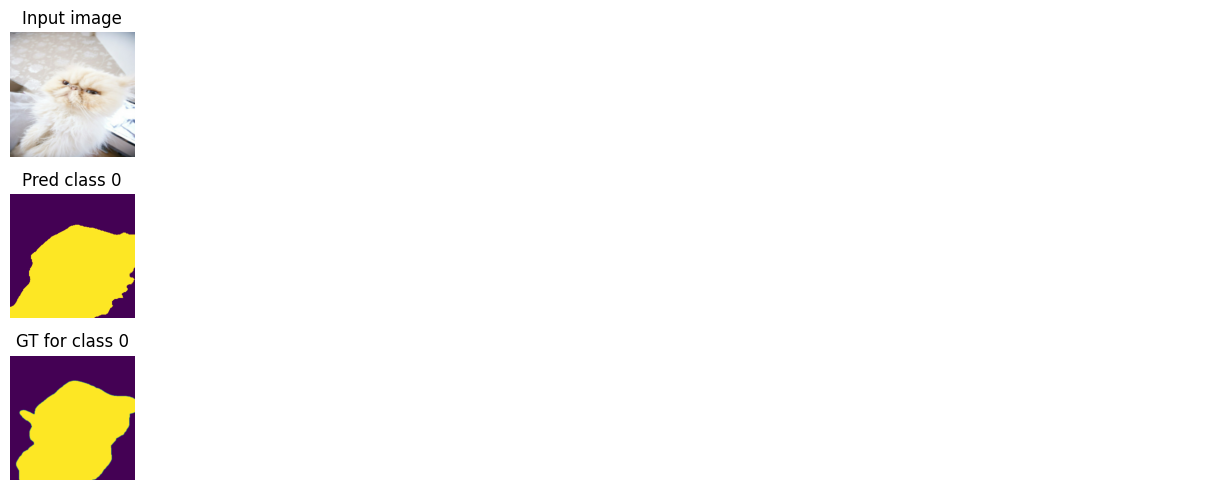

Train loss: 0.06877 | Time: 23m 21s | Val loss: 0.08832
Train_DICE_avg: 0.96319 | Train_Jaccard_avg: 0.93193 | Train_Sensitivity_avg: 0.96045 | Train_Specificity_avg: 0.97447 
Class 0 - Train_DICE: 0.96319 | Train_Jaccard: 0.93193 | Train_Sensitivity: 0.96045 | Train_Specificity: 0.97447 
Val_DICE_avg: 0.94222 | Val_Jaccard_avg: 0.89766 | Val_Sensitivity_avg: 0.94451 | Val_Specificity_avg: 0.96310 
Class 0 - Val_DICE: 0.94222 | Val_Jaccard: 0.89766 | Val_Sensitivity: 0.94451 | Val_Specificity: 0.96310 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]



Global Performance Metrics:
Loss mean: 0.08881, std: 0.00858
Dice Coefficient mean: 0.94644, std: 0.04213
Jaccard Index mean: 0.90107, std: 0.06873
Sensitivity mean: 0.95834, std: 0.04276
Specificity mean: 0.95703, std: 0.05596

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94644, std: 0.04213
Jaccard mean: 0.90107, std: 0.06873
Sensitivity mean: 0.95834, std: 0.04276
Specificity mean: 0.95703, std: 0.05596


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-ResUNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 0.81 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

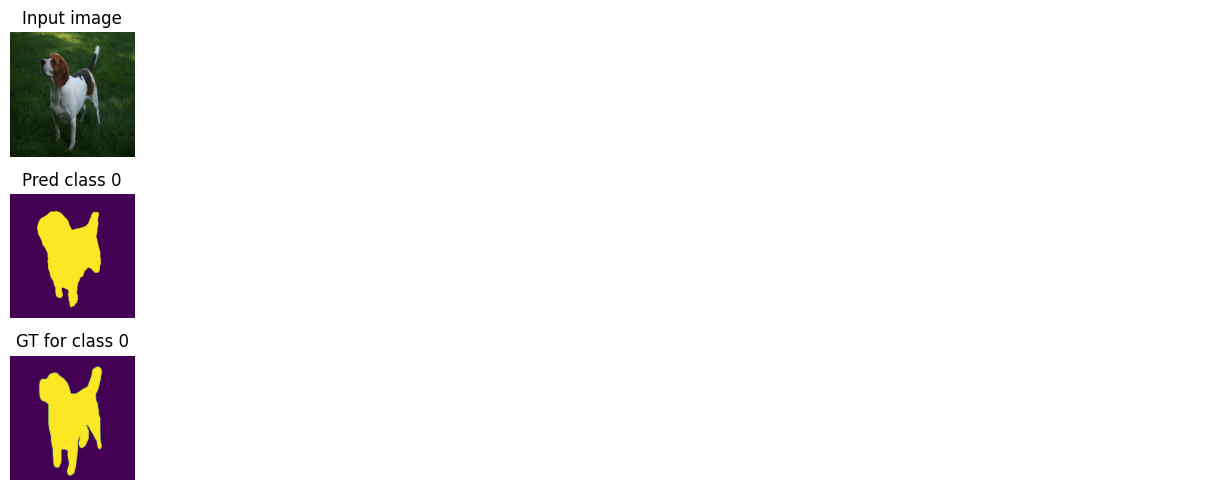

Train loss: 0.45636 | Time: 0m 22s | Val loss: 0.34954
Train_DICE_avg: 0.72889 | Train_Jaccard_avg: 0.61699 | Train_Sensitivity_avg: 0.88341 | Train_Specificity_avg: 0.80089 
Class 0 - Train_DICE: 0.72889 | Train_Jaccard: 0.61699 | Train_Sensitivity: 0.88341 | Train_Specificity: 0.80089 
Val_DICE_avg: 0.85191 | Val_Jaccard_avg: 0.75041 | Val_Sensitivity_avg: 0.96202 | Val_Specificity_avg: 0.84559 
Class 0 - Val_DICE: 0.85191 | Val_Jaccard: 0.75041 | Val_Sensitivity: 0.96202 | Val_Specificity: 0.84559 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.30996 | Time: 0m 45s | Val loss: 0.26635
Train_DICE_avg: 0.88947 | Train_Jaccard_avg: 0.80869 | Train_Sensitivity_avg: 0.93054 | Train_Specificity_avg: 0.89769 
Class 0 - Train_DICE: 0.88947 | Train_Jaccard: 0.80869 | Train_Sensitivity: 0.93054 | Train_Specificity: 0.89769 
Val_DICE_avg: 0.90643 | Val_Jaccard_avg: 0.83639 | Val_Sensitivity_avg: 0.95667 | Val_Specificity_avg: 0.90728 
Class 0 - Val_DICE: 0.90643 | Val_Jaccard: 0.83639 | Val_Sensitivity: 0.95667 | Val_Specificity: 0.90728 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.28212 | Time: 1m 7s | Val loss: 0.26106
Train_DICE_avg: 0.90081 | Train_Jaccard_avg: 0.82701 | Train_Sensitivity_avg: 0.94361 | Train_Specificity_avg: 0.90393 
Class 0 - Train_DICE: 0.90081 | Train_Jaccard: 0.82701 | Train_Sensitivity: 0.94361 | Train_Specificity: 0.90393 
Val_DICE_avg: 0.90169 | Val_Jaccard_avg: 0.82947 | Val_Sensitivity_avg: 0.97102 | Val_Specificity_avg: 0.89916 
Class 0 - Val_DICE: 0.90169 | Val_Jaccard: 0.82947 | Val_Sensitivity: 0.97102 | Val_Specificity: 0.89916 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.26728 | Time: 1m 30s | Val loss: 0.25305
Train_DICE_avg: 0.90751 | Train_Jaccard_avg: 0.83692 | Train_Sensitivity_avg: 0.94954 | Train_Specificity_avg: 0.90743 
Class 0 - Train_DICE: 0.90751 | Train_Jaccard: 0.83692 | Train_Sensitivity: 0.94954 | Train_Specificity: 0.90743 
Val_DICE_avg: 0.90744 | Val_Jaccard_avg: 0.83842 | Val_Sensitivity_avg: 0.96991 | Val_Specificity_avg: 0.90672 
Class 0 - Val_DICE: 0.90744 | Val_Jaccard: 0.83842 | Val_Sensitivity: 0.96991 | Val_Specificity: 0.90672 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.25379 | Time: 1m 52s | Val loss: 0.24461
Train_DICE_avg: 0.91413 | Train_Jaccard_avg: 0.84756 | Train_Sensitivity_avg: 0.95493 | Train_Specificity_avg: 0.91194 
Class 0 - Train_DICE: 0.91413 | Train_Jaccard: 0.84756 | Train_Sensitivity: 0.95493 | Train_Specificity: 0.91194 
Val_DICE_avg: 0.91371 | Val_Jaccard_avg: 0.84869 | Val_Sensitivity_avg: 0.96840 | Val_Specificity_avg: 0.91748 
Class 0 - Val_DICE: 0.91371 | Val_Jaccard: 0.84869 | Val_Sensitivity: 0.96840 | Val_Specificity: 0.91748 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

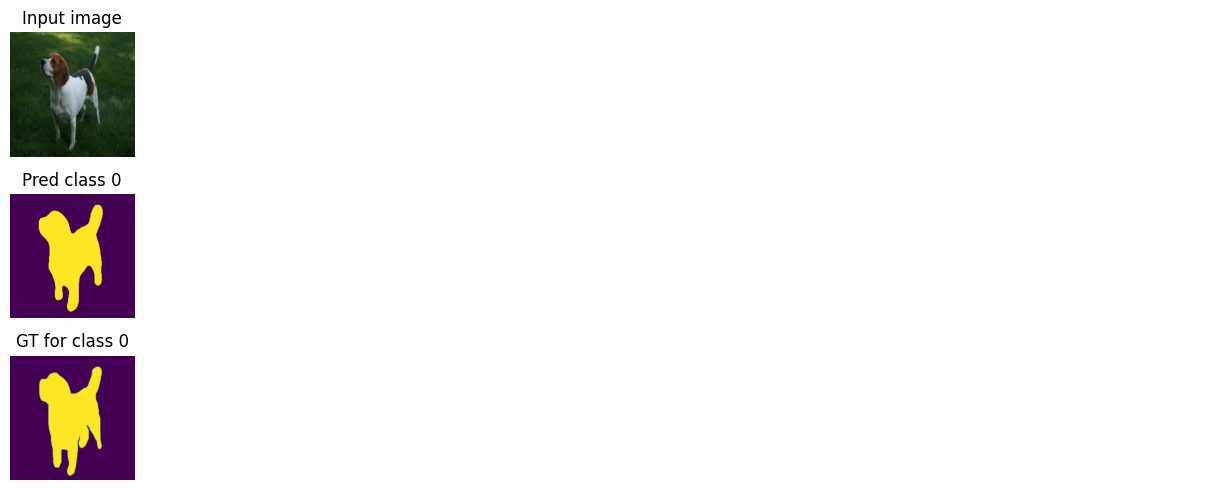

Train loss: 0.24322 | Time: 2m 15s | Val loss: 0.23122
Train_DICE_avg: 0.91730 | Train_Jaccard_avg: 0.85296 | Train_Sensitivity_avg: 0.95901 | Train_Specificity_avg: 0.91343 
Class 0 - Train_DICE: 0.91730 | Train_Jaccard: 0.85296 | Train_Sensitivity: 0.95901 | Train_Specificity: 0.91343 
Val_DICE_avg: 0.91432 | Val_Jaccard_avg: 0.85027 | Val_Sensitivity_avg: 0.97201 | Val_Specificity_avg: 0.91615 
Class 0 - Val_DICE: 0.91432 | Val_Jaccard: 0.85027 | Val_Sensitivity: 0.97201 | Val_Specificity: 0.91615 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23302 | Time: 2m 38s | Val loss: 0.23236
Train_DICE_avg: 0.92059 | Train_Jaccard_avg: 0.85817 | Train_Sensitivity_avg: 0.96122 | Train_Specificity_avg: 0.91572 
Class 0 - Train_DICE: 0.92059 | Train_Jaccard: 0.85817 | Train_Sensitivity: 0.96122 | Train_Specificity: 0.91572 
Val_DICE_avg: 0.89610 | Val_Jaccard_avg: 0.82186 | Val_Sensitivity_avg: 0.97883 | Val_Specificity_avg: 0.89589 
Class 0 - Val_DICE: 0.89610 | Val_Jaccard: 0.82186 | Val_Sensitivity: 0.97883 | Val_Specificity: 0.89589 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22577 | Time: 3m 0s | Val loss: 0.22043
Train_DICE_avg: 0.92233 | Train_Jaccard_avg: 0.86116 | Train_Sensitivity_avg: 0.96200 | Train_Specificity_avg: 0.91762 
Class 0 - Train_DICE: 0.92233 | Train_Jaccard: 0.86116 | Train_Sensitivity: 0.96200 | Train_Specificity: 0.91762 
Val_DICE_avg: 0.91472 | Val_Jaccard_avg: 0.85189 | Val_Sensitivity_avg: 0.97387 | Val_Specificity_avg: 0.91520 
Class 0 - Val_DICE: 0.91472 | Val_Jaccard: 0.85189 | Val_Sensitivity: 0.97387 | Val_Specificity: 0.91520 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21830 | Time: 3m 23s | Val loss: 0.21024
Train_DICE_avg: 0.92171 | Train_Jaccard_avg: 0.86054 | Train_Sensitivity_avg: 0.96215 | Train_Specificity_avg: 0.91889 
Class 0 - Train_DICE: 0.92171 | Train_Jaccard: 0.86054 | Train_Sensitivity: 0.96215 | Train_Specificity: 0.91889 
Val_DICE_avg: 0.92132 | Val_Jaccard_avg: 0.86090 | Val_Sensitivity_avg: 0.97351 | Val_Specificity_avg: 0.91953 
Class 0 - Val_DICE: 0.92132 | Val_Jaccard: 0.86090 | Val_Sensitivity: 0.97351 | Val_Specificity: 0.91953 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20742 | Time: 3m 45s | Val loss: 0.20448
Train_DICE_avg: 0.92692 | Train_Jaccard_avg: 0.86891 | Train_Sensitivity_avg: 0.96611 | Train_Specificity_avg: 0.92202 
Class 0 - Train_DICE: 0.92692 | Train_Jaccard: 0.86891 | Train_Sensitivity: 0.96611 | Train_Specificity: 0.92202 
Val_DICE_avg: 0.92875 | Val_Jaccard_avg: 0.87381 | Val_Sensitivity_avg: 0.96432 | Val_Specificity_avg: 0.93270 
Class 0 - Val_DICE: 0.92875 | Val_Jaccard: 0.87381 | Val_Sensitivity: 0.96432 | Val_Specificity: 0.93270 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

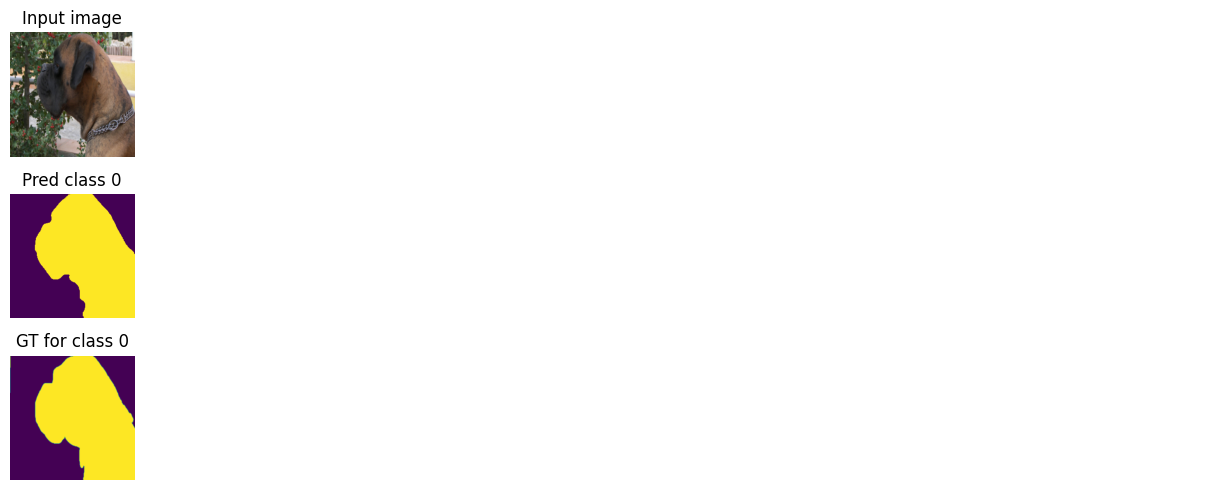

Train loss: 0.20561 | Time: 4m 9s | Val loss: 0.20299
Train_DICE_avg: 0.92341 | Train_Jaccard_avg: 0.86362 | Train_Sensitivity_avg: 0.96444 | Train_Specificity_avg: 0.91786 
Class 0 - Train_DICE: 0.92341 | Train_Jaccard: 0.86362 | Train_Sensitivity: 0.96444 | Train_Specificity: 0.91786 
Val_DICE_avg: 0.91435 | Val_Jaccard_avg: 0.85056 | Val_Sensitivity_avg: 0.97292 | Val_Specificity_avg: 0.91602 
Class 0 - Val_DICE: 0.91435 | Val_Jaccard: 0.85056 | Val_Sensitivity: 0.97292 | Val_Specificity: 0.91602 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19477 | Time: 4m 31s | Val loss: 0.19417
Train_DICE_avg: 0.92840 | Train_Jaccard_avg: 0.87104 | Train_Sensitivity_avg: 0.96662 | Train_Specificity_avg: 0.92337 
Class 0 - Train_DICE: 0.92840 | Train_Jaccard: 0.87104 | Train_Sensitivity: 0.96662 | Train_Specificity: 0.92337 
Val_DICE_avg: 0.92450 | Val_Jaccard_avg: 0.86603 | Val_Sensitivity_avg: 0.97149 | Val_Specificity_avg: 0.92396 
Class 0 - Val_DICE: 0.92450 | Val_Jaccard: 0.86603 | Val_Sensitivity: 0.97149 | Val_Specificity: 0.92396 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18975 | Time: 4m 54s | Val loss: 0.18524
Train_DICE_avg: 0.92898 | Train_Jaccard_avg: 0.87227 | Train_Sensitivity_avg: 0.96638 | Train_Specificity_avg: 0.92295 
Class 0 - Train_DICE: 0.92898 | Train_Jaccard: 0.87227 | Train_Sensitivity: 0.96638 | Train_Specificity: 0.92295 
Val_DICE_avg: 0.92950 | Val_Jaccard_avg: 0.87545 | Val_Sensitivity_avg: 0.96734 | Val_Specificity_avg: 0.93132 
Class 0 - Val_DICE: 0.92950 | Val_Jaccard: 0.87545 | Val_Sensitivity: 0.96734 | Val_Specificity: 0.93132 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18084 | Time: 5m 17s | Val loss: 0.18125
Train_DICE_avg: 0.93088 | Train_Jaccard_avg: 0.87598 | Train_Sensitivity_avg: 0.96825 | Train_Specificity_avg: 0.92724 
Class 0 - Train_DICE: 0.93088 | Train_Jaccard: 0.87598 | Train_Sensitivity: 0.96825 | Train_Specificity: 0.92724 
Val_DICE_avg: 0.92429 | Val_Jaccard_avg: 0.86657 | Val_Sensitivity_avg: 0.97171 | Val_Specificity_avg: 0.92446 
Class 0 - Val_DICE: 0.92429 | Val_Jaccard: 0.86657 | Val_Sensitivity: 0.97171 | Val_Specificity: 0.92446 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17485 | Time: 5m 40s | Val loss: 0.17909
Train_DICE_avg: 0.93319 | Train_Jaccard_avg: 0.87939 | Train_Sensitivity_avg: 0.96884 | Train_Specificity_avg: 0.92801 
Class 0 - Train_DICE: 0.93319 | Train_Jaccard: 0.87939 | Train_Sensitivity: 0.96884 | Train_Specificity: 0.92801 
Val_DICE_avg: 0.91586 | Val_Jaccard_avg: 0.85301 | Val_Sensitivity_avg: 0.97719 | Val_Specificity_avg: 0.91249 
Class 0 - Val_DICE: 0.91586 | Val_Jaccard: 0.85301 | Val_Sensitivity: 0.97719 | Val_Specificity: 0.91249 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

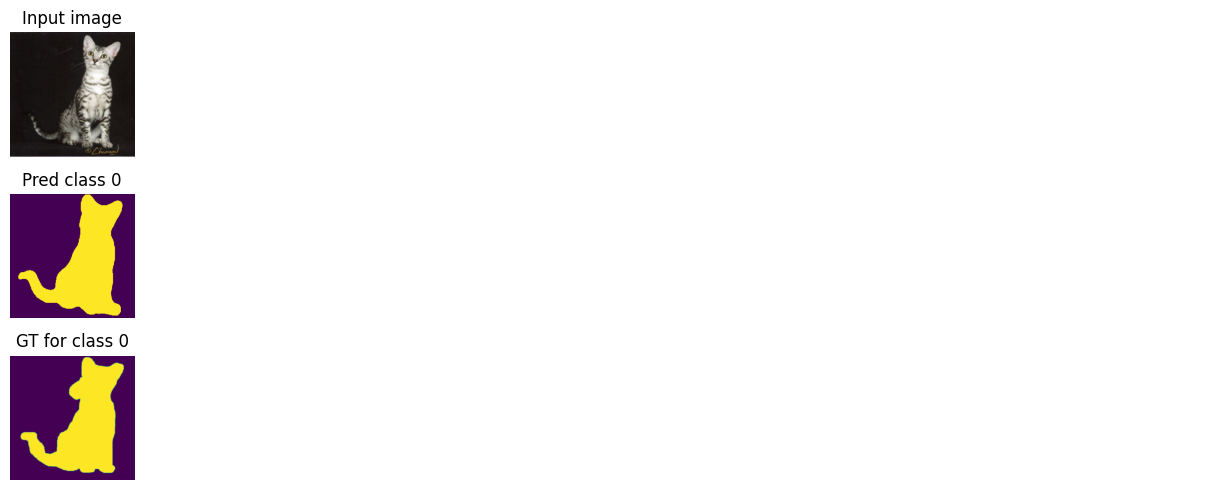

Train loss: 0.17151 | Time: 6m 3s | Val loss: 0.17506
Train_DICE_avg: 0.93213 | Train_Jaccard_avg: 0.87765 | Train_Sensitivity_avg: 0.96909 | Train_Specificity_avg: 0.92711 
Class 0 - Train_DICE: 0.93213 | Train_Jaccard: 0.87765 | Train_Sensitivity: 0.96909 | Train_Specificity: 0.92711 
Val_DICE_avg: 0.91831 | Val_Jaccard_avg: 0.85768 | Val_Sensitivity_avg: 0.97304 | Val_Specificity_avg: 0.91606 
Class 0 - Val_DICE: 0.91831 | Val_Jaccard: 0.85768 | Val_Sensitivity: 0.97304 | Val_Specificity: 0.91606 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16414 | Time: 6m 26s | Val loss: 0.17268
Train_DICE_avg: 0.93336 | Train_Jaccard_avg: 0.88019 | Train_Sensitivity_avg: 0.97008 | Train_Specificity_avg: 0.92805 
Class 0 - Train_DICE: 0.93336 | Train_Jaccard: 0.88019 | Train_Sensitivity: 0.97008 | Train_Specificity: 0.92805 
Val_DICE_avg: 0.91788 | Val_Jaccard_avg: 0.85609 | Val_Sensitivity_avg: 0.97490 | Val_Specificity_avg: 0.91725 
Class 0 - Val_DICE: 0.91788 | Val_Jaccard: 0.85609 | Val_Sensitivity: 0.97490 | Val_Specificity: 0.91725 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15862 | Time: 6m 49s | Val loss: 0.16495
Train_DICE_avg: 0.93659 | Train_Jaccard_avg: 0.88495 | Train_Sensitivity_avg: 0.97034 | Train_Specificity_avg: 0.93084 
Class 0 - Train_DICE: 0.93659 | Train_Jaccard: 0.88495 | Train_Sensitivity: 0.97034 | Train_Specificity: 0.93084 
Val_DICE_avg: 0.92770 | Val_Jaccard_avg: 0.87207 | Val_Sensitivity_avg: 0.96949 | Val_Specificity_avg: 0.92573 
Class 0 - Val_DICE: 0.92770 | Val_Jaccard: 0.87207 | Val_Sensitivity: 0.96949 | Val_Specificity: 0.92573 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15433 | Time: 7m 12s | Val loss: 0.16330
Train_DICE_avg: 0.93661 | Train_Jaccard_avg: 0.88488 | Train_Sensitivity_avg: 0.97057 | Train_Specificity_avg: 0.93068 
Class 0 - Train_DICE: 0.93661 | Train_Jaccard: 0.88488 | Train_Sensitivity: 0.97057 | Train_Specificity: 0.93068 
Val_DICE_avg: 0.92068 | Val_Jaccard_avg: 0.86259 | Val_Sensitivity_avg: 0.97128 | Val_Specificity_avg: 0.91841 
Class 0 - Val_DICE: 0.92068 | Val_Jaccard: 0.86259 | Val_Sensitivity: 0.97128 | Val_Specificity: 0.91841 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14935 | Time: 7m 35s | Val loss: 0.16129
Train_DICE_avg: 0.93779 | Train_Jaccard_avg: 0.88727 | Train_Sensitivity_avg: 0.97072 | Train_Specificity_avg: 0.93202 
Class 0 - Train_DICE: 0.93779 | Train_Jaccard: 0.88727 | Train_Sensitivity: 0.97072 | Train_Specificity: 0.93202 
Val_DICE_avg: 0.91967 | Val_Jaccard_avg: 0.85859 | Val_Sensitivity_avg: 0.97163 | Val_Specificity_avg: 0.91963 
Class 0 - Val_DICE: 0.91967 | Val_Jaccard: 0.85859 | Val_Sensitivity: 0.97163 | Val_Specificity: 0.91963 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

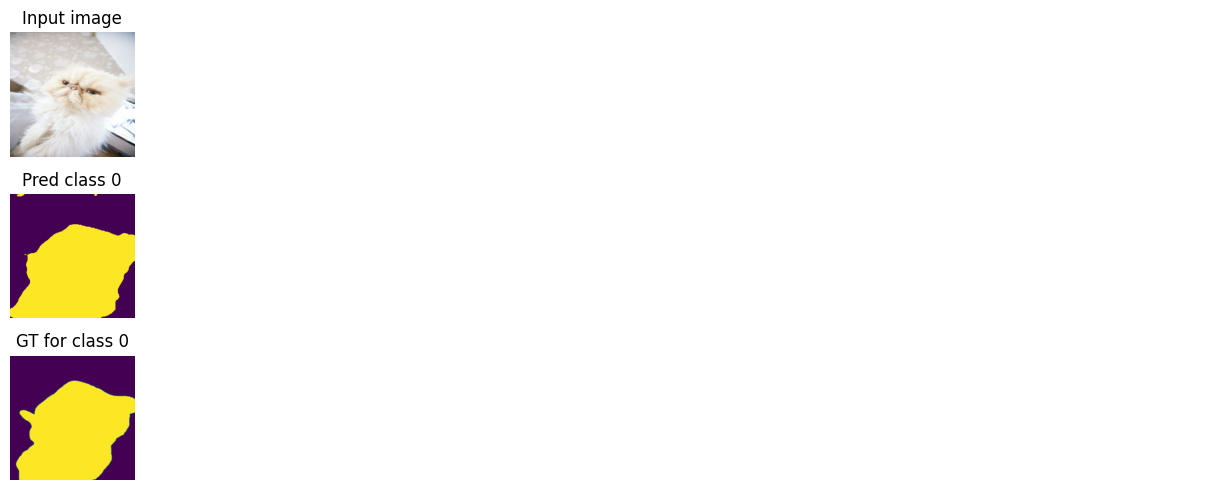

Train loss: 0.14845 | Time: 7m 58s | Val loss: 0.15268
Train_DICE_avg: 0.93528 | Train_Jaccard_avg: 0.88318 | Train_Sensitivity_avg: 0.97151 | Train_Specificity_avg: 0.92980 
Class 0 - Train_DICE: 0.93528 | Train_Jaccard: 0.88318 | Train_Sensitivity: 0.97151 | Train_Specificity: 0.92980 
Val_DICE_avg: 0.92277 | Val_Jaccard_avg: 0.86394 | Val_Sensitivity_avg: 0.97609 | Val_Specificity_avg: 0.92090 
Class 0 - Val_DICE: 0.92277 | Val_Jaccard: 0.86394 | Val_Sensitivity: 0.97609 | Val_Specificity: 0.92090 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14168 | Time: 8m 21s | Val loss: 0.15341
Train_DICE_avg: 0.93862 | Train_Jaccard_avg: 0.88865 | Train_Sensitivity_avg: 0.97141 | Train_Specificity_avg: 0.93329 
Class 0 - Train_DICE: 0.93862 | Train_Jaccard: 0.88865 | Train_Sensitivity: 0.97141 | Train_Specificity: 0.93329 
Val_DICE_avg: 0.91945 | Val_Jaccard_avg: 0.85839 | Val_Sensitivity_avg: 0.97512 | Val_Specificity_avg: 0.91644 
Class 0 - Val_DICE: 0.91945 | Val_Jaccard: 0.85839 | Val_Sensitivity: 0.97512 | Val_Specificity: 0.91644 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13722 | Time: 8m 43s | Val loss: 0.15538
Train_DICE_avg: 0.94116 | Train_Jaccard_avg: 0.89148 | Train_Sensitivity_avg: 0.97355 | Train_Specificity_avg: 0.93467 
Class 0 - Train_DICE: 0.94116 | Train_Jaccard: 0.89148 | Train_Sensitivity: 0.97355 | Train_Specificity: 0.93467 
Val_DICE_avg: 0.92312 | Val_Jaccard_avg: 0.86533 | Val_Sensitivity_avg: 0.97178 | Val_Specificity_avg: 0.92340 
Class 0 - Val_DICE: 0.92312 | Val_Jaccard: 0.86533 | Val_Sensitivity: 0.97178 | Val_Specificity: 0.92340 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13478 | Time: 9m 6s | Val loss: 0.14693
Train_DICE_avg: 0.93939 | Train_Jaccard_avg: 0.88985 | Train_Sensitivity_avg: 0.97114 | Train_Specificity_avg: 0.93315 
Class 0 - Train_DICE: 0.93939 | Train_Jaccard: 0.88985 | Train_Sensitivity: 0.97114 | Train_Specificity: 0.93315 
Val_DICE_avg: 0.92770 | Val_Jaccard_avg: 0.87244 | Val_Sensitivity_avg: 0.97169 | Val_Specificity_avg: 0.92759 
Class 0 - Val_DICE: 0.92770 | Val_Jaccard: 0.87244 | Val_Sensitivity: 0.97169 | Val_Specificity: 0.92759 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12862 | Time: 9m 29s | Val loss: 0.14473
Train_DICE_avg: 0.94167 | Train_Jaccard_avg: 0.89383 | Train_Sensitivity_avg: 0.97199 | Train_Specificity_avg: 0.93818 
Class 0 - Train_DICE: 0.94167 | Train_Jaccard: 0.89383 | Train_Sensitivity: 0.97199 | Train_Specificity: 0.93818 
Val_DICE_avg: 0.92490 | Val_Jaccard_avg: 0.86840 | Val_Sensitivity_avg: 0.97315 | Val_Specificity_avg: 0.92569 
Class 0 - Val_DICE: 0.92490 | Val_Jaccard: 0.86840 | Val_Sensitivity: 0.97315 | Val_Specificity: 0.92569 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

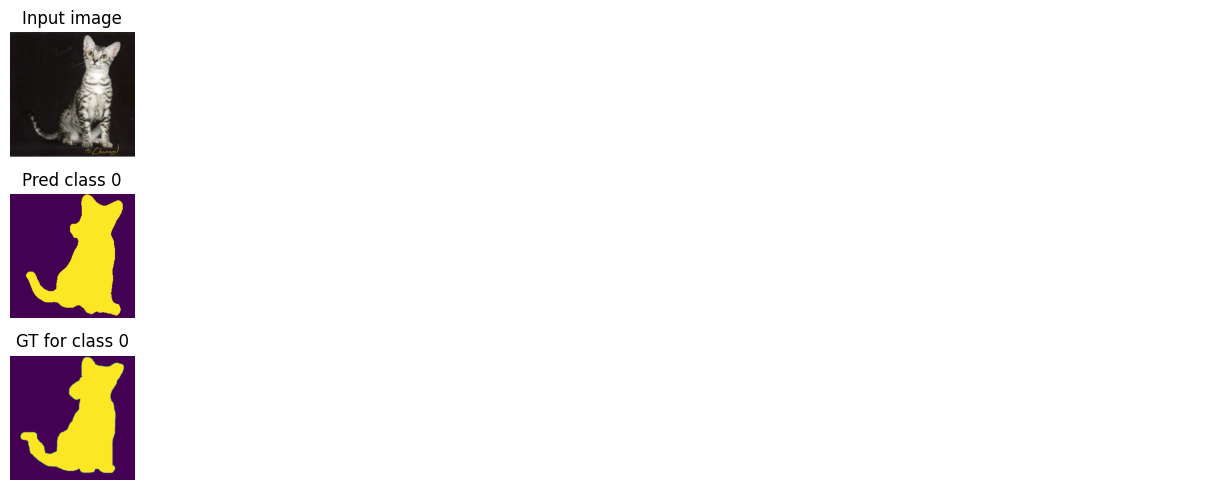

Train loss: 0.12406 | Time: 9m 52s | Val loss: 0.14212
Train_DICE_avg: 0.94378 | Train_Jaccard_avg: 0.89678 | Train_Sensitivity_avg: 0.97387 | Train_Specificity_avg: 0.93878 
Class 0 - Train_DICE: 0.94378 | Train_Jaccard: 0.89678 | Train_Sensitivity: 0.97387 | Train_Specificity: 0.93878 
Val_DICE_avg: 0.93136 | Val_Jaccard_avg: 0.87797 | Val_Sensitivity_avg: 0.96544 | Val_Specificity_avg: 0.93612 
Class 0 - Val_DICE: 0.93136 | Val_Jaccard: 0.87797 | Val_Sensitivity: 0.96544 | Val_Specificity: 0.93612 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12299 | Time: 10m 15s | Val loss: 0.14384
Train_DICE_avg: 0.94353 | Train_Jaccard_avg: 0.89695 | Train_Sensitivity_avg: 0.97294 | Train_Specificity_avg: 0.93856 
Class 0 - Train_DICE: 0.94353 | Train_Jaccard: 0.89695 | Train_Sensitivity: 0.97294 | Train_Specificity: 0.93856 
Val_DICE_avg: 0.92246 | Val_Jaccard_avg: 0.86379 | Val_Sensitivity_avg: 0.97423 | Val_Specificity_avg: 0.91944 
Class 0 - Val_DICE: 0.92246 | Val_Jaccard: 0.86379 | Val_Sensitivity: 0.97423 | Val_Specificity: 0.91944 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11803 | Time: 10m 38s | Val loss: 0.13554
Train_DICE_avg: 0.94426 | Train_Jaccard_avg: 0.89770 | Train_Sensitivity_avg: 0.97455 | Train_Specificity_avg: 0.93850 
Class 0 - Train_DICE: 0.94426 | Train_Jaccard: 0.89770 | Train_Sensitivity: 0.97455 | Train_Specificity: 0.93850 
Val_DICE_avg: 0.93003 | Val_Jaccard_avg: 0.87639 | Val_Sensitivity_avg: 0.96890 | Val_Specificity_avg: 0.93413 
Class 0 - Val_DICE: 0.93003 | Val_Jaccard: 0.87639 | Val_Sensitivity: 0.96890 | Val_Specificity: 0.93413 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11485 | Time: 11m 1s | Val loss: 0.13882
Train_DICE_avg: 0.94579 | Train_Jaccard_avg: 0.90046 | Train_Sensitivity_avg: 0.97519 | Train_Specificity_avg: 0.94176 
Class 0 - Train_DICE: 0.94579 | Train_Jaccard: 0.90046 | Train_Sensitivity: 0.97519 | Train_Specificity: 0.94176 
Val_DICE_avg: 0.92611 | Val_Jaccard_avg: 0.86879 | Val_Sensitivity_avg: 0.96913 | Val_Specificity_avg: 0.92868 
Class 0 - Val_DICE: 0.92611 | Val_Jaccard: 0.86879 | Val_Sensitivity: 0.96913 | Val_Specificity: 0.92868 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11184 | Time: 11m 23s | Val loss: 0.13519
Train_DICE_avg: 0.94704 | Train_Jaccard_avg: 0.90216 | Train_Sensitivity_avg: 0.97523 | Train_Specificity_avg: 0.94164 
Class 0 - Train_DICE: 0.94704 | Train_Jaccard: 0.90216 | Train_Sensitivity: 0.97523 | Train_Specificity: 0.94164 
Val_DICE_avg: 0.92621 | Val_Jaccard_avg: 0.86995 | Val_Sensitivity_avg: 0.96825 | Val_Specificity_avg: 0.92962 
Class 0 - Val_DICE: 0.92621 | Val_Jaccard: 0.86995 | Val_Sensitivity: 0.96825 | Val_Specificity: 0.92962 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

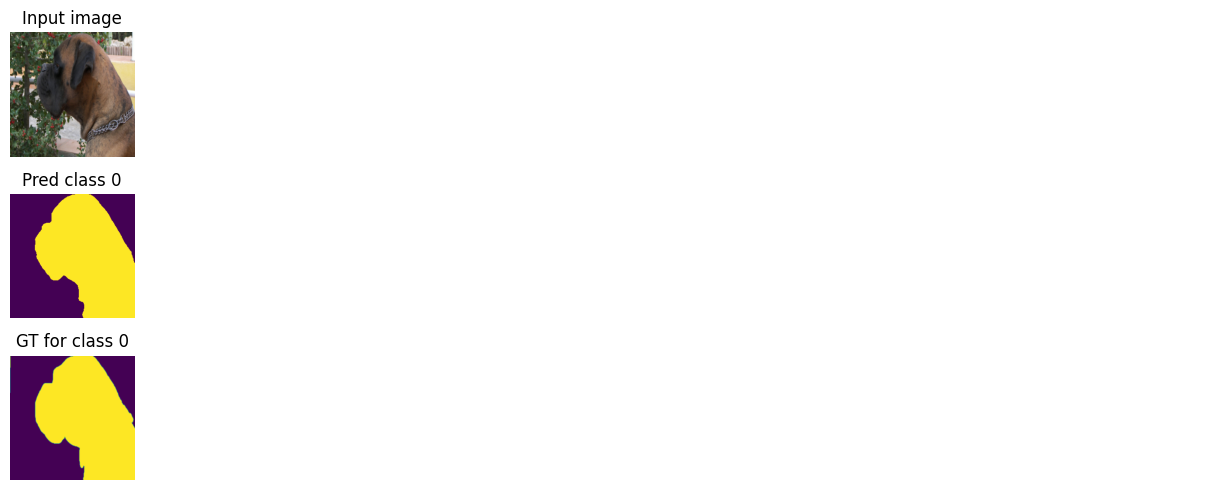

Train loss: 0.10970 | Time: 11m 47s | Val loss: 0.13155
Train_DICE_avg: 0.94636 | Train_Jaccard_avg: 0.90121 | Train_Sensitivity_avg: 0.97522 | Train_Specificity_avg: 0.94178 
Class 0 - Train_DICE: 0.94636 | Train_Jaccard: 0.90121 | Train_Sensitivity: 0.97522 | Train_Specificity: 0.94178 
Val_DICE_avg: 0.92692 | Val_Jaccard_avg: 0.87082 | Val_Sensitivity_avg: 0.97005 | Val_Specificity_avg: 0.92969 
Class 0 - Val_DICE: 0.92692 | Val_Jaccard: 0.87082 | Val_Sensitivity: 0.97005 | Val_Specificity: 0.92969 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10897 | Time: 12m 9s | Val loss: 0.13018
Train_DICE_avg: 0.94488 | Train_Jaccard_avg: 0.89944 | Train_Sensitivity_avg: 0.97300 | Train_Specificity_avg: 0.94098 
Class 0 - Train_DICE: 0.94488 | Train_Jaccard: 0.89944 | Train_Sensitivity: 0.97300 | Train_Specificity: 0.94098 
Val_DICE_avg: 0.92271 | Val_Jaccard_avg: 0.86368 | Val_Sensitivity_avg: 0.97391 | Val_Specificity_avg: 0.92054 
Class 0 - Val_DICE: 0.92271 | Val_Jaccard: 0.86368 | Val_Sensitivity: 0.97391 | Val_Specificity: 0.92054 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10289 | Time: 12m 32s | Val loss: 0.12928
Train_DICE_avg: 0.94766 | Train_Jaccard_avg: 0.90396 | Train_Sensitivity_avg: 0.97573 | Train_Specificity_avg: 0.94406 
Class 0 - Train_DICE: 0.94766 | Train_Jaccard: 0.90396 | Train_Sensitivity: 0.97573 | Train_Specificity: 0.94406 
Val_DICE_avg: 0.92670 | Val_Jaccard_avg: 0.87043 | Val_Sensitivity_avg: 0.97060 | Val_Specificity_avg: 0.92798 
Class 0 - Val_DICE: 0.92670 | Val_Jaccard: 0.87043 | Val_Sensitivity: 0.97060 | Val_Specificity: 0.92798 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10086 | Time: 12m 55s | Val loss: 0.13055
Train_DICE_avg: 0.94849 | Train_Jaccard_avg: 0.90501 | Train_Sensitivity_avg: 0.97594 | Train_Specificity_avg: 0.94486 
Class 0 - Train_DICE: 0.94849 | Train_Jaccard: 0.90501 | Train_Sensitivity: 0.97594 | Train_Specificity: 0.94486 
Val_DICE_avg: 0.92733 | Val_Jaccard_avg: 0.87213 | Val_Sensitivity_avg: 0.96770 | Val_Specificity_avg: 0.93180 
Class 0 - Val_DICE: 0.92733 | Val_Jaccard: 0.87213 | Val_Sensitivity: 0.96770 | Val_Specificity: 0.93180 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09864 | Time: 13m 18s | Val loss: 0.12426
Train_DICE_avg: 0.94859 | Train_Jaccard_avg: 0.90586 | Train_Sensitivity_avg: 0.97616 | Train_Specificity_avg: 0.94492 
Class 0 - Train_DICE: 0.94859 | Train_Jaccard: 0.90586 | Train_Sensitivity: 0.97616 | Train_Specificity: 0.94492 
Val_DICE_avg: 0.93323 | Val_Jaccard_avg: 0.88112 | Val_Sensitivity_avg: 0.96805 | Val_Specificity_avg: 0.93491 
Class 0 - Val_DICE: 0.93323 | Val_Jaccard: 0.88112 | Val_Sensitivity: 0.96805 | Val_Specificity: 0.93491 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

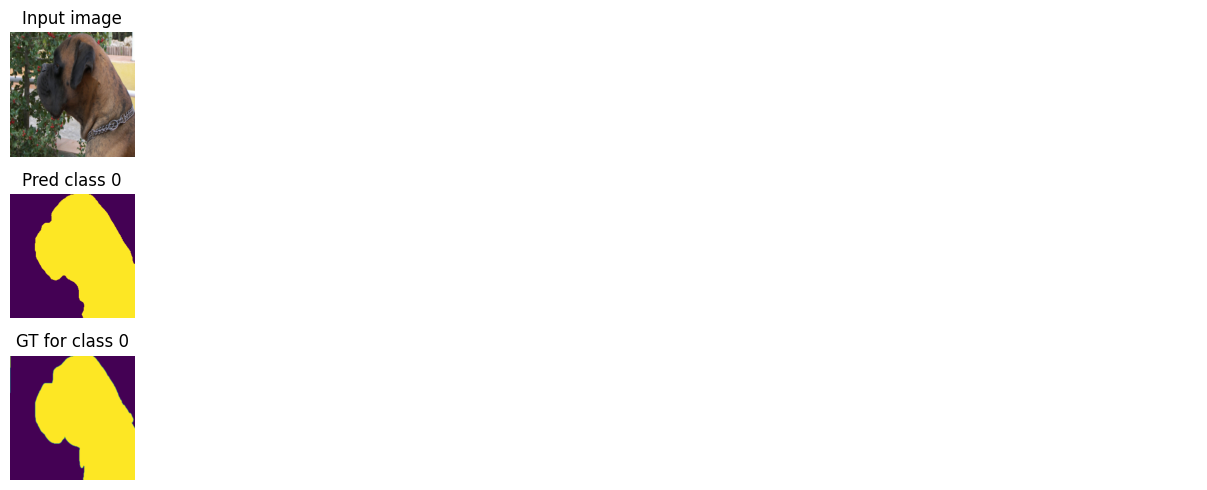

Train loss: 0.09517 | Time: 13m 42s | Val loss: 0.12321
Train_DICE_avg: 0.95251 | Train_Jaccard_avg: 0.91113 | Train_Sensitivity_avg: 0.97785 | Train_Specificity_avg: 0.94846 
Class 0 - Train_DICE: 0.95251 | Train_Jaccard: 0.91113 | Train_Sensitivity: 0.97785 | Train_Specificity: 0.94846 
Val_DICE_avg: 0.93307 | Val_Jaccard_avg: 0.88089 | Val_Sensitivity_avg: 0.96937 | Val_Specificity_avg: 0.93465 
Class 0 - Val_DICE: 0.93307 | Val_Jaccard: 0.88089 | Val_Sensitivity: 0.96937 | Val_Specificity: 0.93465 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09292 | Time: 14m 5s | Val loss: 0.12142
Train_DICE_avg: 0.95239 | Train_Jaccard_avg: 0.91097 | Train_Sensitivity_avg: 0.97821 | Train_Specificity_avg: 0.94894 
Class 0 - Train_DICE: 0.95239 | Train_Jaccard: 0.91097 | Train_Sensitivity: 0.97821 | Train_Specificity: 0.94894 
Val_DICE_avg: 0.93312 | Val_Jaccard_avg: 0.88125 | Val_Sensitivity_avg: 0.96984 | Val_Specificity_avg: 0.93593 
Class 0 - Val_DICE: 0.93312 | Val_Jaccard: 0.88125 | Val_Sensitivity: 0.96984 | Val_Specificity: 0.93593 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09142 | Time: 14m 28s | Val loss: 0.12398
Train_DICE_avg: 0.95136 | Train_Jaccard_avg: 0.91066 | Train_Sensitivity_avg: 0.97663 | Train_Specificity_avg: 0.94819 
Class 0 - Train_DICE: 0.95136 | Train_Jaccard: 0.91066 | Train_Sensitivity: 0.97663 | Train_Specificity: 0.94819 
Val_DICE_avg: 0.93330 | Val_Jaccard_avg: 0.88153 | Val_Sensitivity_avg: 0.96732 | Val_Specificity_avg: 0.93632 
Class 0 - Val_DICE: 0.93330 | Val_Jaccard: 0.88153 | Val_Sensitivity: 0.96732 | Val_Specificity: 0.93632 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08863 | Time: 14m 51s | Val loss: 0.12061
Train_DICE_avg: 0.95344 | Train_Jaccard_avg: 0.91348 | Train_Sensitivity_avg: 0.97762 | Train_Specificity_avg: 0.95021 
Class 0 - Train_DICE: 0.95344 | Train_Jaccard: 0.91348 | Train_Sensitivity: 0.97762 | Train_Specificity: 0.95021 
Val_DICE_avg: 0.93653 | Val_Jaccard_avg: 0.88682 | Val_Sensitivity_avg: 0.96625 | Val_Specificity_avg: 0.93893 
Class 0 - Val_DICE: 0.93653 | Val_Jaccard: 0.88682 | Val_Sensitivity: 0.96625 | Val_Specificity: 0.93893 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08835 | Time: 15m 14s | Val loss: 0.11828
Train_DICE_avg: 0.95372 | Train_Jaccard_avg: 0.91345 | Train_Sensitivity_avg: 0.97804 | Train_Specificity_avg: 0.95073 
Class 0 - Train_DICE: 0.95372 | Train_Jaccard: 0.91345 | Train_Sensitivity: 0.97804 | Train_Specificity: 0.95073 
Val_DICE_avg: 0.93481 | Val_Jaccard_avg: 0.88400 | Val_Sensitivity_avg: 0.96848 | Val_Specificity_avg: 0.93711 
Class 0 - Val_DICE: 0.93481 | Val_Jaccard: 0.88400 | Val_Sensitivity: 0.96848 | Val_Specificity: 0.93711 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

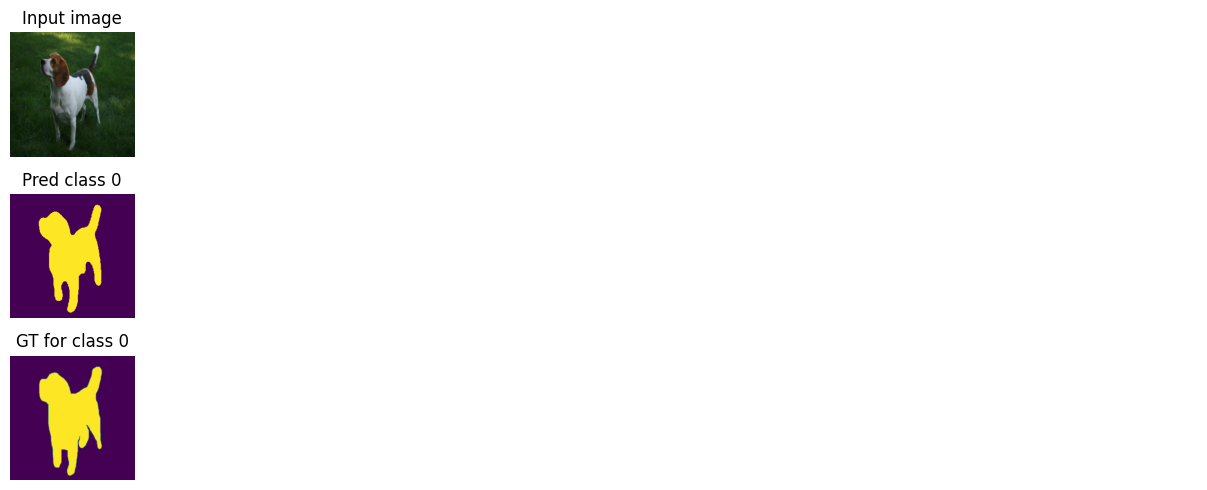

Train loss: 0.08657 | Time: 15m 37s | Val loss: 0.11906
Train_DICE_avg: 0.95434 | Train_Jaccard_avg: 0.91442 | Train_Sensitivity_avg: 0.97998 | Train_Specificity_avg: 0.95016 
Class 0 - Train_DICE: 0.95434 | Train_Jaccard: 0.91442 | Train_Sensitivity: 0.97998 | Train_Specificity: 0.95016 
Val_DICE_avg: 0.93814 | Val_Jaccard_avg: 0.88953 | Val_Sensitivity_avg: 0.96582 | Val_Specificity_avg: 0.94147 
Class 0 - Val_DICE: 0.93814 | Val_Jaccard: 0.88953 | Val_Sensitivity: 0.96582 | Val_Specificity: 0.94147 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08371 | Time: 16m 0s | Val loss: 0.11847
Train_DICE_avg: 0.95647 | Train_Jaccard_avg: 0.91744 | Train_Sensitivity_avg: 0.98149 | Train_Specificity_avg: 0.95059 
Class 0 - Train_DICE: 0.95647 | Train_Jaccard: 0.91744 | Train_Sensitivity: 0.98149 | Train_Specificity: 0.95059 
Val_DICE_avg: 0.93718 | Val_Jaccard_avg: 0.88809 | Val_Sensitivity_avg: 0.96815 | Val_Specificity_avg: 0.93838 
Class 0 - Val_DICE: 0.93718 | Val_Jaccard: 0.88809 | Val_Sensitivity: 0.96815 | Val_Specificity: 0.93838 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08421 | Time: 16m 23s | Val loss: 0.12496
Train_DICE_avg: 0.95642 | Train_Jaccard_avg: 0.91737 | Train_Sensitivity_avg: 0.98055 | Train_Specificity_avg: 0.95152 
Class 0 - Train_DICE: 0.95642 | Train_Jaccard: 0.91737 | Train_Sensitivity: 0.98055 | Train_Specificity: 0.95152 
Val_DICE_avg: 0.93885 | Val_Jaccard_avg: 0.89117 | Val_Sensitivity_avg: 0.95960 | Val_Specificity_avg: 0.94717 
Class 0 - Val_DICE: 0.93885 | Val_Jaccard: 0.89117 | Val_Sensitivity: 0.95960 | Val_Specificity: 0.94717 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08142 | Time: 16m 46s | Val loss: 0.11976
Train_DICE_avg: 0.95742 | Train_Jaccard_avg: 0.91908 | Train_Sensitivity_avg: 0.98161 | Train_Specificity_avg: 0.95215 
Class 0 - Train_DICE: 0.95742 | Train_Jaccard: 0.91908 | Train_Sensitivity: 0.98161 | Train_Specificity: 0.95215 
Val_DICE_avg: 0.93717 | Val_Jaccard_avg: 0.88816 | Val_Sensitivity_avg: 0.96660 | Val_Specificity_avg: 0.94050 
Class 0 - Val_DICE: 0.93717 | Val_Jaccard: 0.88816 | Val_Sensitivity: 0.96660 | Val_Specificity: 0.94050 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08060 | Time: 17m 9s | Val loss: 0.12022
Train_DICE_avg: 0.95741 | Train_Jaccard_avg: 0.91907 | Train_Sensitivity_avg: 0.98173 | Train_Specificity_avg: 0.95244 
Class 0 - Train_DICE: 0.95741 | Train_Jaccard: 0.91907 | Train_Sensitivity: 0.98173 | Train_Specificity: 0.95244 
Val_DICE_avg: 0.93858 | Val_Jaccard_avg: 0.89062 | Val_Sensitivity_avg: 0.96316 | Val_Specificity_avg: 0.94416 
Class 0 - Val_DICE: 0.93858 | Val_Jaccard: 0.89062 | Val_Sensitivity: 0.96316 | Val_Specificity: 0.94416 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

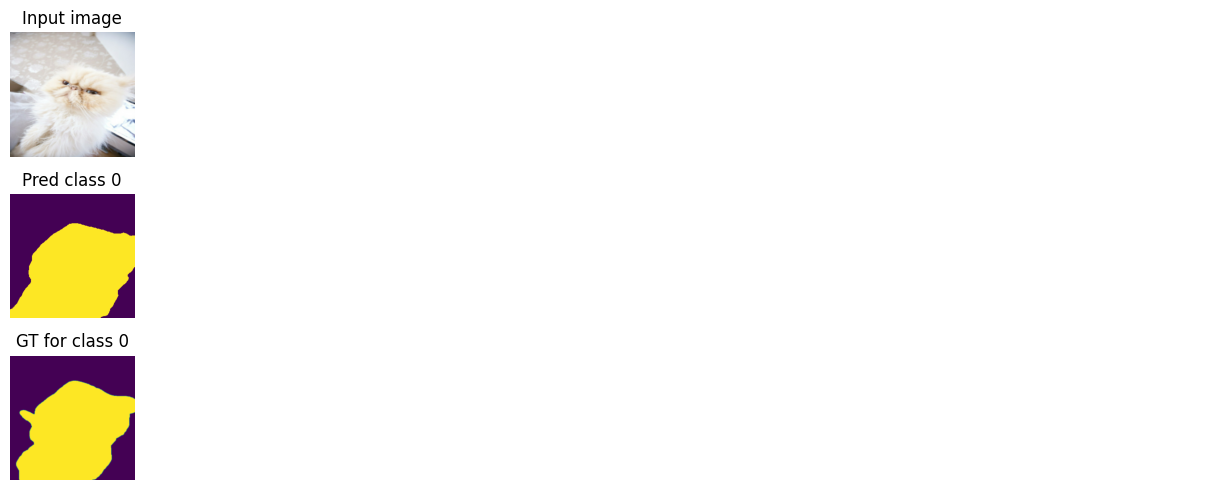

Train loss: 0.07940 | Time: 17m 32s | Val loss: 0.12067
Train_DICE_avg: 0.95745 | Train_Jaccard_avg: 0.91997 | Train_Sensitivity_avg: 0.98031 | Train_Specificity_avg: 0.95462 
Class 0 - Train_DICE: 0.95745 | Train_Jaccard: 0.91997 | Train_Sensitivity: 0.98031 | Train_Specificity: 0.95462 
Val_DICE_avg: 0.93749 | Val_Jaccard_avg: 0.88879 | Val_Sensitivity_avg: 0.96262 | Val_Specificity_avg: 0.94244 
Class 0 - Val_DICE: 0.93749 | Val_Jaccard: 0.88879 | Val_Sensitivity: 0.96262 | Val_Specificity: 0.94244 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07985 | Time: 17m 55s | Val loss: 0.12132
Train_DICE_avg: 0.95827 | Train_Jaccard_avg: 0.92067 | Train_Sensitivity_avg: 0.98137 | Train_Specificity_avg: 0.95420 
Class 0 - Train_DICE: 0.95827 | Train_Jaccard: 0.92067 | Train_Sensitivity: 0.98137 | Train_Specificity: 0.95420 
Val_DICE_avg: 0.93730 | Val_Jaccard_avg: 0.88863 | Val_Sensitivity_avg: 0.96242 | Val_Specificity_avg: 0.94216 
Class 0 - Val_DICE: 0.93730 | Val_Jaccard: 0.88863 | Val_Sensitivity: 0.96242 | Val_Specificity: 0.94216 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07815 | Time: 18m 18s | Val loss: 0.12068
Train_DICE_avg: 0.95651 | Train_Jaccard_avg: 0.91899 | Train_Sensitivity_avg: 0.98044 | Train_Specificity_avg: 0.95465 
Class 0 - Train_DICE: 0.95651 | Train_Jaccard: 0.91899 | Train_Sensitivity: 0.98044 | Train_Specificity: 0.95465 
Val_DICE_avg: 0.93761 | Val_Jaccard_avg: 0.88878 | Val_Sensitivity_avg: 0.96110 | Val_Specificity_avg: 0.94326 
Class 0 - Val_DICE: 0.93761 | Val_Jaccard: 0.88878 | Val_Sensitivity: 0.96110 | Val_Specificity: 0.94326 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07699 | Time: 18m 41s | Val loss: 0.12057
Train_DICE_avg: 0.95838 | Train_Jaccard_avg: 0.92163 | Train_Sensitivity_avg: 0.98055 | Train_Specificity_avg: 0.95594 
Class 0 - Train_DICE: 0.95838 | Train_Jaccard: 0.92163 | Train_Sensitivity: 0.98055 | Train_Specificity: 0.95594 
Val_DICE_avg: 0.93792 | Val_Jaccard_avg: 0.88934 | Val_Sensitivity_avg: 0.96267 | Val_Specificity_avg: 0.94425 
Class 0 - Val_DICE: 0.93792 | Val_Jaccard: 0.88934 | Val_Sensitivity: 0.96267 | Val_Specificity: 0.94425 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07651 | Time: 19m 4s | Val loss: 0.12020
Train_DICE_avg: 0.95924 | Train_Jaccard_avg: 0.92245 | Train_Sensitivity_avg: 0.98237 | Train_Specificity_avg: 0.95534 
Class 0 - Train_DICE: 0.95924 | Train_Jaccard: 0.92245 | Train_Sensitivity: 0.98237 | Train_Specificity: 0.95534 
Val_DICE_avg: 0.93661 | Val_Jaccard_avg: 0.88737 | Val_Sensitivity_avg: 0.96434 | Val_Specificity_avg: 0.94227 
Class 0 - Val_DICE: 0.93661 | Val_Jaccard: 0.88737 | Val_Sensitivity: 0.96434 | Val_Specificity: 0.94227 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

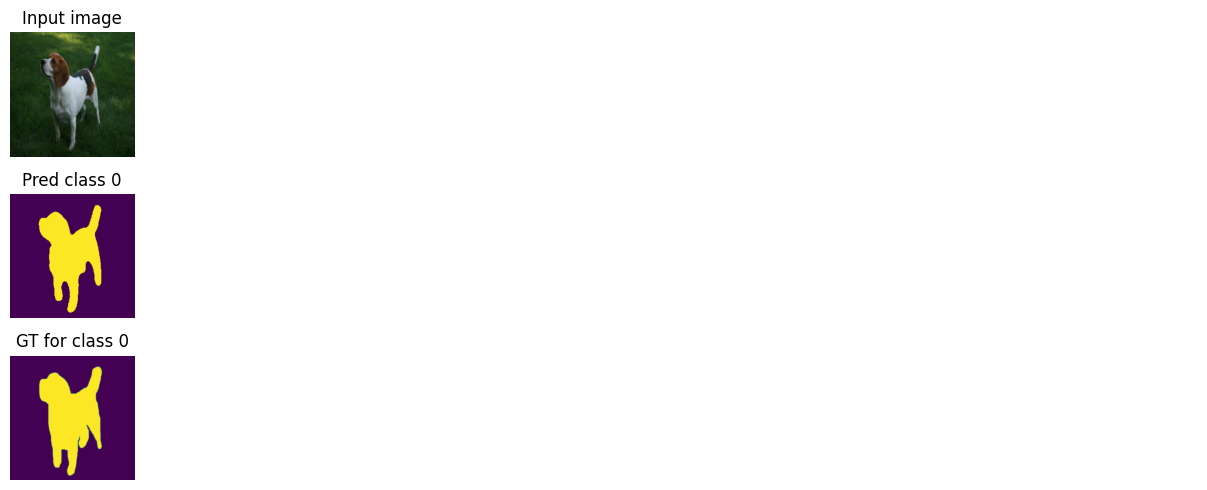

Train loss: 0.07524 | Time: 19m 27s | Val loss: 0.11934
Train_DICE_avg: 0.95950 | Train_Jaccard_avg: 0.92293 | Train_Sensitivity_avg: 0.98259 | Train_Specificity_avg: 0.95580 
Class 0 - Train_DICE: 0.95950 | Train_Jaccard: 0.92293 | Train_Sensitivity: 0.98259 | Train_Specificity: 0.95580 
Val_DICE_avg: 0.93601 | Val_Jaccard_avg: 0.88623 | Val_Sensitivity_avg: 0.96601 | Val_Specificity_avg: 0.94070 
Class 0 - Val_DICE: 0.93601 | Val_Jaccard: 0.88623 | Val_Sensitivity: 0.96601 | Val_Specificity: 0.94070 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07467 | Time: 19m 50s | Val loss: 0.11936
Train_DICE_avg: 0.95900 | Train_Jaccard_avg: 0.92274 | Train_Sensitivity_avg: 0.98170 | Train_Specificity_avg: 0.95544 
Class 0 - Train_DICE: 0.95900 | Train_Jaccard: 0.92274 | Train_Sensitivity: 0.98170 | Train_Specificity: 0.95544 
Val_DICE_avg: 0.93528 | Val_Jaccard_avg: 0.88484 | Val_Sensitivity_avg: 0.96597 | Val_Specificity_avg: 0.94022 
Class 0 - Val_DICE: 0.93528 | Val_Jaccard: 0.88484 | Val_Sensitivity: 0.96597 | Val_Specificity: 0.94022 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07445 | Time: 20m 13s | Val loss: 0.11990
Train_DICE_avg: 0.96029 | Train_Jaccard_avg: 0.92429 | Train_Sensitivity_avg: 0.98232 | Train_Specificity_avg: 0.95661 
Class 0 - Train_DICE: 0.96029 | Train_Jaccard: 0.92429 | Train_Sensitivity: 0.98232 | Train_Specificity: 0.95661 
Val_DICE_avg: 0.93616 | Val_Jaccard_avg: 0.88630 | Val_Sensitivity_avg: 0.96505 | Val_Specificity_avg: 0.94192 
Class 0 - Val_DICE: 0.93616 | Val_Jaccard: 0.88630 | Val_Sensitivity: 0.96505 | Val_Specificity: 0.94192 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07361 | Time: 20m 36s | Val loss: 0.11869
Train_DICE_avg: 0.96041 | Train_Jaccard_avg: 0.92475 | Train_Sensitivity_avg: 0.98292 | Train_Specificity_avg: 0.95687 
Class 0 - Train_DICE: 0.96041 | Train_Jaccard: 0.92475 | Train_Sensitivity: 0.98292 | Train_Specificity: 0.95687 
Val_DICE_avg: 0.93731 | Val_Jaccard_avg: 0.88826 | Val_Sensitivity_avg: 0.96509 | Val_Specificity_avg: 0.94312 
Class 0 - Val_DICE: 0.93731 | Val_Jaccard: 0.88826 | Val_Sensitivity: 0.96509 | Val_Specificity: 0.94312 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07279 | Time: 20m 59s | Val loss: 0.11750
Train_DICE_avg: 0.95977 | Train_Jaccard_avg: 0.92410 | Train_Sensitivity_avg: 0.98198 | Train_Specificity_avg: 0.95708 
Class 0 - Train_DICE: 0.95977 | Train_Jaccard: 0.92410 | Train_Sensitivity: 0.98198 | Train_Specificity: 0.95708 
Val_DICE_avg: 0.93590 | Val_Jaccard_avg: 0.88574 | Val_Sensitivity_avg: 0.96801 | Val_Specificity_avg: 0.94033 
Class 0 - Val_DICE: 0.93590 | Val_Jaccard: 0.88574 | Val_Sensitivity: 0.96801 | Val_Specificity: 0.94033 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

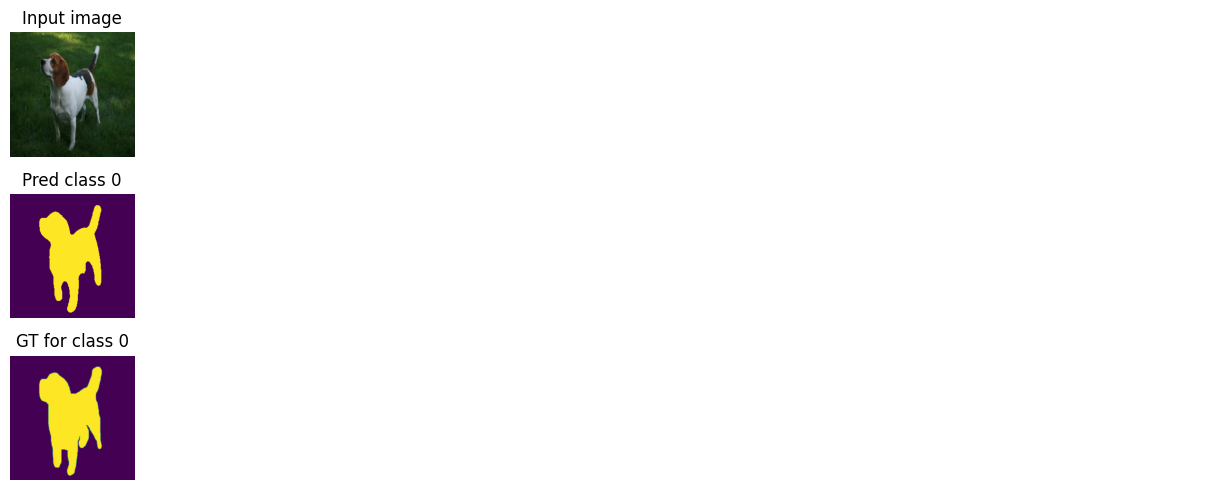

Train loss: 0.07189 | Time: 21m 23s | Val loss: 0.11843
Train_DICE_avg: 0.96056 | Train_Jaccard_avg: 0.92554 | Train_Sensitivity_avg: 0.98252 | Train_Specificity_avg: 0.95714 
Class 0 - Train_DICE: 0.96056 | Train_Jaccard: 0.92554 | Train_Sensitivity: 0.98252 | Train_Specificity: 0.95714 
Val_DICE_avg: 0.93683 | Val_Jaccard_avg: 0.88725 | Val_Sensitivity_avg: 0.96604 | Val_Specificity_avg: 0.94176 
Class 0 - Val_DICE: 0.93683 | Val_Jaccard: 0.88725 | Val_Sensitivity: 0.96604 | Val_Specificity: 0.94176 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07244 | Time: 21m 46s | Val loss: 0.11915
Train_DICE_avg: 0.96110 | Train_Jaccard_avg: 0.92582 | Train_Sensitivity_avg: 0.98235 | Train_Specificity_avg: 0.95813 
Class 0 - Train_DICE: 0.96110 | Train_Jaccard: 0.92582 | Train_Sensitivity: 0.98235 | Train_Specificity: 0.95813 
Val_DICE_avg: 0.93547 | Val_Jaccard_avg: 0.88494 | Val_Sensitivity_avg: 0.96580 | Val_Specificity_avg: 0.94030 
Class 0 - Val_DICE: 0.93547 | Val_Jaccard: 0.88494 | Val_Sensitivity: 0.96580 | Val_Specificity: 0.94030 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07149 | Time: 22m 9s | Val loss: 0.12217
Train_DICE_avg: 0.96144 | Train_Jaccard_avg: 0.92643 | Train_Sensitivity_avg: 0.98327 | Train_Specificity_avg: 0.95770 
Class 0 - Train_DICE: 0.96144 | Train_Jaccard: 0.92643 | Train_Sensitivity: 0.98327 | Train_Specificity: 0.95770 
Val_DICE_avg: 0.93471 | Val_Jaccard_avg: 0.88392 | Val_Sensitivity_avg: 0.96376 | Val_Specificity_avg: 0.94116 
Class 0 - Val_DICE: 0.93471 | Val_Jaccard: 0.88392 | Val_Sensitivity: 0.96376 | Val_Specificity: 0.94116 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07060 | Time: 22m 31s | Val loss: 0.11993
Train_DICE_avg: 0.96147 | Train_Jaccard_avg: 0.92646 | Train_Sensitivity_avg: 0.98387 | Train_Specificity_avg: 0.95722 
Class 0 - Train_DICE: 0.96147 | Train_Jaccard: 0.92646 | Train_Sensitivity: 0.98387 | Train_Specificity: 0.95722 
Val_DICE_avg: 0.93484 | Val_Jaccard_avg: 0.88413 | Val_Sensitivity_avg: 0.96527 | Val_Specificity_avg: 0.94089 
Class 0 - Val_DICE: 0.93484 | Val_Jaccard: 0.88413 | Val_Sensitivity: 0.96527 | Val_Specificity: 0.94089 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07052 | Time: 22m 54s | Val loss: 0.12063
Train_DICE_avg: 0.96193 | Train_Jaccard_avg: 0.92726 | Train_Sensitivity_avg: 0.98330 | Train_Specificity_avg: 0.95841 
Class 0 - Train_DICE: 0.96193 | Train_Jaccard: 0.92726 | Train_Sensitivity: 0.98330 | Train_Specificity: 0.95841 
Val_DICE_avg: 0.93589 | Val_Jaccard_avg: 0.88571 | Val_Sensitivity_avg: 0.96452 | Val_Specificity_avg: 0.94136 
Class 0 - Val_DICE: 0.93589 | Val_Jaccard: 0.88571 | Val_Sensitivity: 0.96452 | Val_Specificity: 0.94136 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

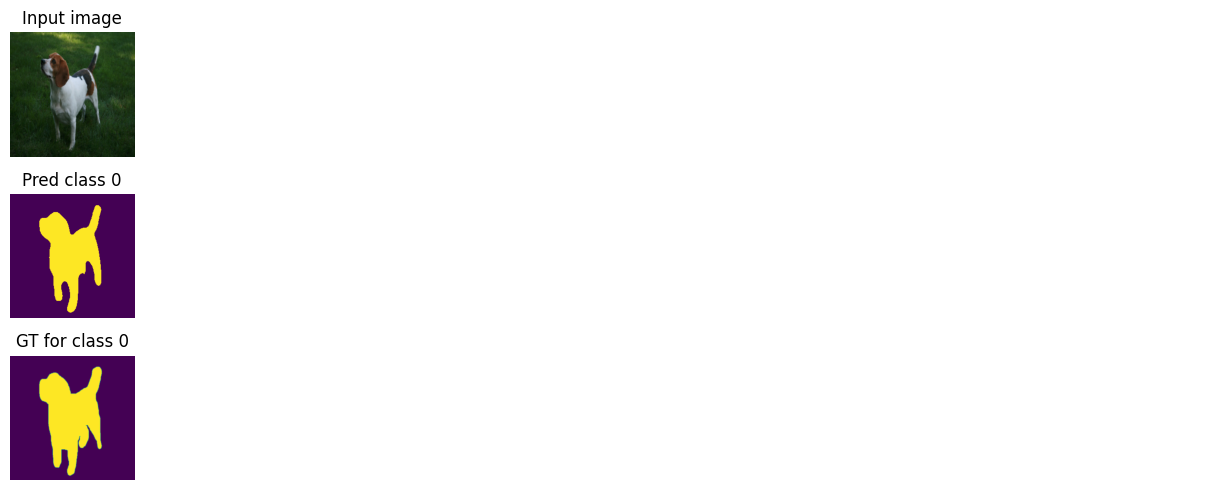

Train loss: 0.06988 | Time: 23m 18s | Val loss: 0.12066
Train_DICE_avg: 0.96192 | Train_Jaccard_avg: 0.92728 | Train_Sensitivity_avg: 0.98304 | Train_Specificity_avg: 0.95896 
Class 0 - Train_DICE: 0.96192 | Train_Jaccard: 0.92728 | Train_Sensitivity: 0.98304 | Train_Specificity: 0.95896 
Val_DICE_avg: 0.93556 | Val_Jaccard_avg: 0.88515 | Val_Sensitivity_avg: 0.96529 | Val_Specificity_avg: 0.94068 
Class 0 - Val_DICE: 0.93556 | Val_Jaccard: 0.88515 | Val_Sensitivity: 0.96529 | Val_Specificity: 0.94068 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]



Global Performance Metrics:
Loss mean: 0.11758, std: 0.01897
Dice Coefficient mean: 0.94323, std: 0.04606
Jaccard Index mean: 0.89578, std: 0.07440
Sensitivity mean: 0.96063, std: 0.05349
Specificity mean: 0.95203, std: 0.05130

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94323, std: 0.04606
Jaccard mean: 0.89578, std: 0.07440
Sensitivity mean: 0.96063, std: 0.05349
Specificity mean: 0.95203, std: 0.05130


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-ResUNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.65 GB
GPU Memory - Reserved: 0.88 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

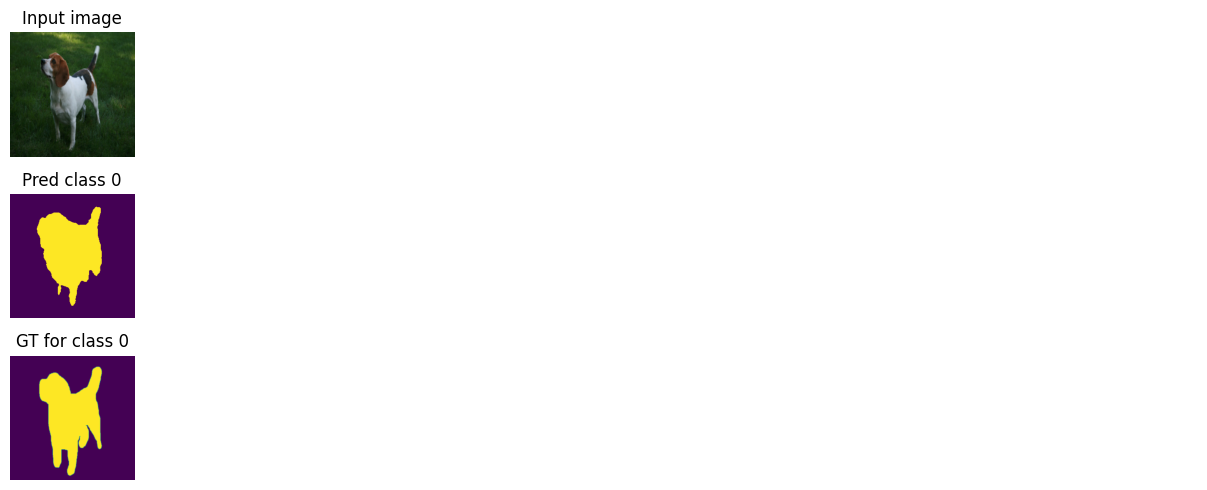

Train loss: 0.04260 | Time: 0m 23s | Val loss: 0.03409
Train_DICE_avg: 0.69077 | Train_Jaccard_avg: 0.57104 | Train_Sensitivity_avg: 0.87368 | Train_Specificity_avg: 0.78270 
Class 0 - Train_DICE: 0.69077 | Train_Jaccard: 0.57104 | Train_Sensitivity: 0.87368 | Train_Specificity: 0.78270 
Val_DICE_avg: 0.75663 | Val_Jaccard_avg: 0.62075 | Val_Sensitivity_avg: 0.97584 | Val_Specificity_avg: 0.77754 
Class 0 - Val_DICE: 0.75663 | Val_Jaccard: 0.62075 | Val_Sensitivity: 0.97584 | Val_Specificity: 0.77754 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02291 | Time: 0m 45s | Val loss: 0.01823
Train_DICE_avg: 0.89146 | Train_Jaccard_avg: 0.81186 | Train_Sensitivity_avg: 0.91465 | Train_Specificity_avg: 0.90670 
Class 0 - Train_DICE: 0.89146 | Train_Jaccard: 0.81186 | Train_Sensitivity: 0.91465 | Train_Specificity: 0.90670 
Val_DICE_avg: 0.90518 | Val_Jaccard_avg: 0.83458 | Val_Sensitivity_avg: 0.95366 | Val_Specificity_avg: 0.90988 
Class 0 - Val_DICE: 0.90518 | Val_Jaccard: 0.83458 | Val_Sensitivity: 0.95366 | Val_Specificity: 0.90988 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01976 | Time: 1m 7s | Val loss: 0.01691
Train_DICE_avg: 0.90746 | Train_Jaccard_avg: 0.83739 | Train_Sensitivity_avg: 0.92929 | Train_Specificity_avg: 0.91870 
Class 0 - Train_DICE: 0.90746 | Train_Jaccard: 0.83739 | Train_Sensitivity: 0.92929 | Train_Specificity: 0.91870 
Val_DICE_avg: 0.91608 | Val_Jaccard_avg: 0.85261 | Val_Sensitivity_avg: 0.95494 | Val_Specificity_avg: 0.92251 
Class 0 - Val_DICE: 0.91608 | Val_Jaccard: 0.85261 | Val_Sensitivity: 0.95494 | Val_Specificity: 0.92251 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01832 | Time: 1m 30s | Val loss: 0.01714
Train_DICE_avg: 0.91478 | Train_Jaccard_avg: 0.84924 | Train_Sensitivity_avg: 0.93514 | Train_Specificity_avg: 0.92355 
Class 0 - Train_DICE: 0.91478 | Train_Jaccard: 0.84924 | Train_Sensitivity: 0.93514 | Train_Specificity: 0.92355 
Val_DICE_avg: 0.90567 | Val_Jaccard_avg: 0.83548 | Val_Sensitivity_avg: 0.97086 | Val_Specificity_avg: 0.90400 
Class 0 - Val_DICE: 0.90567 | Val_Jaccard: 0.83548 | Val_Sensitivity: 0.97086 | Val_Specificity: 0.90400 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01742 | Time: 1m 52s | Val loss: 0.01673
Train_DICE_avg: 0.91868 | Train_Jaccard_avg: 0.85579 | Train_Sensitivity_avg: 0.94233 | Train_Specificity_avg: 0.92401 
Class 0 - Train_DICE: 0.91868 | Train_Jaccard: 0.85579 | Train_Sensitivity: 0.94233 | Train_Specificity: 0.92401 
Val_DICE_avg: 0.90842 | Val_Jaccard_avg: 0.84162 | Val_Sensitivity_avg: 0.96556 | Val_Specificity_avg: 0.91271 
Class 0 - Val_DICE: 0.90842 | Val_Jaccard: 0.84162 | Val_Sensitivity: 0.96556 | Val_Specificity: 0.91271 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

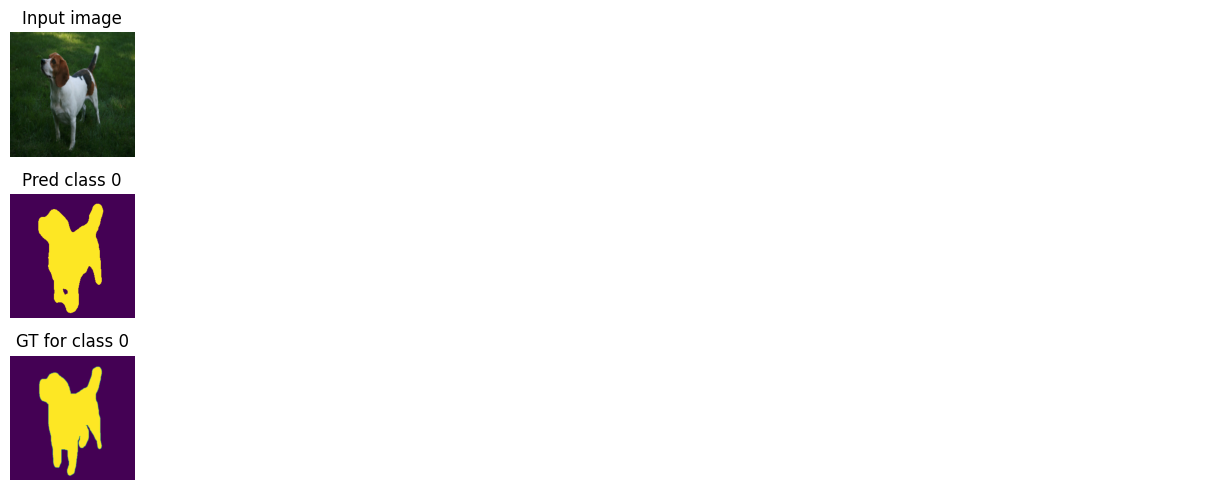

Train loss: 0.01655 | Time: 2m 15s | Val loss: 0.01465
Train_DICE_avg: 0.92255 | Train_Jaccard_avg: 0.86204 | Train_Sensitivity_avg: 0.94414 | Train_Specificity_avg: 0.92719 
Class 0 - Train_DICE: 0.92255 | Train_Jaccard: 0.86204 | Train_Sensitivity: 0.94414 | Train_Specificity: 0.92719 
Val_DICE_avg: 0.92622 | Val_Jaccard_avg: 0.86932 | Val_Sensitivity_avg: 0.95775 | Val_Specificity_avg: 0.93530 
Class 0 - Val_DICE: 0.92622 | Val_Jaccard: 0.86932 | Val_Sensitivity: 0.95775 | Val_Specificity: 0.93530 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01584 | Time: 2m 37s | Val loss: 0.01577
Train_DICE_avg: 0.92487 | Train_Jaccard_avg: 0.86594 | Train_Sensitivity_avg: 0.94696 | Train_Specificity_avg: 0.92968 
Class 0 - Train_DICE: 0.92487 | Train_Jaccard: 0.86594 | Train_Sensitivity: 0.94696 | Train_Specificity: 0.92968 
Val_DICE_avg: 0.91470 | Val_Jaccard_avg: 0.85132 | Val_Sensitivity_avg: 0.97192 | Val_Specificity_avg: 0.91623 
Class 0 - Val_DICE: 0.91470 | Val_Jaccard: 0.85132 | Val_Sensitivity: 0.97192 | Val_Specificity: 0.91623 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01514 | Time: 3m 0s | Val loss: 0.01542
Train_DICE_avg: 0.92863 | Train_Jaccard_avg: 0.87169 | Train_Sensitivity_avg: 0.95099 | Train_Specificity_avg: 0.93158 
Class 0 - Train_DICE: 0.92863 | Train_Jaccard: 0.87169 | Train_Sensitivity: 0.95099 | Train_Specificity: 0.93158 
Val_DICE_avg: 0.91761 | Val_Jaccard_avg: 0.85591 | Val_Sensitivity_avg: 0.96955 | Val_Specificity_avg: 0.91911 
Class 0 - Val_DICE: 0.91761 | Val_Jaccard: 0.85591 | Val_Sensitivity: 0.96955 | Val_Specificity: 0.91911 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01460 | Time: 3m 22s | Val loss: 0.01417
Train_DICE_avg: 0.92982 | Train_Jaccard_avg: 0.87374 | Train_Sensitivity_avg: 0.95078 | Train_Specificity_avg: 0.93304 
Class 0 - Train_DICE: 0.92982 | Train_Jaccard: 0.87374 | Train_Sensitivity: 0.95078 | Train_Specificity: 0.93304 
Val_DICE_avg: 0.92713 | Val_Jaccard_avg: 0.87075 | Val_Sensitivity_avg: 0.96102 | Val_Specificity_avg: 0.93305 
Class 0 - Val_DICE: 0.92713 | Val_Jaccard: 0.87075 | Val_Sensitivity: 0.96102 | Val_Specificity: 0.93305 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01374 | Time: 3m 45s | Val loss: 0.01412
Train_DICE_avg: 0.93304 | Train_Jaccard_avg: 0.87902 | Train_Sensitivity_avg: 0.95388 | Train_Specificity_avg: 0.93654 
Class 0 - Train_DICE: 0.93304 | Train_Jaccard: 0.87902 | Train_Sensitivity: 0.95388 | Train_Specificity: 0.93654 
Val_DICE_avg: 0.92593 | Val_Jaccard_avg: 0.86883 | Val_Sensitivity_avg: 0.96649 | Val_Specificity_avg: 0.92729 
Class 0 - Val_DICE: 0.92593 | Val_Jaccard: 0.86883 | Val_Sensitivity: 0.96649 | Val_Specificity: 0.92729 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

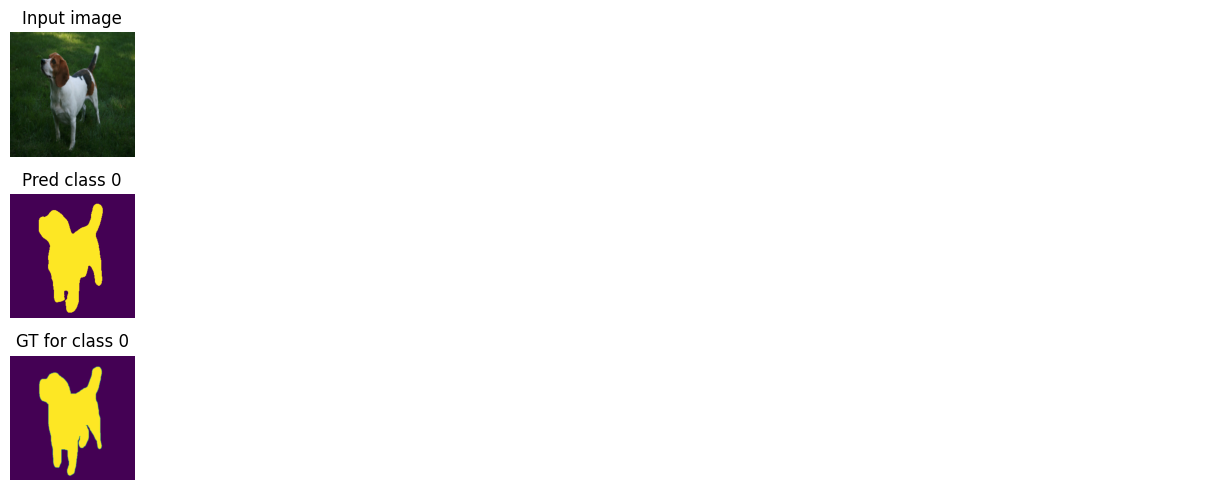

Train loss: 0.01446 | Time: 4m 8s | Val loss: 0.01387
Train_DICE_avg: 0.93009 | Train_Jaccard_avg: 0.87420 | Train_Sensitivity_avg: 0.95305 | Train_Specificity_avg: 0.93226 
Class 0 - Train_DICE: 0.93009 | Train_Jaccard: 0.87420 | Train_Sensitivity: 0.95305 | Train_Specificity: 0.93226 
Val_DICE_avg: 0.92990 | Val_Jaccard_avg: 0.87570 | Val_Sensitivity_avg: 0.95663 | Val_Specificity_avg: 0.93823 
Class 0 - Val_DICE: 0.92990 | Val_Jaccard: 0.87570 | Val_Sensitivity: 0.95663 | Val_Specificity: 0.93823 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01380 | Time: 4m 31s | Val loss: 0.01396
Train_DICE_avg: 0.93311 | Train_Jaccard_avg: 0.87945 | Train_Sensitivity_avg: 0.95410 | Train_Specificity_avg: 0.93530 
Class 0 - Train_DICE: 0.93311 | Train_Jaccard: 0.87945 | Train_Sensitivity: 0.95410 | Train_Specificity: 0.93530 
Val_DICE_avg: 0.92807 | Val_Jaccard_avg: 0.87247 | Val_Sensitivity_avg: 0.96568 | Val_Specificity_avg: 0.92892 
Class 0 - Val_DICE: 0.92807 | Val_Jaccard: 0.87247 | Val_Sensitivity: 0.96568 | Val_Specificity: 0.92892 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01339 | Time: 4m 54s | Val loss: 0.01369
Train_DICE_avg: 0.93395 | Train_Jaccard_avg: 0.88085 | Train_Sensitivity_avg: 0.95537 | Train_Specificity_avg: 0.93660 
Class 0 - Train_DICE: 0.93395 | Train_Jaccard: 0.88085 | Train_Sensitivity: 0.95537 | Train_Specificity: 0.93660 
Val_DICE_avg: 0.92967 | Val_Jaccard_avg: 0.87576 | Val_Sensitivity_avg: 0.96074 | Val_Specificity_avg: 0.93797 
Class 0 - Val_DICE: 0.92967 | Val_Jaccard: 0.87576 | Val_Sensitivity: 0.96074 | Val_Specificity: 0.93797 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01275 | Time: 5m 17s | Val loss: 0.01326
Train_DICE_avg: 0.93606 | Train_Jaccard_avg: 0.88431 | Train_Sensitivity_avg: 0.95578 | Train_Specificity_avg: 0.93821 
Class 0 - Train_DICE: 0.93606 | Train_Jaccard: 0.88431 | Train_Sensitivity: 0.95578 | Train_Specificity: 0.93821 
Val_DICE_avg: 0.93209 | Val_Jaccard_avg: 0.87886 | Val_Sensitivity_avg: 0.96563 | Val_Specificity_avg: 0.93461 
Class 0 - Val_DICE: 0.93209 | Val_Jaccard: 0.87886 | Val_Sensitivity: 0.96563 | Val_Specificity: 0.93461 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01268 | Time: 5m 40s | Val loss: 0.01334
Train_DICE_avg: 0.93675 | Train_Jaccard_avg: 0.88557 | Train_Sensitivity_avg: 0.95639 | Train_Specificity_avg: 0.93962 
Class 0 - Train_DICE: 0.93675 | Train_Jaccard: 0.88557 | Train_Sensitivity: 0.95639 | Train_Specificity: 0.93962 
Val_DICE_avg: 0.93271 | Val_Jaccard_avg: 0.88013 | Val_Sensitivity_avg: 0.95929 | Val_Specificity_avg: 0.93882 
Class 0 - Val_DICE: 0.93271 | Val_Jaccard: 0.88013 | Val_Sensitivity: 0.95929 | Val_Specificity: 0.93882 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

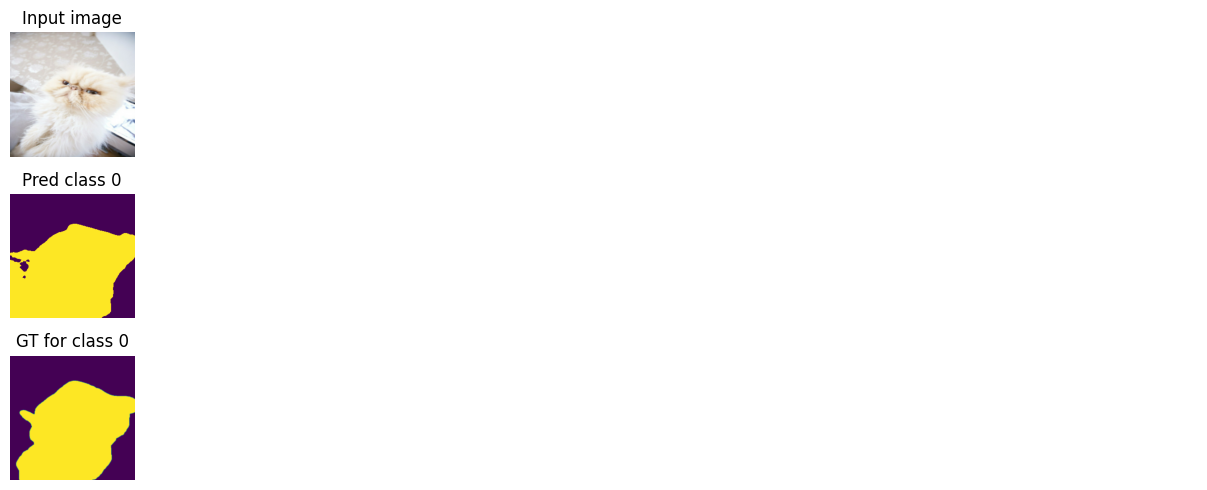

Train loss: 0.01208 | Time: 6m 3s | Val loss: 0.01354
Train_DICE_avg: 0.93781 | Train_Jaccard_avg: 0.88715 | Train_Sensitivity_avg: 0.95898 | Train_Specificity_avg: 0.93910 
Class 0 - Train_DICE: 0.93781 | Train_Jaccard: 0.88715 | Train_Sensitivity: 0.95898 | Train_Specificity: 0.93910 
Val_DICE_avg: 0.92694 | Val_Jaccard_avg: 0.87014 | Val_Sensitivity_avg: 0.96992 | Val_Specificity_avg: 0.92617 
Class 0 - Val_DICE: 0.92694 | Val_Jaccard: 0.87014 | Val_Sensitivity: 0.96992 | Val_Specificity: 0.92617 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01195 | Time: 6m 25s | Val loss: 0.01316
Train_DICE_avg: 0.93936 | Train_Jaccard_avg: 0.88991 | Train_Sensitivity_avg: 0.95912 | Train_Specificity_avg: 0.94103 
Class 0 - Train_DICE: 0.93936 | Train_Jaccard: 0.88991 | Train_Sensitivity: 0.95912 | Train_Specificity: 0.94103 
Val_DICE_avg: 0.93163 | Val_Jaccard_avg: 0.87856 | Val_Sensitivity_avg: 0.96360 | Val_Specificity_avg: 0.93642 
Class 0 - Val_DICE: 0.93163 | Val_Jaccard: 0.87856 | Val_Sensitivity: 0.96360 | Val_Specificity: 0.93642 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01168 | Time: 6m 48s | Val loss: 0.01369
Train_DICE_avg: 0.94030 | Train_Jaccard_avg: 0.89129 | Train_Sensitivity_avg: 0.96008 | Train_Specificity_avg: 0.94129 
Class 0 - Train_DICE: 0.94030 | Train_Jaccard: 0.89129 | Train_Sensitivity: 0.96008 | Train_Specificity: 0.94129 
Val_DICE_avg: 0.92889 | Val_Jaccard_avg: 0.87445 | Val_Sensitivity_avg: 0.96624 | Val_Specificity_avg: 0.93337 
Class 0 - Val_DICE: 0.92889 | Val_Jaccard: 0.87445 | Val_Sensitivity: 0.96624 | Val_Specificity: 0.93337 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01142 | Time: 7m 11s | Val loss: 0.01313
Train_DICE_avg: 0.94133 | Train_Jaccard_avg: 0.89311 | Train_Sensitivity_avg: 0.95922 | Train_Specificity_avg: 0.94395 
Class 0 - Train_DICE: 0.94133 | Train_Jaccard: 0.89311 | Train_Sensitivity: 0.95922 | Train_Specificity: 0.94395 
Val_DICE_avg: 0.93062 | Val_Jaccard_avg: 0.87699 | Val_Sensitivity_avg: 0.96613 | Val_Specificity_avg: 0.93586 
Class 0 - Val_DICE: 0.93062 | Val_Jaccard: 0.87699 | Val_Sensitivity: 0.96613 | Val_Specificity: 0.93586 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01106 | Time: 7m 34s | Val loss: 0.01423
Train_DICE_avg: 0.94134 | Train_Jaccard_avg: 0.89315 | Train_Sensitivity_avg: 0.96148 | Train_Specificity_avg: 0.94329 
Class 0 - Train_DICE: 0.94134 | Train_Jaccard: 0.89315 | Train_Sensitivity: 0.96148 | Train_Specificity: 0.94329 
Val_DICE_avg: 0.92455 | Val_Jaccard_avg: 0.86664 | Val_Sensitivity_avg: 0.97281 | Val_Specificity_avg: 0.92207 
Class 0 - Val_DICE: 0.92455 | Val_Jaccard: 0.86664 | Val_Sensitivity: 0.97281 | Val_Specificity: 0.92207 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

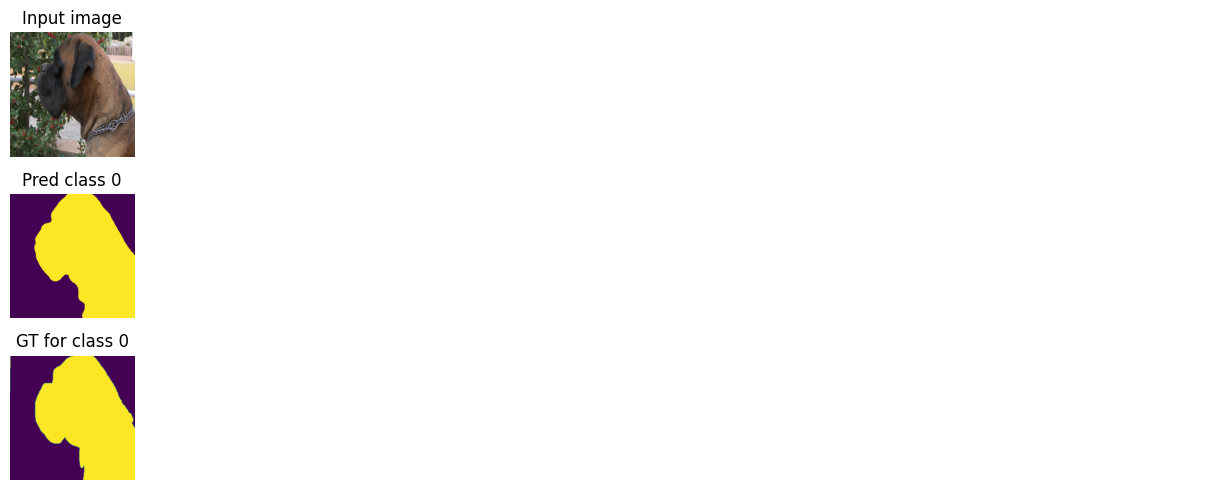

Train loss: 0.01169 | Time: 7m 57s | Val loss: 0.01423
Train_DICE_avg: 0.93969 | Train_Jaccard_avg: 0.89069 | Train_Sensitivity_avg: 0.96211 | Train_Specificity_avg: 0.93957 
Class 0 - Train_DICE: 0.93969 | Train_Jaccard: 0.89069 | Train_Sensitivity: 0.96211 | Train_Specificity: 0.93957 
Val_DICE_avg: 0.92230 | Val_Jaccard_avg: 0.86344 | Val_Sensitivity_avg: 0.97446 | Val_Specificity_avg: 0.92254 
Class 0 - Val_DICE: 0.92230 | Val_Jaccard: 0.86344 | Val_Sensitivity: 0.97446 | Val_Specificity: 0.92254 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01091 | Time: 8m 20s | Val loss: 0.01363
Train_DICE_avg: 0.94319 | Train_Jaccard_avg: 0.89653 | Train_Sensitivity_avg: 0.96014 | Train_Specificity_avg: 0.94567 
Class 0 - Train_DICE: 0.94319 | Train_Jaccard: 0.89653 | Train_Sensitivity: 0.96014 | Train_Specificity: 0.94567 
Val_DICE_avg: 0.92828 | Val_Jaccard_avg: 0.87298 | Val_Sensitivity_avg: 0.96994 | Val_Specificity_avg: 0.93009 
Class 0 - Val_DICE: 0.92828 | Val_Jaccard: 0.87298 | Val_Sensitivity: 0.96994 | Val_Specificity: 0.93009 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01096 | Time: 8m 43s | Val loss: 0.01442
Train_DICE_avg: 0.94199 | Train_Jaccard_avg: 0.89437 | Train_Sensitivity_avg: 0.96041 | Train_Specificity_avg: 0.94511 
Class 0 - Train_DICE: 0.94199 | Train_Jaccard: 0.89437 | Train_Sensitivity: 0.96041 | Train_Specificity: 0.94511 
Val_DICE_avg: 0.92945 | Val_Jaccard_avg: 0.87734 | Val_Sensitivity_avg: 0.96618 | Val_Specificity_avg: 0.93487 
Class 0 - Val_DICE: 0.92945 | Val_Jaccard: 0.87734 | Val_Sensitivity: 0.96618 | Val_Specificity: 0.93487 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01083 | Time: 9m 6s | Val loss: 0.01294
Train_DICE_avg: 0.94271 | Train_Jaccard_avg: 0.89591 | Train_Sensitivity_avg: 0.96074 | Train_Specificity_avg: 0.94530 
Class 0 - Train_DICE: 0.94271 | Train_Jaccard: 0.89591 | Train_Sensitivity: 0.96074 | Train_Specificity: 0.94530 
Val_DICE_avg: 0.93637 | Val_Jaccard_avg: 0.88662 | Val_Sensitivity_avg: 0.95921 | Val_Specificity_avg: 0.94514 
Class 0 - Val_DICE: 0.93637 | Val_Jaccard: 0.88662 | Val_Sensitivity: 0.95921 | Val_Specificity: 0.94514 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01050 | Time: 9m 29s | Val loss: 0.01281
Train_DICE_avg: 0.94401 | Train_Jaccard_avg: 0.89804 | Train_Sensitivity_avg: 0.96249 | Train_Specificity_avg: 0.94687 
Class 0 - Train_DICE: 0.94401 | Train_Jaccard: 0.89804 | Train_Sensitivity: 0.96249 | Train_Specificity: 0.94687 
Val_DICE_avg: 0.93339 | Val_Jaccard_avg: 0.88143 | Val_Sensitivity_avg: 0.96805 | Val_Specificity_avg: 0.93555 
Class 0 - Val_DICE: 0.93339 | Val_Jaccard: 0.88143 | Val_Sensitivity: 0.96805 | Val_Specificity: 0.93555 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

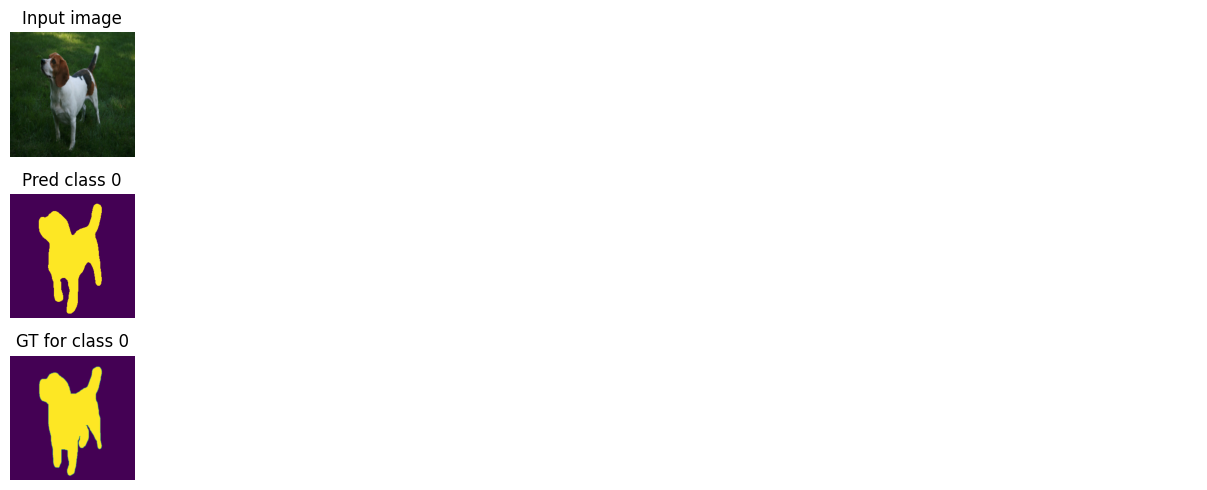

Train loss: 0.01005 | Time: 9m 52s | Val loss: 0.01349
Train_DICE_avg: 0.94719 | Train_Jaccard_avg: 0.90326 | Train_Sensitivity_avg: 0.96312 | Train_Specificity_avg: 0.94864 
Class 0 - Train_DICE: 0.94719 | Train_Jaccard: 0.90326 | Train_Sensitivity: 0.96312 | Train_Specificity: 0.94864 
Val_DICE_avg: 0.92874 | Val_Jaccard_avg: 0.87464 | Val_Sensitivity_avg: 0.96388 | Val_Specificity_avg: 0.93677 
Class 0 - Val_DICE: 0.92874 | Val_Jaccard: 0.87464 | Val_Sensitivity: 0.96388 | Val_Specificity: 0.93677 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00968 | Time: 10m 15s | Val loss: 0.01272
Train_DICE_avg: 0.94800 | Train_Jaccard_avg: 0.90473 | Train_Sensitivity_avg: 0.96442 | Train_Specificity_avg: 0.95091 
Class 0 - Train_DICE: 0.94800 | Train_Jaccard: 0.90473 | Train_Sensitivity: 0.96442 | Train_Specificity: 0.95091 
Val_DICE_avg: 0.93667 | Val_Jaccard_avg: 0.88733 | Val_Sensitivity_avg: 0.96510 | Val_Specificity_avg: 0.94143 
Class 0 - Val_DICE: 0.93667 | Val_Jaccard: 0.88733 | Val_Sensitivity: 0.96510 | Val_Specificity: 0.94143 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01001 | Time: 10m 38s | Val loss: 0.01393
Train_DICE_avg: 0.94598 | Train_Jaccard_avg: 0.90131 | Train_Sensitivity_avg: 0.96372 | Train_Specificity_avg: 0.94821 
Class 0 - Train_DICE: 0.94598 | Train_Jaccard: 0.90131 | Train_Sensitivity: 0.96372 | Train_Specificity: 0.94821 
Val_DICE_avg: 0.93259 | Val_Jaccard_avg: 0.88049 | Val_Sensitivity_avg: 0.96402 | Val_Specificity_avg: 0.93631 
Class 0 - Val_DICE: 0.93259 | Val_Jaccard: 0.88049 | Val_Sensitivity: 0.96402 | Val_Specificity: 0.93631 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00959 | Time: 11m 1s | Val loss: 0.01341
Train_DICE_avg: 0.94771 | Train_Jaccard_avg: 0.90436 | Train_Sensitivity_avg: 0.96376 | Train_Specificity_avg: 0.95112 
Class 0 - Train_DICE: 0.94771 | Train_Jaccard: 0.90436 | Train_Sensitivity: 0.96376 | Train_Specificity: 0.95112 
Val_DICE_avg: 0.92735 | Val_Jaccard_avg: 0.87224 | Val_Sensitivity_avg: 0.96953 | Val_Specificity_avg: 0.93049 
Class 0 - Val_DICE: 0.92735 | Val_Jaccard: 0.87224 | Val_Sensitivity: 0.96953 | Val_Specificity: 0.93049 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00942 | Time: 11m 24s | Val loss: 0.01280
Train_DICE_avg: 0.94858 | Train_Jaccard_avg: 0.90575 | Train_Sensitivity_avg: 0.96572 | Train_Specificity_avg: 0.95011 
Class 0 - Train_DICE: 0.94858 | Train_Jaccard: 0.90575 | Train_Sensitivity: 0.96572 | Train_Specificity: 0.95011 
Val_DICE_avg: 0.93599 | Val_Jaccard_avg: 0.88571 | Val_Sensitivity_avg: 0.96400 | Val_Specificity_avg: 0.94100 
Class 0 - Val_DICE: 0.93599 | Val_Jaccard: 0.88571 | Val_Sensitivity: 0.96400 | Val_Specificity: 0.94100 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

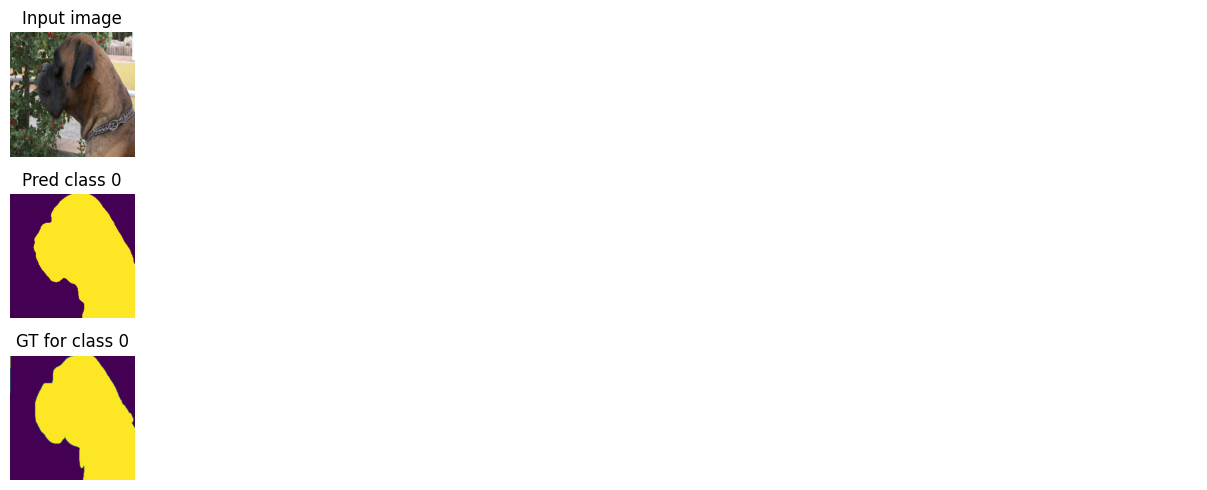

Train loss: 0.00993 | Time: 11m 48s | Val loss: 0.01261
Train_DICE_avg: 0.94634 | Train_Jaccard_avg: 0.90184 | Train_Sensitivity_avg: 0.96333 | Train_Specificity_avg: 0.94866 
Class 0 - Train_DICE: 0.94634 | Train_Jaccard: 0.90184 | Train_Sensitivity: 0.96333 | Train_Specificity: 0.94866 
Val_DICE_avg: 0.93378 | Val_Jaccard_avg: 0.88159 | Val_Sensitivity_avg: 0.96863 | Val_Specificity_avg: 0.93616 
Class 0 - Val_DICE: 0.93378 | Val_Jaccard: 0.88159 | Val_Sensitivity: 0.96863 | Val_Specificity: 0.93616 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00917 | Time: 12m 11s | Val loss: 0.01371
Train_DICE_avg: 0.94907 | Train_Jaccard_avg: 0.90665 | Train_Sensitivity_avg: 0.96578 | Train_Specificity_avg: 0.95220 
Class 0 - Train_DICE: 0.94907 | Train_Jaccard: 0.90665 | Train_Sensitivity: 0.96578 | Train_Specificity: 0.95220 
Val_DICE_avg: 0.93306 | Val_Jaccard_avg: 0.88190 | Val_Sensitivity_avg: 0.96750 | Val_Specificity_avg: 0.93703 
Class 0 - Val_DICE: 0.93306 | Val_Jaccard: 0.88190 | Val_Sensitivity: 0.96750 | Val_Specificity: 0.93703 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00902 | Time: 12m 34s | Val loss: 0.01409
Train_DICE_avg: 0.95017 | Train_Jaccard_avg: 0.90863 | Train_Sensitivity_avg: 0.96670 | Train_Specificity_avg: 0.95287 
Class 0 - Train_DICE: 0.95017 | Train_Jaccard: 0.90863 | Train_Sensitivity: 0.96670 | Train_Specificity: 0.95287 
Val_DICE_avg: 0.92912 | Val_Jaccard_avg: 0.87486 | Val_Sensitivity_avg: 0.97277 | Val_Specificity_avg: 0.92870 
Class 0 - Val_DICE: 0.92912 | Val_Jaccard: 0.87486 | Val_Sensitivity: 0.97277 | Val_Specificity: 0.92870 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00880 | Time: 12m 57s | Val loss: 0.01358
Train_DICE_avg: 0.95124 | Train_Jaccard_avg: 0.91047 | Train_Sensitivity_avg: 0.96835 | Train_Specificity_avg: 0.95385 
Class 0 - Train_DICE: 0.95124 | Train_Jaccard: 0.91047 | Train_Sensitivity: 0.96835 | Train_Specificity: 0.95385 
Val_DICE_avg: 0.93337 | Val_Jaccard_avg: 0.88205 | Val_Sensitivity_avg: 0.96787 | Val_Specificity_avg: 0.93850 
Class 0 - Val_DICE: 0.93337 | Val_Jaccard: 0.88205 | Val_Sensitivity: 0.96787 | Val_Specificity: 0.93850 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00879 | Time: 13m 21s | Val loss: 0.01283
Train_DICE_avg: 0.95187 | Train_Jaccard_avg: 0.91091 | Train_Sensitivity_avg: 0.96773 | Train_Specificity_avg: 0.95376 
Class 0 - Train_DICE: 0.95187 | Train_Jaccard: 0.91091 | Train_Sensitivity: 0.96773 | Train_Specificity: 0.95376 
Val_DICE_avg: 0.93743 | Val_Jaccard_avg: 0.88865 | Val_Sensitivity_avg: 0.96369 | Val_Specificity_avg: 0.94433 
Class 0 - Val_DICE: 0.93743 | Val_Jaccard: 0.88865 | Val_Sensitivity: 0.96369 | Val_Specificity: 0.94433 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

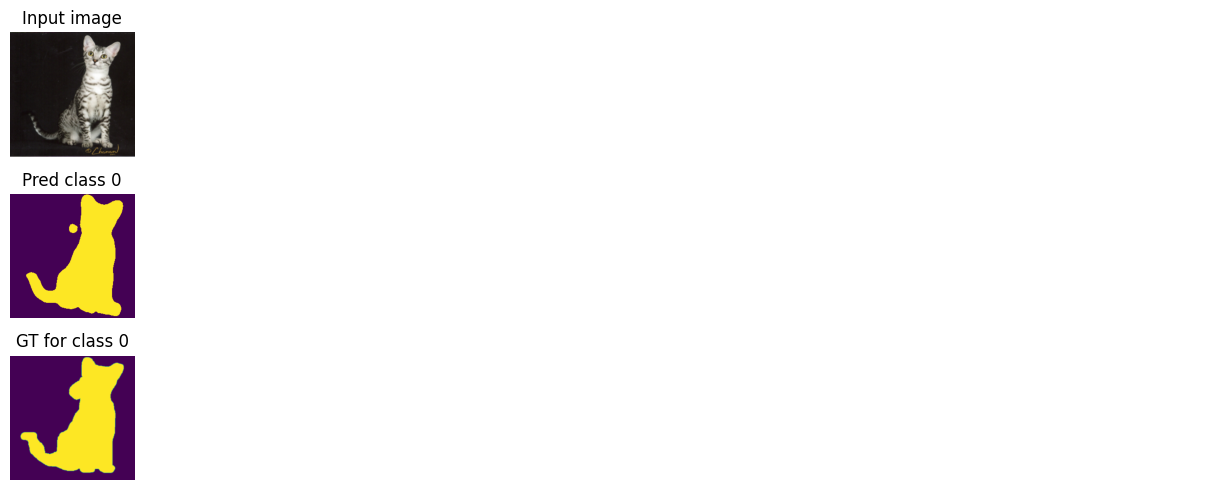

Train loss: 0.00855 | Time: 13m 44s | Val loss: 0.01315
Train_DICE_avg: 0.95219 | Train_Jaccard_avg: 0.91208 | Train_Sensitivity_avg: 0.96720 | Train_Specificity_avg: 0.95561 
Class 0 - Train_DICE: 0.95219 | Train_Jaccard: 0.91208 | Train_Sensitivity: 0.96720 | Train_Specificity: 0.95561 
Val_DICE_avg: 0.93337 | Val_Jaccard_avg: 0.88153 | Val_Sensitivity_avg: 0.96806 | Val_Specificity_avg: 0.93703 
Class 0 - Val_DICE: 0.93337 | Val_Jaccard: 0.88153 | Val_Sensitivity: 0.96806 | Val_Specificity: 0.93703 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00838 | Time: 14m 7s | Val loss: 0.01279
Train_DICE_avg: 0.95214 | Train_Jaccard_avg: 0.91213 | Train_Sensitivity_avg: 0.96822 | Train_Specificity_avg: 0.95548 
Class 0 - Train_DICE: 0.95214 | Train_Jaccard: 0.91213 | Train_Sensitivity: 0.96822 | Train_Specificity: 0.95548 
Val_DICE_avg: 0.93810 | Val_Jaccard_avg: 0.88925 | Val_Sensitivity_avg: 0.96511 | Val_Specificity_avg: 0.94104 
Class 0 - Val_DICE: 0.93810 | Val_Jaccard: 0.88925 | Val_Sensitivity: 0.96511 | Val_Specificity: 0.94104 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00808 | Time: 14m 30s | Val loss: 0.01301
Train_DICE_avg: 0.95427 | Train_Jaccard_avg: 0.91581 | Train_Sensitivity_avg: 0.96895 | Train_Specificity_avg: 0.95732 
Class 0 - Train_DICE: 0.95427 | Train_Jaccard: 0.91581 | Train_Sensitivity: 0.96895 | Train_Specificity: 0.95732 
Val_DICE_avg: 0.93627 | Val_Jaccard_avg: 0.88624 | Val_Sensitivity_avg: 0.96706 | Val_Specificity_avg: 0.94011 
Class 0 - Val_DICE: 0.93627 | Val_Jaccard: 0.88624 | Val_Sensitivity: 0.96706 | Val_Specificity: 0.94011 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00822 | Time: 14m 53s | Val loss: 0.01270
Train_DICE_avg: 0.95450 | Train_Jaccard_avg: 0.91556 | Train_Sensitivity_avg: 0.96877 | Train_Specificity_avg: 0.95663 
Class 0 - Train_DICE: 0.95450 | Train_Jaccard: 0.91556 | Train_Sensitivity: 0.96877 | Train_Specificity: 0.95663 
Val_DICE_avg: 0.93726 | Val_Jaccard_avg: 0.88785 | Val_Sensitivity_avg: 0.96677 | Val_Specificity_avg: 0.94109 
Class 0 - Val_DICE: 0.93726 | Val_Jaccard: 0.88785 | Val_Sensitivity: 0.96677 | Val_Specificity: 0.94109 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00803 | Time: 15m 16s | Val loss: 0.01292
Train_DICE_avg: 0.95673 | Train_Jaccard_avg: 0.91863 | Train_Sensitivity_avg: 0.97065 | Train_Specificity_avg: 0.95848 
Class 0 - Train_DICE: 0.95673 | Train_Jaccard: 0.91863 | Train_Sensitivity: 0.97065 | Train_Specificity: 0.95848 
Val_DICE_avg: 0.94091 | Val_Jaccard_avg: 0.89399 | Val_Sensitivity_avg: 0.96398 | Val_Specificity_avg: 0.94655 
Class 0 - Val_DICE: 0.94091 | Val_Jaccard: 0.89399 | Val_Sensitivity: 0.96398 | Val_Specificity: 0.94655 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

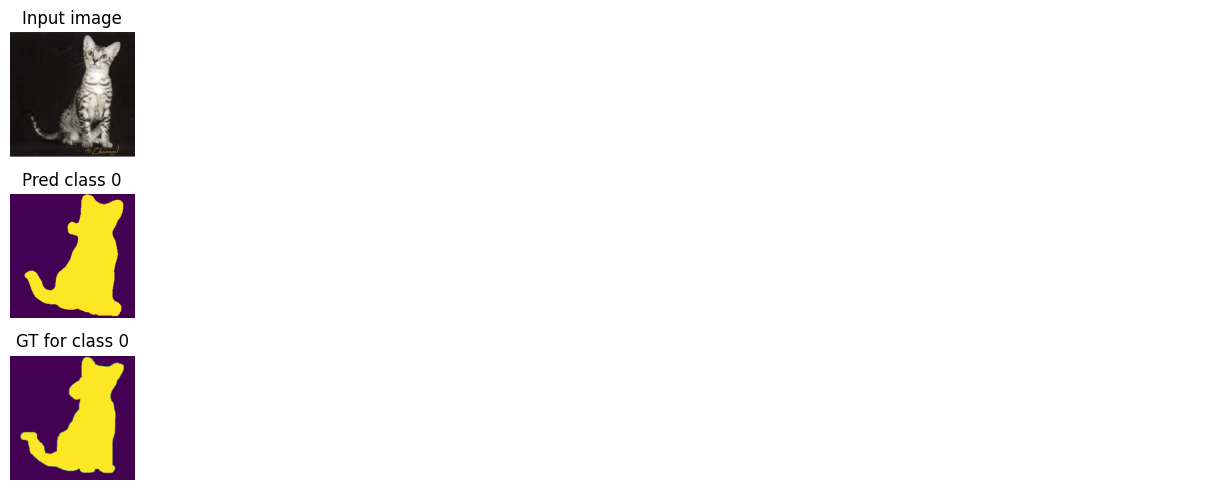

Train loss: 0.00797 | Time: 15m 40s | Val loss: 0.01320
Train_DICE_avg: 0.95477 | Train_Jaccard_avg: 0.91605 | Train_Sensitivity_avg: 0.97123 | Train_Specificity_avg: 0.95698 
Class 0 - Train_DICE: 0.95477 | Train_Jaccard: 0.91605 | Train_Sensitivity: 0.97123 | Train_Specificity: 0.95698 
Val_DICE_avg: 0.94157 | Val_Jaccard_avg: 0.89531 | Val_Sensitivity_avg: 0.96050 | Val_Specificity_avg: 0.94815 
Class 0 - Val_DICE: 0.94157 | Val_Jaccard: 0.89531 | Val_Sensitivity: 0.96050 | Val_Specificity: 0.94815 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00778 | Time: 16m 3s | Val loss: 0.01334
Train_DICE_avg: 0.95664 | Train_Jaccard_avg: 0.91929 | Train_Sensitivity_avg: 0.97104 | Train_Specificity_avg: 0.95927 
Class 0 - Train_DICE: 0.95664 | Train_Jaccard: 0.91929 | Train_Sensitivity: 0.97104 | Train_Specificity: 0.95927 
Val_DICE_avg: 0.94194 | Val_Jaccard_avg: 0.89570 | Val_Sensitivity_avg: 0.95980 | Val_Specificity_avg: 0.94778 
Class 0 - Val_DICE: 0.94194 | Val_Jaccard: 0.89570 | Val_Sensitivity: 0.95980 | Val_Specificity: 0.94778 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00780 | Time: 16m 26s | Val loss: 0.01333
Train_DICE_avg: 0.95497 | Train_Jaccard_avg: 0.91703 | Train_Sensitivity_avg: 0.97041 | Train_Specificity_avg: 0.95845 
Class 0 - Train_DICE: 0.95497 | Train_Jaccard: 0.91703 | Train_Sensitivity: 0.97041 | Train_Specificity: 0.95845 
Val_DICE_avg: 0.94257 | Val_Jaccard_avg: 0.89679 | Val_Sensitivity_avg: 0.95999 | Val_Specificity_avg: 0.94915 
Class 0 - Val_DICE: 0.94257 | Val_Jaccard: 0.89679 | Val_Sensitivity: 0.95999 | Val_Specificity: 0.94915 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00764 | Time: 16m 49s | Val loss: 0.01372
Train_DICE_avg: 0.95709 | Train_Jaccard_avg: 0.92010 | Train_Sensitivity_avg: 0.97096 | Train_Specificity_avg: 0.95960 
Class 0 - Train_DICE: 0.95709 | Train_Jaccard: 0.92010 | Train_Sensitivity: 0.97096 | Train_Specificity: 0.95960 
Val_DICE_avg: 0.94354 | Val_Jaccard_avg: 0.89841 | Val_Sensitivity_avg: 0.95333 | Val_Specificity_avg: 0.95418 
Class 0 - Val_DICE: 0.94354 | Val_Jaccard: 0.89841 | Val_Sensitivity: 0.95333 | Val_Specificity: 0.95418 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00746 | Time: 17m 12s | Val loss: 0.01380
Train_DICE_avg: 0.95816 | Train_Jaccard_avg: 0.92130 | Train_Sensitivity_avg: 0.97312 | Train_Specificity_avg: 0.95953 
Class 0 - Train_DICE: 0.95816 | Train_Jaccard: 0.92130 | Train_Sensitivity: 0.97312 | Train_Specificity: 0.95953 
Val_DICE_avg: 0.94199 | Val_Jaccard_avg: 0.89577 | Val_Sensitivity_avg: 0.95982 | Val_Specificity_avg: 0.94956 
Class 0 - Val_DICE: 0.94199 | Val_Jaccard: 0.89577 | Val_Sensitivity: 0.95982 | Val_Specificity: 0.94956 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

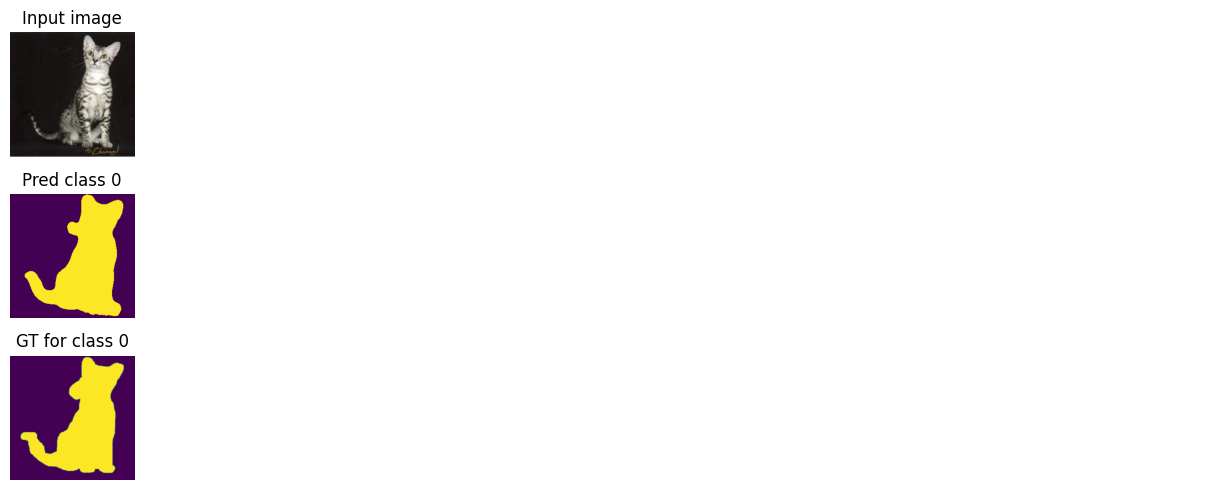

Train loss: 0.00741 | Time: 17m 35s | Val loss: 0.01390
Train_DICE_avg: 0.95891 | Train_Jaccard_avg: 0.92255 | Train_Sensitivity_avg: 0.97384 | Train_Specificity_avg: 0.95937 
Class 0 - Train_DICE: 0.95891 | Train_Jaccard: 0.92255 | Train_Sensitivity: 0.97384 | Train_Specificity: 0.95937 
Val_DICE_avg: 0.93950 | Val_Jaccard_avg: 0.89133 | Val_Sensitivity_avg: 0.96618 | Val_Specificity_avg: 0.94174 
Class 0 - Val_DICE: 0.93950 | Val_Jaccard: 0.89133 | Val_Sensitivity: 0.96618 | Val_Specificity: 0.94174 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00729 | Time: 17m 58s | Val loss: 0.01402
Train_DICE_avg: 0.96019 | Train_Jaccard_avg: 0.92413 | Train_Sensitivity_avg: 0.97432 | Train_Specificity_avg: 0.96074 
Class 0 - Train_DICE: 0.96019 | Train_Jaccard: 0.92413 | Train_Sensitivity: 0.97432 | Train_Specificity: 0.96074 
Val_DICE_avg: 0.93945 | Val_Jaccard_avg: 0.89131 | Val_Sensitivity_avg: 0.96434 | Val_Specificity_avg: 0.94398 
Class 0 - Val_DICE: 0.93945 | Val_Jaccard: 0.89131 | Val_Sensitivity: 0.96434 | Val_Specificity: 0.94398 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00720 | Time: 18m 21s | Val loss: 0.01401
Train_DICE_avg: 0.96002 | Train_Jaccard_avg: 0.92461 | Train_Sensitivity_avg: 0.97405 | Train_Specificity_avg: 0.96162 
Class 0 - Train_DICE: 0.96002 | Train_Jaccard: 0.92461 | Train_Sensitivity: 0.97405 | Train_Specificity: 0.96162 
Val_DICE_avg: 0.93984 | Val_Jaccard_avg: 0.89198 | Val_Sensitivity_avg: 0.96532 | Val_Specificity_avg: 0.94322 
Class 0 - Val_DICE: 0.93984 | Val_Jaccard: 0.89198 | Val_Sensitivity: 0.96532 | Val_Specificity: 0.94322 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00698 | Time: 18m 44s | Val loss: 0.01372
Train_DICE_avg: 0.96048 | Train_Jaccard_avg: 0.92541 | Train_Sensitivity_avg: 0.97493 | Train_Specificity_avg: 0.96154 
Class 0 - Train_DICE: 0.96048 | Train_Jaccard: 0.92541 | Train_Sensitivity: 0.97493 | Train_Specificity: 0.96154 
Val_DICE_avg: 0.94216 | Val_Jaccard_avg: 0.89600 | Val_Sensitivity_avg: 0.96126 | Val_Specificity_avg: 0.94869 
Class 0 - Val_DICE: 0.94216 | Val_Jaccard: 0.89600 | Val_Sensitivity: 0.96126 | Val_Specificity: 0.94869 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00706 | Time: 19m 7s | Val loss: 0.01402
Train_DICE_avg: 0.96116 | Train_Jaccard_avg: 0.92589 | Train_Sensitivity_avg: 0.97579 | Train_Specificity_avg: 0.96107 
Class 0 - Train_DICE: 0.96116 | Train_Jaccard: 0.92589 | Train_Sensitivity: 0.97579 | Train_Specificity: 0.96107 
Val_DICE_avg: 0.94021 | Val_Jaccard_avg: 0.89287 | Val_Sensitivity_avg: 0.96347 | Val_Specificity_avg: 0.94550 
Class 0 - Val_DICE: 0.94021 | Val_Jaccard: 0.89287 | Val_Sensitivity: 0.96347 | Val_Specificity: 0.94550 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

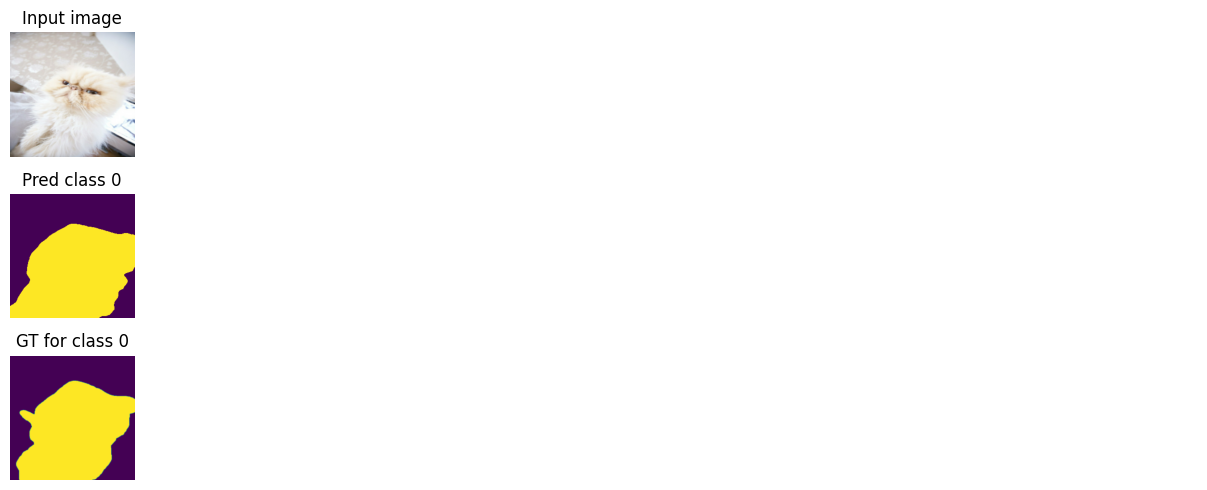

Train loss: 0.00694 | Time: 19m 31s | Val loss: 0.01389
Train_DICE_avg: 0.95976 | Train_Jaccard_avg: 0.92487 | Train_Sensitivity_avg: 0.97337 | Train_Specificity_avg: 0.96239 
Class 0 - Train_DICE: 0.95976 | Train_Jaccard: 0.92487 | Train_Sensitivity: 0.97337 | Train_Specificity: 0.96239 
Val_DICE_avg: 0.94014 | Val_Jaccard_avg: 0.89250 | Val_Sensitivity_avg: 0.96277 | Val_Specificity_avg: 0.94627 
Class 0 - Val_DICE: 0.94014 | Val_Jaccard: 0.89250 | Val_Sensitivity: 0.96277 | Val_Specificity: 0.94627 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00698 | Time: 19m 54s | Val loss: 0.01394
Train_DICE_avg: 0.96150 | Train_Jaccard_avg: 0.92651 | Train_Sensitivity_avg: 0.97582 | Train_Specificity_avg: 0.96256 
Class 0 - Train_DICE: 0.96150 | Train_Jaccard: 0.92651 | Train_Sensitivity: 0.97582 | Train_Specificity: 0.96256 
Val_DICE_avg: 0.93965 | Val_Jaccard_avg: 0.89165 | Val_Sensitivity_avg: 0.96669 | Val_Specificity_avg: 0.94291 
Class 0 - Val_DICE: 0.93965 | Val_Jaccard: 0.89165 | Val_Sensitivity: 0.96669 | Val_Specificity: 0.94291 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00692 | Time: 20m 17s | Val loss: 0.01396
Train_DICE_avg: 0.95967 | Train_Jaccard_avg: 0.92480 | Train_Sensitivity_avg: 0.97405 | Train_Specificity_avg: 0.96195 
Class 0 - Train_DICE: 0.95967 | Train_Jaccard: 0.92480 | Train_Sensitivity: 0.97405 | Train_Specificity: 0.96195 
Val_DICE_avg: 0.93900 | Val_Jaccard_avg: 0.89052 | Val_Sensitivity_avg: 0.96560 | Val_Specificity_avg: 0.94386 
Class 0 - Val_DICE: 0.93900 | Val_Jaccard: 0.89052 | Val_Sensitivity: 0.96560 | Val_Specificity: 0.94386 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00688 | Time: 20m 40s | Val loss: 0.01431
Train_DICE_avg: 0.96042 | Train_Jaccard_avg: 0.92609 | Train_Sensitivity_avg: 0.97413 | Train_Specificity_avg: 0.96361 
Class 0 - Train_DICE: 0.96042 | Train_Jaccard: 0.92609 | Train_Sensitivity: 0.97413 | Train_Specificity: 0.96361 
Val_DICE_avg: 0.93761 | Val_Jaccard_avg: 0.88821 | Val_Sensitivity_avg: 0.96723 | Val_Specificity_avg: 0.94034 
Class 0 - Val_DICE: 0.93761 | Val_Jaccard: 0.88821 | Val_Sensitivity: 0.96723 | Val_Specificity: 0.94034 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00680 | Time: 21m 2s | Val loss: 0.01408
Train_DICE_avg: 0.96233 | Train_Jaccard_avg: 0.92807 | Train_Sensitivity_avg: 0.97662 | Train_Specificity_avg: 0.96288 
Class 0 - Train_DICE: 0.96233 | Train_Jaccard: 0.92807 | Train_Sensitivity: 0.97662 | Train_Specificity: 0.96288 
Val_DICE_avg: 0.94007 | Val_Jaccard_avg: 0.89248 | Val_Sensitivity_avg: 0.96233 | Val_Specificity_avg: 0.94706 
Class 0 - Val_DICE: 0.94007 | Val_Jaccard: 0.89248 | Val_Sensitivity: 0.96233 | Val_Specificity: 0.94706 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

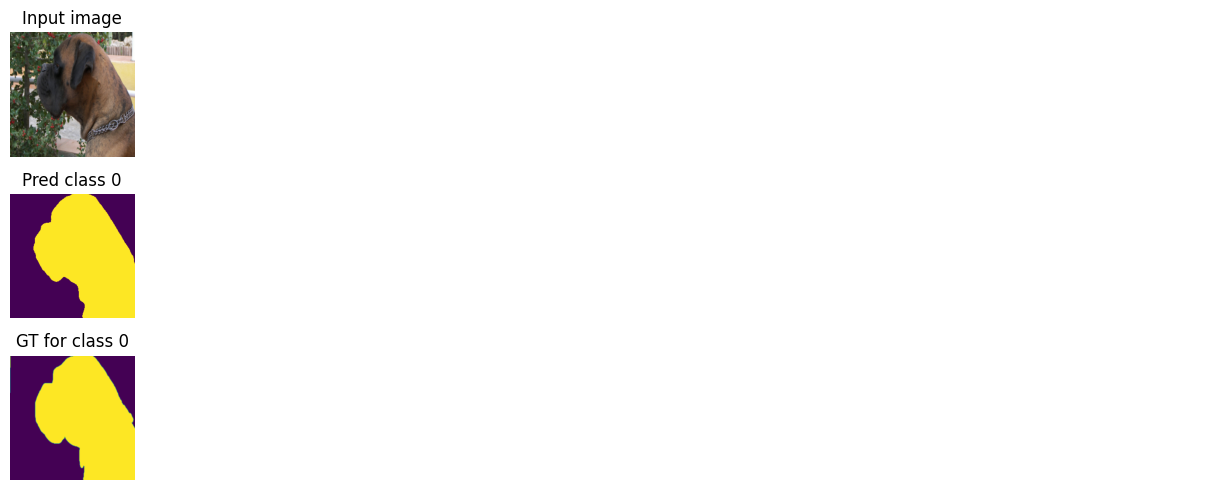

Train loss: 0.00672 | Time: 21m 26s | Val loss: 0.01398
Train_DICE_avg: 0.96265 | Train_Jaccard_avg: 0.92859 | Train_Sensitivity_avg: 0.97589 | Train_Specificity_avg: 0.96346 
Class 0 - Train_DICE: 0.96265 | Train_Jaccard: 0.92859 | Train_Sensitivity: 0.97589 | Train_Specificity: 0.96346 
Val_DICE_avg: 0.93884 | Val_Jaccard_avg: 0.89026 | Val_Sensitivity_avg: 0.96469 | Val_Specificity_avg: 0.94456 
Class 0 - Val_DICE: 0.93884 | Val_Jaccard: 0.89026 | Val_Sensitivity: 0.96469 | Val_Specificity: 0.94456 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00685 | Time: 21m 49s | Val loss: 0.01394
Train_DICE_avg: 0.96198 | Train_Jaccard_avg: 0.92742 | Train_Sensitivity_avg: 0.97582 | Train_Specificity_avg: 0.96334 
Class 0 - Train_DICE: 0.96198 | Train_Jaccard: 0.92742 | Train_Sensitivity: 0.97582 | Train_Specificity: 0.96334 
Val_DICE_avg: 0.93893 | Val_Jaccard_avg: 0.89035 | Val_Sensitivity_avg: 0.96522 | Val_Specificity_avg: 0.94329 
Class 0 - Val_DICE: 0.93893 | Val_Jaccard: 0.89035 | Val_Sensitivity: 0.96522 | Val_Specificity: 0.94329 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00657 | Time: 22m 12s | Val loss: 0.01405
Train_DICE_avg: 0.96309 | Train_Jaccard_avg: 0.92938 | Train_Sensitivity_avg: 0.97709 | Train_Specificity_avg: 0.96397 
Class 0 - Train_DICE: 0.96309 | Train_Jaccard: 0.92938 | Train_Sensitivity: 0.97709 | Train_Specificity: 0.96397 
Val_DICE_avg: 0.93919 | Val_Jaccard_avg: 0.89084 | Val_Sensitivity_avg: 0.96498 | Val_Specificity_avg: 0.94405 
Class 0 - Val_DICE: 0.93919 | Val_Jaccard: 0.89084 | Val_Sensitivity: 0.96498 | Val_Specificity: 0.94405 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00666 | Time: 22m 35s | Val loss: 0.01445
Train_DICE_avg: 0.96213 | Train_Jaccard_avg: 0.92841 | Train_Sensitivity_avg: 0.97565 | Train_Specificity_avg: 0.96380 
Class 0 - Train_DICE: 0.96213 | Train_Jaccard: 0.92841 | Train_Sensitivity: 0.97565 | Train_Specificity: 0.96380 
Val_DICE_avg: 0.93810 | Val_Jaccard_avg: 0.88910 | Val_Sensitivity_avg: 0.96540 | Val_Specificity_avg: 0.94370 
Class 0 - Val_DICE: 0.93810 | Val_Jaccard: 0.88910 | Val_Sensitivity: 0.96540 | Val_Specificity: 0.94370 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00655 | Time: 22m 58s | Val loss: 0.01451
Train_DICE_avg: 0.96346 | Train_Jaccard_avg: 0.93003 | Train_Sensitivity_avg: 0.97660 | Train_Specificity_avg: 0.96439 
Class 0 - Train_DICE: 0.96346 | Train_Jaccard: 0.93003 | Train_Sensitivity: 0.97660 | Train_Specificity: 0.96439 
Val_DICE_avg: 0.93824 | Val_Jaccard_avg: 0.88923 | Val_Sensitivity_avg: 0.96578 | Val_Specificity_avg: 0.94309 
Class 0 - Val_DICE: 0.93824 | Val_Jaccard: 0.88923 | Val_Sensitivity: 0.96578 | Val_Specificity: 0.94309 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

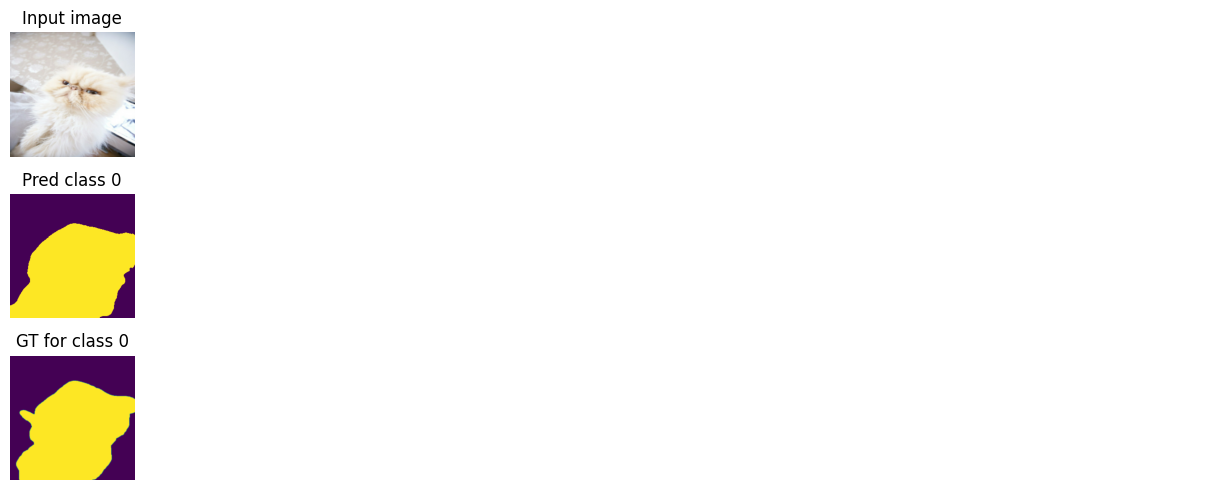

Train loss: 0.00661 | Time: 23m 21s | Val loss: 0.01438
Train_DICE_avg: 0.96209 | Train_Jaccard_avg: 0.92834 | Train_Sensitivity_avg: 0.97584 | Train_Specificity_avg: 0.96367 
Class 0 - Train_DICE: 0.96209 | Train_Jaccard: 0.92834 | Train_Sensitivity: 0.97584 | Train_Specificity: 0.96367 
Val_DICE_avg: 0.93775 | Val_Jaccard_avg: 0.88846 | Val_Sensitivity_avg: 0.96591 | Val_Specificity_avg: 0.94255 
Class 0 - Val_DICE: 0.93775 | Val_Jaccard: 0.88846 | Val_Sensitivity: 0.96591 | Val_Specificity: 0.94255 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]



Global Performance Metrics:
Loss mean: 0.01297, std: 0.00330
Dice Coefficient mean: 0.93401, std: 0.05098
Jaccard Index mean: 0.88002, std: 0.08037
Sensitivity mean: 0.97928, std: 0.03945
Specificity mean: 0.92439, std: 0.06269

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93401, std: 0.05098
Jaccard mean: 0.88002, std: 0.08037
Sensitivity mean: 0.97928, std: 0.03945
Specificity mean: 0.92439, std: 0.06269


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-ResUNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.74 GB
GPU Memory - Reserved: 1.28 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

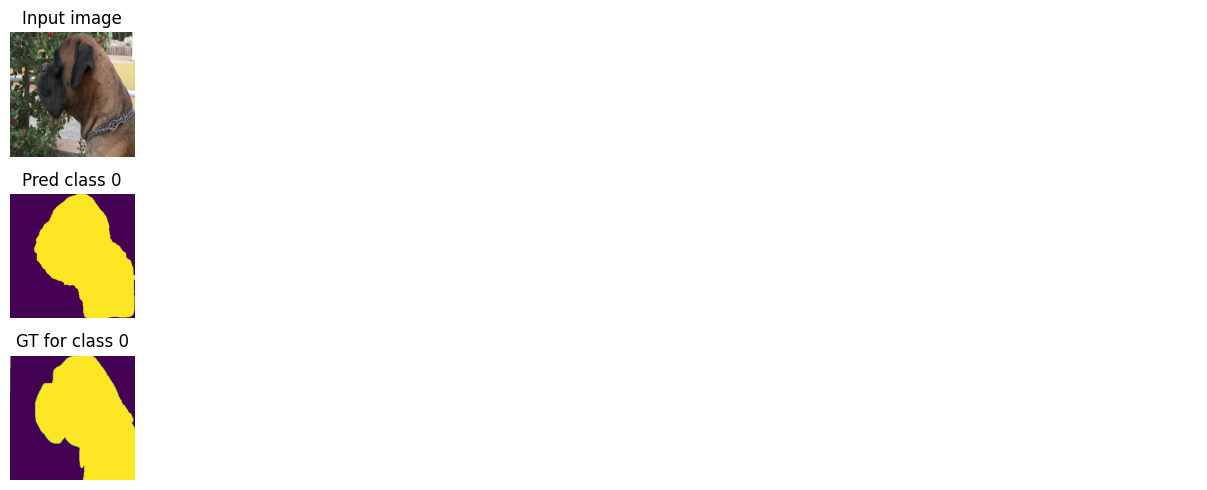

Train loss: 0.42509 | Time: 0m 22s | Val loss: 0.38202
Train_DICE_avg: 0.79215 | Train_Jaccard_avg: 0.67613 | Train_Sensitivity_avg: 0.75940 | Train_Specificity_avg: 0.87258 
Class 0 - Train_DICE: 0.79215 | Train_Jaccard: 0.67613 | Train_Sensitivity: 0.75940 | Train_Specificity: 0.87258 
Val_DICE_avg: 0.87025 | Val_Jaccard_avg: 0.77978 | Val_Sensitivity_avg: 0.91951 | Val_Specificity_avg: 0.87740 
Class 0 - Val_DICE: 0.87025 | Val_Jaccard: 0.77978 | Val_Sensitivity: 0.91951 | Val_Specificity: 0.87740 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.31384 | Time: 0m 45s | Val loss: 0.28502
Train_DICE_avg: 0.88679 | Train_Jaccard_avg: 0.80645 | Train_Sensitivity_avg: 0.84607 | Train_Specificity_avg: 0.94779 
Class 0 - Train_DICE: 0.88679 | Train_Jaccard: 0.80645 | Train_Sensitivity: 0.84607 | Train_Specificity: 0.94779 
Val_DICE_avg: 0.91537 | Val_Jaccard_avg: 0.85197 | Val_Sensitivity_avg: 0.90313 | Val_Specificity_avg: 0.94750 
Class 0 - Val_DICE: 0.91537 | Val_Jaccard: 0.85197 | Val_Sensitivity: 0.90313 | Val_Specificity: 0.94750 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.29475 | Time: 1m 7s | Val loss: 0.28071
Train_DICE_avg: 0.89918 | Train_Jaccard_avg: 0.82533 | Train_Sensitivity_avg: 0.85996 | Train_Specificity_avg: 0.95513 
Class 0 - Train_DICE: 0.89918 | Train_Jaccard: 0.82533 | Train_Sensitivity: 0.85996 | Train_Specificity: 0.95513 
Val_DICE_avg: 0.92196 | Val_Jaccard_avg: 0.86267 | Val_Sensitivity_avg: 0.89795 | Val_Specificity_avg: 0.96268 
Class 0 - Val_DICE: 0.92196 | Val_Jaccard: 0.86267 | Val_Sensitivity: 0.89795 | Val_Specificity: 0.96268 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.28305 | Time: 1m 30s | Val loss: 0.27360
Train_DICE_avg: 0.90735 | Train_Jaccard_avg: 0.83853 | Train_Sensitivity_avg: 0.87095 | Train_Specificity_avg: 0.95898 
Class 0 - Train_DICE: 0.90735 | Train_Jaccard: 0.83853 | Train_Sensitivity: 0.87095 | Train_Specificity: 0.95898 
Val_DICE_avg: 0.92394 | Val_Jaccard_avg: 0.86598 | Val_Sensitivity_avg: 0.89735 | Val_Specificity_avg: 0.96776 
Class 0 - Val_DICE: 0.92394 | Val_Jaccard: 0.86598 | Val_Sensitivity: 0.89735 | Val_Specificity: 0.96776 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.27340 | Time: 1m 52s | Val loss: 0.26580
Train_DICE_avg: 0.91112 | Train_Jaccard_avg: 0.84452 | Train_Sensitivity_avg: 0.87449 | Train_Specificity_avg: 0.96141 
Class 0 - Train_DICE: 0.91112 | Train_Jaccard: 0.84452 | Train_Sensitivity: 0.87449 | Train_Specificity: 0.96141 
Val_DICE_avg: 0.92195 | Val_Jaccard_avg: 0.86305 | Val_Sensitivity_avg: 0.88869 | Val_Specificity_avg: 0.97293 
Class 0 - Val_DICE: 0.92195 | Val_Jaccard: 0.86305 | Val_Sensitivity: 0.88869 | Val_Specificity: 0.97293 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

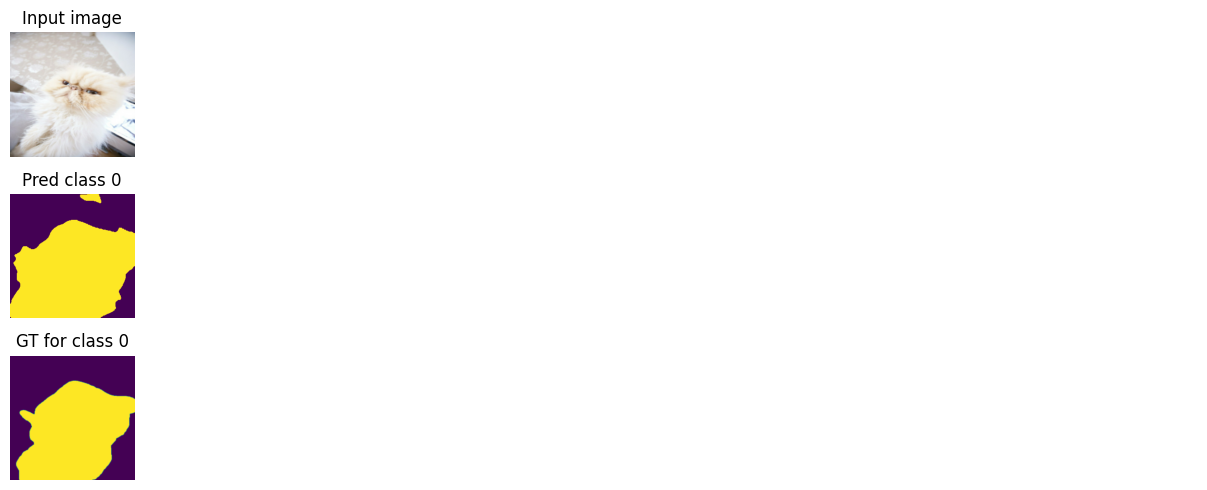

Train loss: 0.26402 | Time: 2m 15s | Val loss: 0.25873
Train_DICE_avg: 0.91597 | Train_Jaccard_avg: 0.85230 | Train_Sensitivity_avg: 0.88183 | Train_Specificity_avg: 0.96422 
Class 0 - Train_DICE: 0.91597 | Train_Jaccard: 0.85230 | Train_Sensitivity: 0.88183 | Train_Specificity: 0.96422 
Val_DICE_avg: 0.92798 | Val_Jaccard_avg: 0.87227 | Val_Sensitivity_avg: 0.90232 | Val_Specificity_avg: 0.97147 
Class 0 - Val_DICE: 0.92798 | Val_Jaccard: 0.87227 | Val_Sensitivity: 0.90232 | Val_Specificity: 0.97147 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.25589 | Time: 2m 37s | Val loss: 0.24787
Train_DICE_avg: 0.92038 | Train_Jaccard_avg: 0.85870 | Train_Sensitivity_avg: 0.88805 | Train_Specificity_avg: 0.96368 
Class 0 - Train_DICE: 0.92038 | Train_Jaccard: 0.85870 | Train_Sensitivity: 0.88805 | Train_Specificity: 0.96368 
Val_DICE_avg: 0.92926 | Val_Jaccard_avg: 0.87496 | Val_Sensitivity_avg: 0.90662 | Val_Specificity_avg: 0.97008 
Class 0 - Val_DICE: 0.92926 | Val_Jaccard: 0.87496 | Val_Sensitivity: 0.90662 | Val_Specificity: 0.97008 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.24775 | Time: 3m 0s | Val loss: 0.24001
Train_DICE_avg: 0.92300 | Train_Jaccard_avg: 0.86315 | Train_Sensitivity_avg: 0.89221 | Train_Specificity_avg: 0.96669 
Class 0 - Train_DICE: 0.92300 | Train_Jaccard: 0.86315 | Train_Sensitivity: 0.89221 | Train_Specificity: 0.96669 
Val_DICE_avg: 0.93371 | Val_Jaccard_avg: 0.88239 | Val_Sensitivity_avg: 0.92120 | Val_Specificity_avg: 0.96569 
Class 0 - Val_DICE: 0.93371 | Val_Jaccard: 0.88239 | Val_Sensitivity: 0.92120 | Val_Specificity: 0.96569 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.24048 | Time: 3m 22s | Val loss: 0.22885
Train_DICE_avg: 0.92488 | Train_Jaccard_avg: 0.86621 | Train_Sensitivity_avg: 0.89588 | Train_Specificity_avg: 0.96614 
Class 0 - Train_DICE: 0.92488 | Train_Jaccard: 0.86621 | Train_Sensitivity: 0.89588 | Train_Specificity: 0.96614 
Val_DICE_avg: 0.93317 | Val_Jaccard_avg: 0.88149 | Val_Sensitivity_avg: 0.91337 | Val_Specificity_avg: 0.97057 
Class 0 - Val_DICE: 0.93317 | Val_Jaccard: 0.88149 | Val_Sensitivity: 0.91337 | Val_Specificity: 0.97057 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23299 | Time: 3m 45s | Val loss: 0.22812
Train_DICE_avg: 0.92731 | Train_Jaccard_avg: 0.87036 | Train_Sensitivity_avg: 0.89986 | Train_Specificity_avg: 0.96677 
Class 0 - Train_DICE: 0.92731 | Train_Jaccard: 0.87036 | Train_Sensitivity: 0.89986 | Train_Specificity: 0.96677 
Val_DICE_avg: 0.93148 | Val_Jaccard_avg: 0.87846 | Val_Sensitivity_avg: 0.90942 | Val_Specificity_avg: 0.97248 
Class 0 - Val_DICE: 0.93148 | Val_Jaccard: 0.87846 | Val_Sensitivity: 0.90942 | Val_Specificity: 0.97248 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

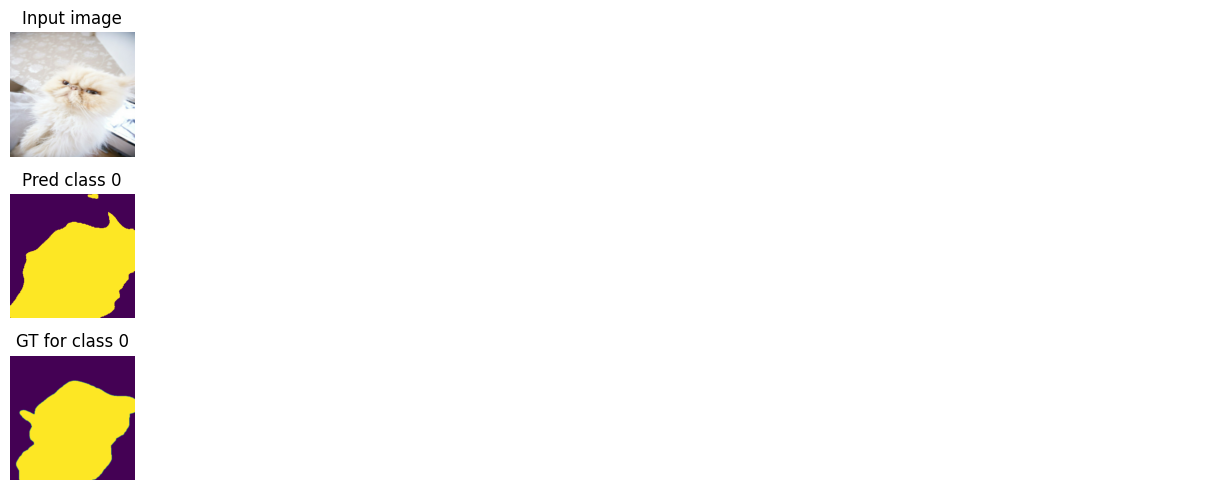

Train loss: 0.22698 | Time: 4m 8s | Val loss: 0.22065
Train_DICE_avg: 0.92768 | Train_Jaccard_avg: 0.87103 | Train_Sensitivity_avg: 0.90256 | Train_Specificity_avg: 0.96402 
Class 0 - Train_DICE: 0.92768 | Train_Jaccard: 0.87103 | Train_Sensitivity: 0.90256 | Train_Specificity: 0.96402 
Val_DICE_avg: 0.93223 | Val_Jaccard_avg: 0.87994 | Val_Sensitivity_avg: 0.91591 | Val_Specificity_avg: 0.97032 
Class 0 - Val_DICE: 0.93223 | Val_Jaccard: 0.87994 | Val_Sensitivity: 0.91591 | Val_Specificity: 0.97032 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21866 | Time: 4m 31s | Val loss: 0.21493
Train_DICE_avg: 0.93142 | Train_Jaccard_avg: 0.87695 | Train_Sensitivity_avg: 0.90824 | Train_Specificity_avg: 0.96638 
Class 0 - Train_DICE: 0.93142 | Train_Jaccard: 0.87695 | Train_Sensitivity: 0.90824 | Train_Specificity: 0.96638 
Val_DICE_avg: 0.93504 | Val_Jaccard_avg: 0.88454 | Val_Sensitivity_avg: 0.92525 | Val_Specificity_avg: 0.96566 
Class 0 - Val_DICE: 0.93504 | Val_Jaccard: 0.88454 | Val_Sensitivity: 0.92525 | Val_Specificity: 0.96566 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21188 | Time: 4m 54s | Val loss: 0.20878
Train_DICE_avg: 0.93269 | Train_Jaccard_avg: 0.87885 | Train_Sensitivity_avg: 0.91015 | Train_Specificity_avg: 0.96755 
Class 0 - Train_DICE: 0.93269 | Train_Jaccard: 0.87885 | Train_Sensitivity: 0.91015 | Train_Specificity: 0.96755 
Val_DICE_avg: 0.93343 | Val_Jaccard_avg: 0.88223 | Val_Sensitivity_avg: 0.92061 | Val_Specificity_avg: 0.96888 
Class 0 - Val_DICE: 0.93343 | Val_Jaccard: 0.88223 | Val_Sensitivity: 0.92061 | Val_Specificity: 0.96888 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20524 | Time: 5m 17s | Val loss: 0.19547
Train_DICE_avg: 0.93379 | Train_Jaccard_avg: 0.88062 | Train_Sensitivity_avg: 0.91298 | Train_Specificity_avg: 0.96593 
Class 0 - Train_DICE: 0.93379 | Train_Jaccard: 0.88062 | Train_Sensitivity: 0.91298 | Train_Specificity: 0.96593 
Val_DICE_avg: 0.93760 | Val_Jaccard_avg: 0.88879 | Val_Sensitivity_avg: 0.92784 | Val_Specificity_avg: 0.96965 
Class 0 - Val_DICE: 0.93760 | Val_Jaccard: 0.88879 | Val_Sensitivity: 0.92784 | Val_Specificity: 0.96965 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19938 | Time: 5m 40s | Val loss: 0.18983
Train_DICE_avg: 0.93614 | Train_Jaccard_avg: 0.88496 | Train_Sensitivity_avg: 0.91792 | Train_Specificity_avg: 0.96775 
Class 0 - Train_DICE: 0.93614 | Train_Jaccard: 0.88496 | Train_Sensitivity: 0.91792 | Train_Specificity: 0.96775 
Val_DICE_avg: 0.93692 | Val_Jaccard_avg: 0.88820 | Val_Sensitivity_avg: 0.94482 | Val_Specificity_avg: 0.95549 
Class 0 - Val_DICE: 0.93692 | Val_Jaccard: 0.88820 | Val_Sensitivity: 0.94482 | Val_Specificity: 0.95549 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

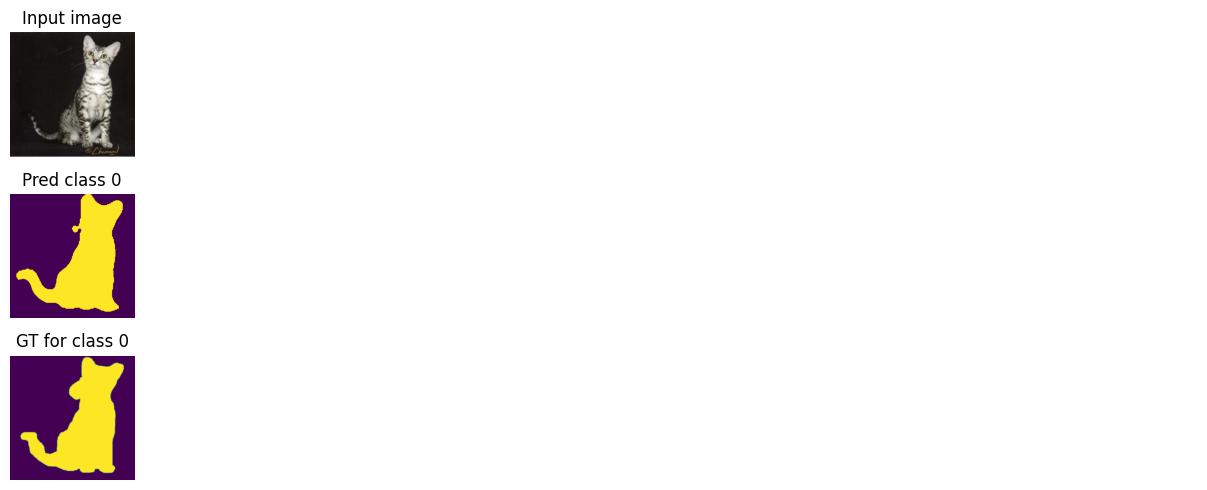

Train loss: 0.19264 | Time: 6m 3s | Val loss: 0.19977
Train_DICE_avg: 0.93775 | Train_Jaccard_avg: 0.88763 | Train_Sensitivity_avg: 0.92083 | Train_Specificity_avg: 0.96600 
Class 0 - Train_DICE: 0.93775 | Train_Jaccard: 0.88763 | Train_Sensitivity: 0.92083 | Train_Specificity: 0.96600 
Val_DICE_avg: 0.93120 | Val_Jaccard_avg: 0.87886 | Val_Sensitivity_avg: 0.91560 | Val_Specificity_avg: 0.97232 
Class 0 - Val_DICE: 0.93120 | Val_Jaccard: 0.87886 | Val_Sensitivity: 0.91560 | Val_Specificity: 0.97232 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18715 | Time: 6m 27s | Val loss: 0.18900
Train_DICE_avg: 0.93888 | Train_Jaccard_avg: 0.88919 | Train_Sensitivity_avg: 0.92402 | Train_Specificity_avg: 0.96587 
Class 0 - Train_DICE: 0.93888 | Train_Jaccard: 0.88919 | Train_Sensitivity: 0.92402 | Train_Specificity: 0.96587 
Val_DICE_avg: 0.93364 | Val_Jaccard_avg: 0.88186 | Val_Sensitivity_avg: 0.91932 | Val_Specificity_avg: 0.97039 
Class 0 - Val_DICE: 0.93364 | Val_Jaccard: 0.88186 | Val_Sensitivity: 0.91932 | Val_Specificity: 0.97039 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18138 | Time: 6m 50s | Val loss: 0.17617
Train_DICE_avg: 0.94057 | Train_Jaccard_avg: 0.89200 | Train_Sensitivity_avg: 0.92679 | Train_Specificity_avg: 0.96578 
Class 0 - Train_DICE: 0.94057 | Train_Jaccard: 0.89200 | Train_Sensitivity: 0.92679 | Train_Specificity: 0.96578 
Val_DICE_avg: 0.93641 | Val_Jaccard_avg: 0.88764 | Val_Sensitivity_avg: 0.94230 | Val_Specificity_avg: 0.95860 
Class 0 - Val_DICE: 0.93641 | Val_Jaccard: 0.88764 | Val_Sensitivity: 0.94230 | Val_Specificity: 0.95860 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17562 | Time: 7m 13s | Val loss: 0.17125
Train_DICE_avg: 0.94191 | Train_Jaccard_avg: 0.89442 | Train_Sensitivity_avg: 0.93033 | Train_Specificity_avg: 0.96442 
Class 0 - Train_DICE: 0.94191 | Train_Jaccard: 0.89442 | Train_Sensitivity: 0.93033 | Train_Specificity: 0.96442 
Val_DICE_avg: 0.93644 | Val_Jaccard_avg: 0.88761 | Val_Sensitivity_avg: 0.94000 | Val_Specificity_avg: 0.95838 
Class 0 - Val_DICE: 0.93644 | Val_Jaccard: 0.88761 | Val_Sensitivity: 0.94000 | Val_Specificity: 0.95838 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17047 | Time: 7m 36s | Val loss: 0.17342
Train_DICE_avg: 0.94358 | Train_Jaccard_avg: 0.89716 | Train_Sensitivity_avg: 0.93755 | Train_Specificity_avg: 0.95968 
Class 0 - Train_DICE: 0.94358 | Train_Jaccard: 0.89716 | Train_Sensitivity: 0.93755 | Train_Specificity: 0.95968 
Val_DICE_avg: 0.93836 | Val_Jaccard_avg: 0.89176 | Val_Sensitivity_avg: 0.94738 | Val_Specificity_avg: 0.95634 
Class 0 - Val_DICE: 0.93836 | Val_Jaccard: 0.89176 | Val_Sensitivity: 0.94738 | Val_Specificity: 0.95634 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

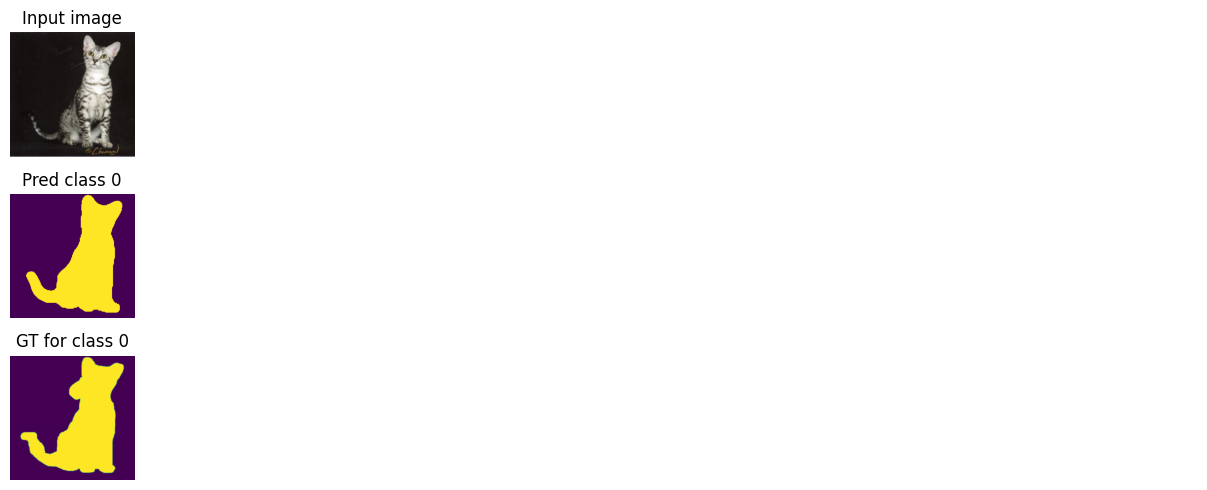

Train loss: 0.16619 | Time: 7m 59s | Val loss: 0.16556
Train_DICE_avg: 0.94351 | Train_Jaccard_avg: 0.89724 | Train_Sensitivity_avg: 0.94186 | Train_Specificity_avg: 0.95484 
Class 0 - Train_DICE: 0.94351 | Train_Jaccard: 0.89724 | Train_Sensitivity: 0.94186 | Train_Specificity: 0.95484 
Val_DICE_avg: 0.93891 | Val_Jaccard_avg: 0.89189 | Val_Sensitivity_avg: 0.94720 | Val_Specificity_avg: 0.95550 
Class 0 - Val_DICE: 0.93891 | Val_Jaccard: 0.89189 | Val_Sensitivity: 0.94720 | Val_Specificity: 0.95550 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16005 | Time: 8m 23s | Val loss: 0.15489
Train_DICE_avg: 0.94509 | Train_Jaccard_avg: 0.90015 | Train_Sensitivity_avg: 0.94285 | Train_Specificity_avg: 0.95814 
Class 0 - Train_DICE: 0.94509 | Train_Jaccard: 0.90015 | Train_Sensitivity: 0.94285 | Train_Specificity: 0.95814 
Val_DICE_avg: 0.94142 | Val_Jaccard_avg: 0.89576 | Val_Sensitivity_avg: 0.94586 | Val_Specificity_avg: 0.96033 
Class 0 - Val_DICE: 0.94142 | Val_Jaccard: 0.89576 | Val_Sensitivity: 0.94586 | Val_Specificity: 0.96033 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15406 | Time: 8m 46s | Val loss: 0.14903
Train_DICE_avg: 0.94653 | Train_Jaccard_avg: 0.90238 | Train_Sensitivity_avg: 0.94667 | Train_Specificity_avg: 0.95676 
Class 0 - Train_DICE: 0.94653 | Train_Jaccard: 0.90238 | Train_Sensitivity: 0.94667 | Train_Specificity: 0.95676 
Val_DICE_avg: 0.94039 | Val_Jaccard_avg: 0.89432 | Val_Sensitivity_avg: 0.94506 | Val_Specificity_avg: 0.96000 
Class 0 - Val_DICE: 0.94039 | Val_Jaccard: 0.89432 | Val_Sensitivity: 0.94506 | Val_Specificity: 0.96000 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14981 | Time: 9m 9s | Val loss: 0.15152
Train_DICE_avg: 0.94632 | Train_Jaccard_avg: 0.90227 | Train_Sensitivity_avg: 0.94573 | Train_Specificity_avg: 0.95827 
Class 0 - Train_DICE: 0.94632 | Train_Jaccard: 0.90227 | Train_Sensitivity: 0.94573 | Train_Specificity: 0.95827 
Val_DICE_avg: 0.93923 | Val_Jaccard_avg: 0.89238 | Val_Sensitivity_avg: 0.95033 | Val_Specificity_avg: 0.95458 
Class 0 - Val_DICE: 0.93923 | Val_Jaccard: 0.89238 | Val_Sensitivity: 0.95033 | Val_Specificity: 0.95458 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14532 | Time: 9m 32s | Val loss: 0.15302
Train_DICE_avg: 0.94677 | Train_Jaccard_avg: 0.90275 | Train_Sensitivity_avg: 0.94821 | Train_Specificity_avg: 0.95564 
Class 0 - Train_DICE: 0.94677 | Train_Jaccard: 0.90275 | Train_Sensitivity: 0.94821 | Train_Specificity: 0.95564 
Val_DICE_avg: 0.93879 | Val_Jaccard_avg: 0.89151 | Val_Sensitivity_avg: 0.94660 | Val_Specificity_avg: 0.95678 
Class 0 - Val_DICE: 0.93879 | Val_Jaccard: 0.89151 | Val_Sensitivity: 0.94660 | Val_Specificity: 0.95678 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

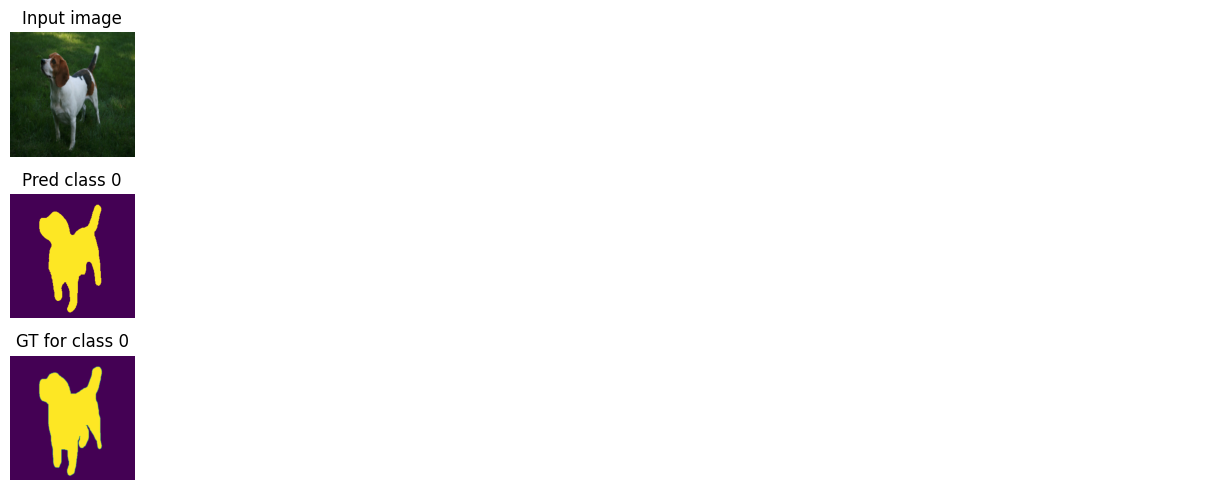

Train loss: 0.13926 | Time: 9m 55s | Val loss: 0.14393
Train_DICE_avg: 0.94873 | Train_Jaccard_avg: 0.90616 | Train_Sensitivity_avg: 0.95066 | Train_Specificity_avg: 0.95775 
Class 0 - Train_DICE: 0.94873 | Train_Jaccard: 0.90616 | Train_Sensitivity: 0.95066 | Train_Specificity: 0.95775 
Val_DICE_avg: 0.93849 | Val_Jaccard_avg: 0.89142 | Val_Sensitivity_avg: 0.95378 | Val_Specificity_avg: 0.95294 
Class 0 - Val_DICE: 0.93849 | Val_Jaccard: 0.89142 | Val_Sensitivity: 0.95378 | Val_Specificity: 0.95294 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13489 | Time: 10m 18s | Val loss: 0.13595
Train_DICE_avg: 0.94957 | Train_Jaccard_avg: 0.90761 | Train_Sensitivity_avg: 0.95200 | Train_Specificity_avg: 0.95775 
Class 0 - Train_DICE: 0.94957 | Train_Jaccard: 0.90761 | Train_Sensitivity: 0.95200 | Train_Specificity: 0.95775 
Val_DICE_avg: 0.93883 | Val_Jaccard_avg: 0.89181 | Val_Sensitivity_avg: 0.95586 | Val_Specificity_avg: 0.95131 
Class 0 - Val_DICE: 0.93883 | Val_Jaccard: 0.89181 | Val_Sensitivity: 0.95586 | Val_Specificity: 0.95131 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13074 | Time: 10m 41s | Val loss: 0.14333
Train_DICE_avg: 0.94975 | Train_Jaccard_avg: 0.90791 | Train_Sensitivity_avg: 0.95376 | Train_Specificity_avg: 0.95795 
Class 0 - Train_DICE: 0.94975 | Train_Jaccard: 0.90791 | Train_Sensitivity: 0.95376 | Train_Specificity: 0.95795 
Val_DICE_avg: 0.93640 | Val_Jaccard_avg: 0.88811 | Val_Sensitivity_avg: 0.95134 | Val_Specificity_avg: 0.95491 
Class 0 - Val_DICE: 0.93640 | Val_Jaccard: 0.88811 | Val_Sensitivity: 0.95134 | Val_Specificity: 0.95491 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12652 | Time: 11m 4s | Val loss: 0.13584
Train_DICE_avg: 0.95062 | Train_Jaccard_avg: 0.90932 | Train_Sensitivity_avg: 0.95373 | Train_Specificity_avg: 0.95865 
Class 0 - Train_DICE: 0.95062 | Train_Jaccard: 0.90932 | Train_Sensitivity: 0.95373 | Train_Specificity: 0.95865 
Val_DICE_avg: 0.94023 | Val_Jaccard_avg: 0.89333 | Val_Sensitivity_avg: 0.95190 | Val_Specificity_avg: 0.95468 
Class 0 - Val_DICE: 0.94023 | Val_Jaccard: 0.89333 | Val_Sensitivity: 0.95190 | Val_Specificity: 0.95468 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12327 | Time: 11m 27s | Val loss: 0.12412
Train_DICE_avg: 0.95033 | Train_Jaccard_avg: 0.90895 | Train_Sensitivity_avg: 0.95471 | Train_Specificity_avg: 0.95647 
Class 0 - Train_DICE: 0.95033 | Train_Jaccard: 0.90895 | Train_Sensitivity: 0.95471 | Train_Specificity: 0.95647 
Val_DICE_avg: 0.93770 | Val_Jaccard_avg: 0.88967 | Val_Sensitivity_avg: 0.95618 | Val_Specificity_avg: 0.95046 
Class 0 - Val_DICE: 0.93770 | Val_Jaccard: 0.88967 | Val_Sensitivity: 0.95618 | Val_Specificity: 0.95046 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

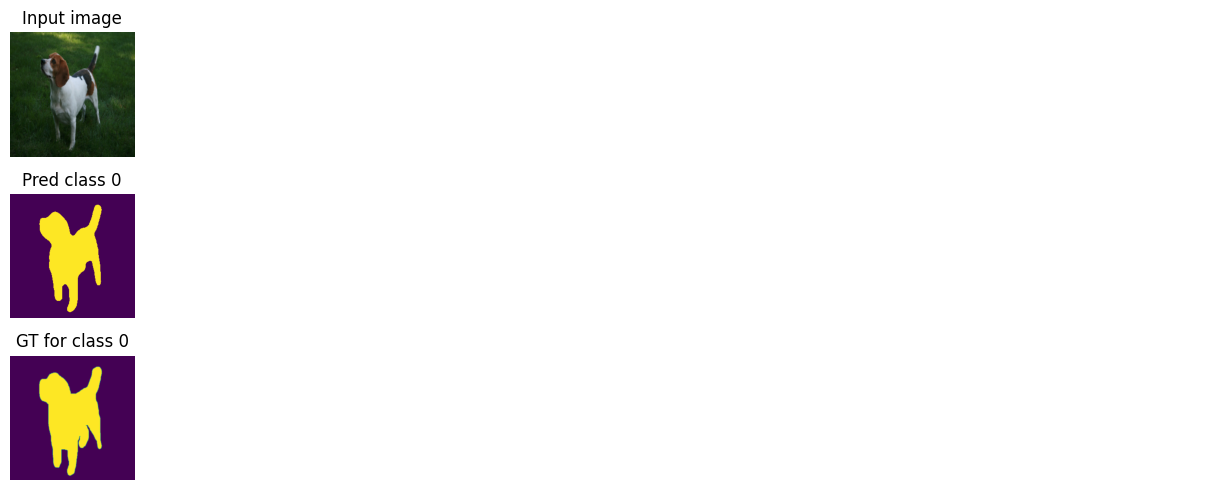

Train loss: 0.11985 | Time: 11m 51s | Val loss: 0.12672
Train_DICE_avg: 0.95009 | Train_Jaccard_avg: 0.90842 | Train_Sensitivity_avg: 0.95572 | Train_Specificity_avg: 0.95558 
Class 0 - Train_DICE: 0.95009 | Train_Jaccard: 0.90842 | Train_Sensitivity: 0.95572 | Train_Specificity: 0.95558 
Val_DICE_avg: 0.93937 | Val_Jaccard_avg: 0.89343 | Val_Sensitivity_avg: 0.95732 | Val_Specificity_avg: 0.95528 
Class 0 - Val_DICE: 0.93937 | Val_Jaccard: 0.89343 | Val_Sensitivity: 0.95732 | Val_Specificity: 0.95528 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11510 | Time: 12m 14s | Val loss: 0.12016
Train_DICE_avg: 0.95104 | Train_Jaccard_avg: 0.91015 | Train_Sensitivity_avg: 0.95707 | Train_Specificity_avg: 0.95803 
Class 0 - Train_DICE: 0.95104 | Train_Jaccard: 0.91015 | Train_Sensitivity: 0.95707 | Train_Specificity: 0.95803 
Val_DICE_avg: 0.93971 | Val_Jaccard_avg: 0.89282 | Val_Sensitivity_avg: 0.95478 | Val_Specificity_avg: 0.95559 
Class 0 - Val_DICE: 0.93971 | Val_Jaccard: 0.89282 | Val_Sensitivity: 0.95478 | Val_Specificity: 0.95559 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11151 | Time: 12m 37s | Val loss: 0.11781
Train_DICE_avg: 0.95171 | Train_Jaccard_avg: 0.91155 | Train_Sensitivity_avg: 0.95790 | Train_Specificity_avg: 0.95821 
Class 0 - Train_DICE: 0.95171 | Train_Jaccard: 0.91155 | Train_Sensitivity: 0.95790 | Train_Specificity: 0.95821 
Val_DICE_avg: 0.94057 | Val_Jaccard_avg: 0.89453 | Val_Sensitivity_avg: 0.95429 | Val_Specificity_avg: 0.95661 
Class 0 - Val_DICE: 0.94057 | Val_Jaccard: 0.89453 | Val_Sensitivity: 0.95429 | Val_Specificity: 0.95661 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10714 | Time: 13m 0s | Val loss: 0.11830
Train_DICE_avg: 0.95298 | Train_Jaccard_avg: 0.91349 | Train_Sensitivity_avg: 0.95999 | Train_Specificity_avg: 0.95733 
Class 0 - Train_DICE: 0.95298 | Train_Jaccard: 0.91349 | Train_Sensitivity: 0.95999 | Train_Specificity: 0.95733 
Val_DICE_avg: 0.93801 | Val_Jaccard_avg: 0.89086 | Val_Sensitivity_avg: 0.96024 | Val_Specificity_avg: 0.95015 
Class 0 - Val_DICE: 0.93801 | Val_Jaccard: 0.89086 | Val_Sensitivity: 0.96024 | Val_Specificity: 0.95015 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10385 | Time: 13m 23s | Val loss: 0.11485
Train_DICE_avg: 0.95382 | Train_Jaccard_avg: 0.91510 | Train_Sensitivity_avg: 0.96103 | Train_Specificity_avg: 0.96003 
Class 0 - Train_DICE: 0.95382 | Train_Jaccard: 0.91510 | Train_Sensitivity: 0.96103 | Train_Specificity: 0.96003 
Val_DICE_avg: 0.94071 | Val_Jaccard_avg: 0.89514 | Val_Sensitivity_avg: 0.95586 | Val_Specificity_avg: 0.95550 
Class 0 - Val_DICE: 0.94071 | Val_Jaccard: 0.89514 | Val_Sensitivity: 0.95586 | Val_Specificity: 0.95550 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

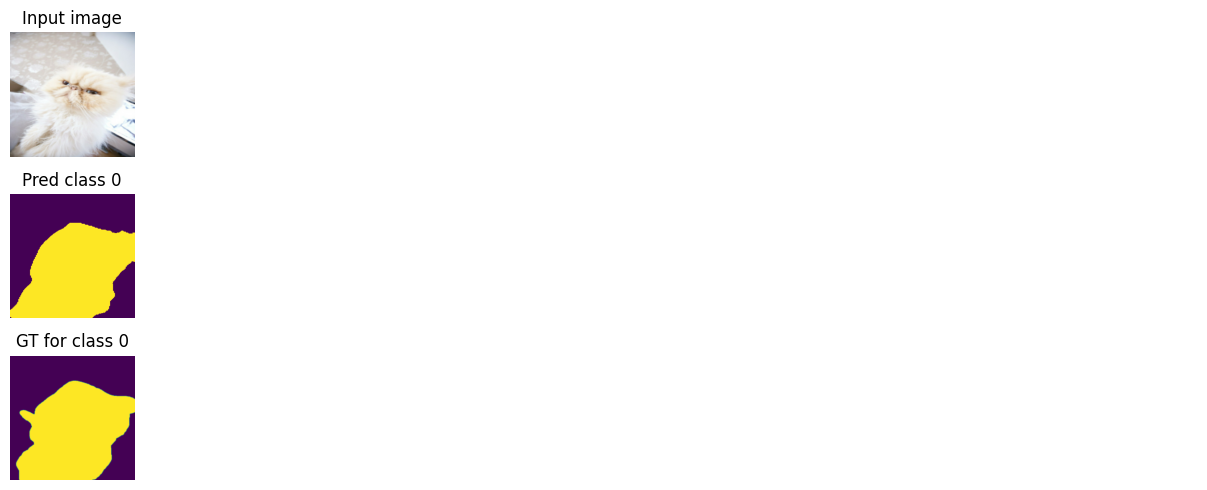

Train loss: 0.10041 | Time: 13m 46s | Val loss: 0.10871
Train_DICE_avg: 0.95457 | Train_Jaccard_avg: 0.91636 | Train_Sensitivity_avg: 0.96265 | Train_Specificity_avg: 0.95900 
Class 0 - Train_DICE: 0.95457 | Train_Jaccard: 0.91636 | Train_Sensitivity: 0.96265 | Train_Specificity: 0.95900 
Val_DICE_avg: 0.93983 | Val_Jaccard_avg: 0.89322 | Val_Sensitivity_avg: 0.95981 | Val_Specificity_avg: 0.95164 
Class 0 - Val_DICE: 0.93983 | Val_Jaccard: 0.89322 | Val_Sensitivity: 0.95981 | Val_Specificity: 0.95164 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09847 | Time: 14m 9s | Val loss: 0.10677
Train_DICE_avg: 0.95459 | Train_Jaccard_avg: 0.91641 | Train_Sensitivity_avg: 0.96216 | Train_Specificity_avg: 0.95961 
Class 0 - Train_DICE: 0.95459 | Train_Jaccard: 0.91641 | Train_Sensitivity: 0.96216 | Train_Specificity: 0.95961 
Val_DICE_avg: 0.94071 | Val_Jaccard_avg: 0.89460 | Val_Sensitivity_avg: 0.95526 | Val_Specificity_avg: 0.95528 
Class 0 - Val_DICE: 0.94071 | Val_Jaccard: 0.89460 | Val_Sensitivity: 0.95526 | Val_Specificity: 0.95528 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09614 | Time: 14m 32s | Val loss: 0.10437
Train_DICE_avg: 0.95495 | Train_Jaccard_avg: 0.91697 | Train_Sensitivity_avg: 0.96352 | Train_Specificity_avg: 0.96033 
Class 0 - Train_DICE: 0.95495 | Train_Jaccard: 0.91697 | Train_Sensitivity: 0.96352 | Train_Specificity: 0.96033 
Val_DICE_avg: 0.93975 | Val_Jaccard_avg: 0.89398 | Val_Sensitivity_avg: 0.96051 | Val_Specificity_avg: 0.95049 
Class 0 - Val_DICE: 0.93975 | Val_Jaccard: 0.89398 | Val_Sensitivity: 0.96051 | Val_Specificity: 0.95049 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09413 | Time: 14m 55s | Val loss: 0.10774
Train_DICE_avg: 0.95537 | Train_Jaccard_avg: 0.91784 | Train_Sensitivity_avg: 0.96342 | Train_Specificity_avg: 0.95972 
Class 0 - Train_DICE: 0.95537 | Train_Jaccard: 0.91784 | Train_Sensitivity: 0.96342 | Train_Specificity: 0.95972 
Val_DICE_avg: 0.94140 | Val_Jaccard_avg: 0.89580 | Val_Sensitivity_avg: 0.95330 | Val_Specificity_avg: 0.95776 
Class 0 - Val_DICE: 0.94140 | Val_Jaccard: 0.89580 | Val_Sensitivity: 0.95330 | Val_Specificity: 0.95776 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09170 | Time: 15m 18s | Val loss: 0.10172
Train_DICE_avg: 0.95607 | Train_Jaccard_avg: 0.91901 | Train_Sensitivity_avg: 0.96469 | Train_Specificity_avg: 0.96133 
Class 0 - Train_DICE: 0.95607 | Train_Jaccard: 0.91901 | Train_Sensitivity: 0.96469 | Train_Specificity: 0.96133 
Val_DICE_avg: 0.93987 | Val_Jaccard_avg: 0.89386 | Val_Sensitivity_avg: 0.96095 | Val_Specificity_avg: 0.95047 
Class 0 - Val_DICE: 0.93987 | Val_Jaccard: 0.89386 | Val_Sensitivity: 0.96095 | Val_Specificity: 0.95047 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

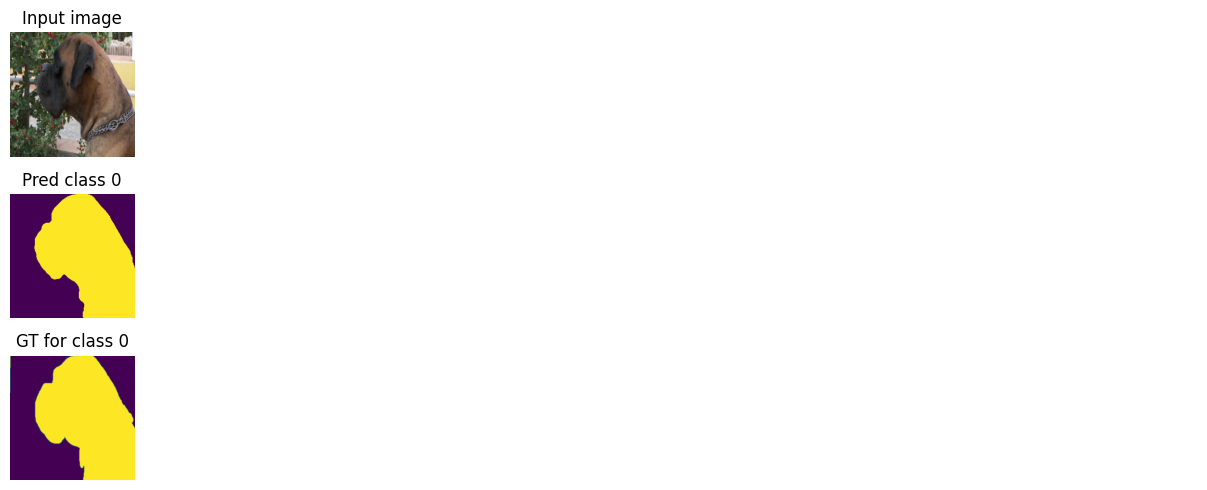

Train loss: 0.08968 | Time: 15m 41s | Val loss: 0.09997
Train_DICE_avg: 0.95657 | Train_Jaccard_avg: 0.92002 | Train_Sensitivity_avg: 0.96531 | Train_Specificity_avg: 0.96087 
Class 0 - Train_DICE: 0.95657 | Train_Jaccard: 0.92002 | Train_Sensitivity: 0.96531 | Train_Specificity: 0.96087 
Val_DICE_avg: 0.94111 | Val_Jaccard_avg: 0.89546 | Val_Sensitivity_avg: 0.95626 | Val_Specificity_avg: 0.95377 
Class 0 - Val_DICE: 0.94111 | Val_Jaccard: 0.89546 | Val_Sensitivity: 0.95626 | Val_Specificity: 0.95377 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08794 | Time: 16m 4s | Val loss: 0.10134
Train_DICE_avg: 0.95705 | Train_Jaccard_avg: 0.92076 | Train_Sensitivity_avg: 0.96609 | Train_Specificity_avg: 0.96173 
Class 0 - Train_DICE: 0.95705 | Train_Jaccard: 0.92076 | Train_Sensitivity: 0.96609 | Train_Specificity: 0.96173 
Val_DICE_avg: 0.94093 | Val_Jaccard_avg: 0.89519 | Val_Sensitivity_avg: 0.95392 | Val_Specificity_avg: 0.95504 
Class 0 - Val_DICE: 0.94093 | Val_Jaccard: 0.89519 | Val_Sensitivity: 0.95392 | Val_Specificity: 0.95504 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08658 | Time: 16m 27s | Val loss: 0.09804
Train_DICE_avg: 0.95727 | Train_Jaccard_avg: 0.92121 | Train_Sensitivity_avg: 0.96611 | Train_Specificity_avg: 0.96176 
Class 0 - Train_DICE: 0.95727 | Train_Jaccard: 0.92121 | Train_Sensitivity: 0.96611 | Train_Specificity: 0.96176 
Val_DICE_avg: 0.94168 | Val_Jaccard_avg: 0.89643 | Val_Sensitivity_avg: 0.95576 | Val_Specificity_avg: 0.95701 
Class 0 - Val_DICE: 0.94168 | Val_Jaccard: 0.89643 | Val_Sensitivity: 0.95576 | Val_Specificity: 0.95701 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08487 | Time: 16m 50s | Val loss: 0.09559
Train_DICE_avg: 0.95778 | Train_Jaccard_avg: 0.92223 | Train_Sensitivity_avg: 0.96703 | Train_Specificity_avg: 0.96208 
Class 0 - Train_DICE: 0.95778 | Train_Jaccard: 0.92223 | Train_Sensitivity: 0.96703 | Train_Specificity: 0.96208 
Val_DICE_avg: 0.94223 | Val_Jaccard_avg: 0.89750 | Val_Sensitivity_avg: 0.96121 | Val_Specificity_avg: 0.95240 
Class 0 - Val_DICE: 0.94223 | Val_Jaccard: 0.89750 | Val_Sensitivity: 0.96121 | Val_Specificity: 0.95240 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08345 | Time: 17m 14s | Val loss: 0.09589
Train_DICE_avg: 0.95837 | Train_Jaccard_avg: 0.92314 | Train_Sensitivity_avg: 0.96762 | Train_Specificity_avg: 0.96238 
Class 0 - Train_DICE: 0.95837 | Train_Jaccard: 0.92314 | Train_Sensitivity: 0.96762 | Train_Specificity: 0.96238 
Val_DICE_avg: 0.94319 | Val_Jaccard_avg: 0.89860 | Val_Sensitivity_avg: 0.95324 | Val_Specificity_avg: 0.95719 
Class 0 - Val_DICE: 0.94319 | Val_Jaccard: 0.89860 | Val_Sensitivity: 0.95324 | Val_Specificity: 0.95719 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

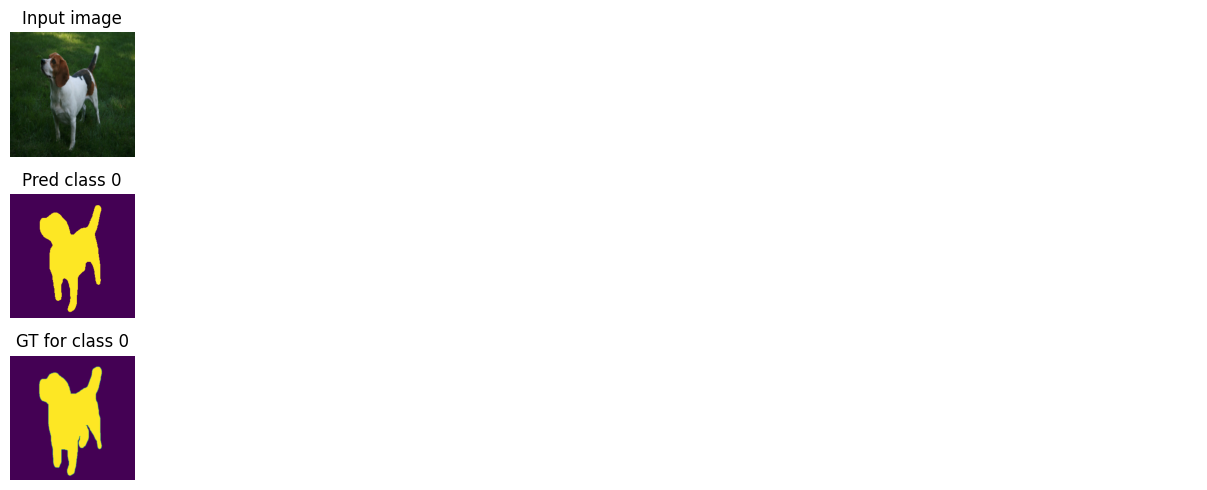

Train loss: 0.08194 | Time: 17m 37s | Val loss: 0.09491
Train_DICE_avg: 0.95879 | Train_Jaccard_avg: 0.92391 | Train_Sensitivity_avg: 0.96802 | Train_Specificity_avg: 0.96201 
Class 0 - Train_DICE: 0.95879 | Train_Jaccard: 0.92391 | Train_Sensitivity: 0.96802 | Train_Specificity: 0.96201 
Val_DICE_avg: 0.94317 | Val_Jaccard_avg: 0.89845 | Val_Sensitivity_avg: 0.95636 | Val_Specificity_avg: 0.95537 
Class 0 - Val_DICE: 0.94317 | Val_Jaccard: 0.89845 | Val_Sensitivity: 0.95636 | Val_Specificity: 0.95537 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08025 | Time: 18m 0s | Val loss: 0.09465
Train_DICE_avg: 0.95969 | Train_Jaccard_avg: 0.92551 | Train_Sensitivity_avg: 0.96925 | Train_Specificity_avg: 0.96314 
Class 0 - Train_DICE: 0.95969 | Train_Jaccard: 0.92551 | Train_Sensitivity: 0.96925 | Train_Specificity: 0.96314 
Val_DICE_avg: 0.94268 | Val_Jaccard_avg: 0.89764 | Val_Sensitivity_avg: 0.95706 | Val_Specificity_avg: 0.95463 
Class 0 - Val_DICE: 0.94268 | Val_Jaccard: 0.89764 | Val_Sensitivity: 0.95706 | Val_Specificity: 0.95463 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07953 | Time: 18m 23s | Val loss: 0.09350
Train_DICE_avg: 0.95967 | Train_Jaccard_avg: 0.92550 | Train_Sensitivity_avg: 0.96942 | Train_Specificity_avg: 0.96304 
Class 0 - Train_DICE: 0.95967 | Train_Jaccard: 0.92550 | Train_Sensitivity: 0.96942 | Train_Specificity: 0.96304 
Val_DICE_avg: 0.94255 | Val_Jaccard_avg: 0.89738 | Val_Sensitivity_avg: 0.95783 | Val_Specificity_avg: 0.95330 
Class 0 - Val_DICE: 0.94255 | Val_Jaccard: 0.89738 | Val_Sensitivity: 0.95783 | Val_Specificity: 0.95330 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07836 | Time: 18m 46s | Val loss: 0.09291
Train_DICE_avg: 0.95988 | Train_Jaccard_avg: 0.92581 | Train_Sensitivity_avg: 0.96975 | Train_Specificity_avg: 0.96287 
Class 0 - Train_DICE: 0.95988 | Train_Jaccard: 0.92581 | Train_Sensitivity: 0.96975 | Train_Specificity: 0.96287 
Val_DICE_avg: 0.94259 | Val_Jaccard_avg: 0.89758 | Val_Sensitivity_avg: 0.95638 | Val_Specificity_avg: 0.95383 
Class 0 - Val_DICE: 0.94259 | Val_Jaccard: 0.89758 | Val_Sensitivity: 0.95638 | Val_Specificity: 0.95383 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07819 | Time: 19m 9s | Val loss: 0.09402
Train_DICE_avg: 0.95942 | Train_Jaccard_avg: 0.92506 | Train_Sensitivity_avg: 0.96952 | Train_Specificity_avg: 0.96338 
Class 0 - Train_DICE: 0.95942 | Train_Jaccard: 0.92506 | Train_Sensitivity: 0.96952 | Train_Specificity: 0.96338 
Val_DICE_avg: 0.94287 | Val_Jaccard_avg: 0.89803 | Val_Sensitivity_avg: 0.95274 | Val_Specificity_avg: 0.95643 
Class 0 - Val_DICE: 0.94287 | Val_Jaccard: 0.89803 | Val_Sensitivity: 0.95274 | Val_Specificity: 0.95643 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

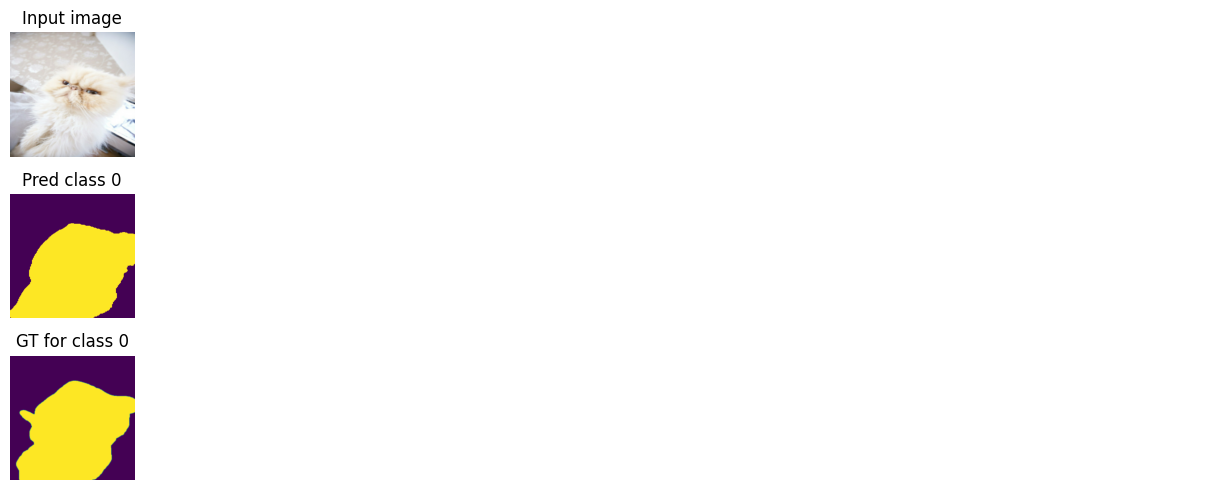

Train loss: 0.07663 | Time: 19m 32s | Val loss: 0.09389
Train_DICE_avg: 0.96025 | Train_Jaccard_avg: 0.92675 | Train_Sensitivity_avg: 0.97068 | Train_Specificity_avg: 0.96320 
Class 0 - Train_DICE: 0.96025 | Train_Jaccard: 0.92675 | Train_Sensitivity: 0.97068 | Train_Specificity: 0.96320 
Val_DICE_avg: 0.94138 | Val_Jaccard_avg: 0.89576 | Val_Sensitivity_avg: 0.95392 | Val_Specificity_avg: 0.95380 
Class 0 - Val_DICE: 0.94138 | Val_Jaccard: 0.89576 | Val_Sensitivity: 0.95392 | Val_Specificity: 0.95380 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07646 | Time: 19m 55s | Val loss: 0.09294
Train_DICE_avg: 0.95982 | Train_Jaccard_avg: 0.92588 | Train_Sensitivity_avg: 0.96994 | Train_Specificity_avg: 0.96335 
Class 0 - Train_DICE: 0.95982 | Train_Jaccard: 0.92588 | Train_Sensitivity: 0.96994 | Train_Specificity: 0.96335 
Val_DICE_avg: 0.94232 | Val_Jaccard_avg: 0.89739 | Val_Sensitivity_avg: 0.95390 | Val_Specificity_avg: 0.95544 
Class 0 - Val_DICE: 0.94232 | Val_Jaccard: 0.89739 | Val_Sensitivity: 0.95390 | Val_Specificity: 0.95544 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07519 | Time: 20m 18s | Val loss: 0.09221
Train_DICE_avg: 0.96068 | Train_Jaccard_avg: 0.92731 | Train_Sensitivity_avg: 0.97093 | Train_Specificity_avg: 0.96257 
Class 0 - Train_DICE: 0.96068 | Train_Jaccard: 0.92731 | Train_Sensitivity: 0.97093 | Train_Specificity: 0.96257 
Val_DICE_avg: 0.94193 | Val_Jaccard_avg: 0.89705 | Val_Sensitivity_avg: 0.95540 | Val_Specificity_avg: 0.95439 
Class 0 - Val_DICE: 0.94193 | Val_Jaccard: 0.89705 | Val_Sensitivity: 0.95540 | Val_Specificity: 0.95439 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07418 | Time: 20m 41s | Val loss: 0.09172
Train_DICE_avg: 0.96136 | Train_Jaccard_avg: 0.92863 | Train_Sensitivity_avg: 0.97108 | Train_Specificity_avg: 0.96488 
Class 0 - Train_DICE: 0.96136 | Train_Jaccard: 0.92863 | Train_Sensitivity: 0.97108 | Train_Specificity: 0.96488 
Val_DICE_avg: 0.94095 | Val_Jaccard_avg: 0.89555 | Val_Sensitivity_avg: 0.95707 | Val_Specificity_avg: 0.95392 
Class 0 - Val_DICE: 0.94095 | Val_Jaccard: 0.89555 | Val_Sensitivity: 0.95707 | Val_Specificity: 0.95392 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07344 | Time: 21m 4s | Val loss: 0.09170
Train_DICE_avg: 0.96148 | Train_Jaccard_avg: 0.92874 | Train_Sensitivity_avg: 0.97199 | Train_Specificity_avg: 0.96479 
Class 0 - Train_DICE: 0.96148 | Train_Jaccard: 0.92874 | Train_Sensitivity: 0.97199 | Train_Specificity: 0.96479 
Val_DICE_avg: 0.94101 | Val_Jaccard_avg: 0.89598 | Val_Sensitivity_avg: 0.95517 | Val_Specificity_avg: 0.95444 
Class 0 - Val_DICE: 0.94101 | Val_Jaccard: 0.89598 | Val_Sensitivity: 0.95517 | Val_Specificity: 0.95444 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

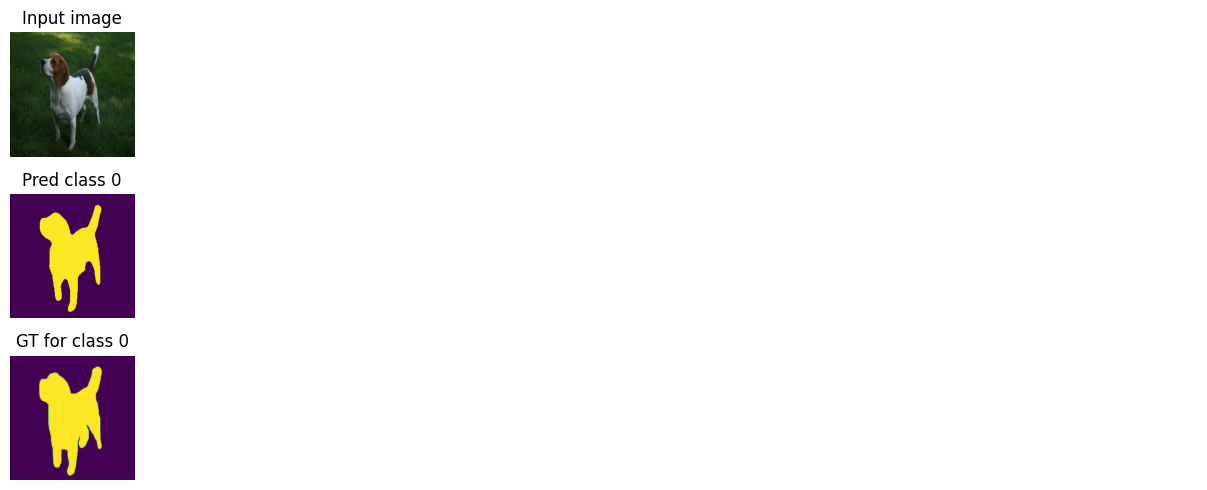

Train loss: 0.07324 | Time: 21m 28s | Val loss: 0.09116
Train_DICE_avg: 0.96117 | Train_Jaccard_avg: 0.92826 | Train_Sensitivity_avg: 0.97131 | Train_Specificity_avg: 0.96475 
Class 0 - Train_DICE: 0.96117 | Train_Jaccard: 0.92826 | Train_Sensitivity: 0.97131 | Train_Specificity: 0.96475 
Val_DICE_avg: 0.94110 | Val_Jaccard_avg: 0.89596 | Val_Sensitivity_avg: 0.95528 | Val_Specificity_avg: 0.95410 
Class 0 - Val_DICE: 0.94110 | Val_Jaccard: 0.89596 | Val_Sensitivity: 0.95528 | Val_Specificity: 0.95410 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07272 | Time: 21m 51s | Val loss: 0.09047
Train_DICE_avg: 0.96120 | Train_Jaccard_avg: 0.92824 | Train_Sensitivity_avg: 0.97172 | Train_Specificity_avg: 0.96369 
Class 0 - Train_DICE: 0.96120 | Train_Jaccard: 0.92824 | Train_Sensitivity: 0.97172 | Train_Specificity: 0.96369 
Val_DICE_avg: 0.94129 | Val_Jaccard_avg: 0.89549 | Val_Sensitivity_avg: 0.95758 | Val_Specificity_avg: 0.95294 
Class 0 - Val_DICE: 0.94129 | Val_Jaccard: 0.89549 | Val_Sensitivity: 0.95758 | Val_Specificity: 0.95294 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07186 | Time: 22m 14s | Val loss: 0.09105
Train_DICE_avg: 0.96160 | Train_Jaccard_avg: 0.92899 | Train_Sensitivity_avg: 0.97240 | Train_Specificity_avg: 0.96326 
Class 0 - Train_DICE: 0.96160 | Train_Jaccard: 0.92899 | Train_Sensitivity: 0.97240 | Train_Specificity: 0.96326 
Val_DICE_avg: 0.94087 | Val_Jaccard_avg: 0.89519 | Val_Sensitivity_avg: 0.95672 | Val_Specificity_avg: 0.95443 
Class 0 - Val_DICE: 0.94087 | Val_Jaccard: 0.89519 | Val_Sensitivity: 0.95672 | Val_Specificity: 0.95443 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07124 | Time: 22m 38s | Val loss: 0.09025
Train_DICE_avg: 0.96218 | Train_Jaccard_avg: 0.93009 | Train_Sensitivity_avg: 0.97225 | Train_Specificity_avg: 0.96518 
Class 0 - Train_DICE: 0.96218 | Train_Jaccard: 0.93009 | Train_Sensitivity: 0.97225 | Train_Specificity: 0.96518 
Val_DICE_avg: 0.94160 | Val_Jaccard_avg: 0.89580 | Val_Sensitivity_avg: 0.95630 | Val_Specificity_avg: 0.95476 
Class 0 - Val_DICE: 0.94160 | Val_Jaccard: 0.89580 | Val_Sensitivity: 0.95630 | Val_Specificity: 0.95476 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07084 | Time: 23m 1s | Val loss: 0.08958
Train_DICE_avg: 0.96193 | Train_Jaccard_avg: 0.92959 | Train_Sensitivity_avg: 0.97263 | Train_Specificity_avg: 0.96478 
Class 0 - Train_DICE: 0.96193 | Train_Jaccard: 0.92959 | Train_Sensitivity: 0.97263 | Train_Specificity: 0.96478 
Val_DICE_avg: 0.94124 | Val_Jaccard_avg: 0.89554 | Val_Sensitivity_avg: 0.95600 | Val_Specificity_avg: 0.95512 
Class 0 - Val_DICE: 0.94124 | Val_Jaccard: 0.89554 | Val_Sensitivity: 0.95600 | Val_Specificity: 0.95512 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

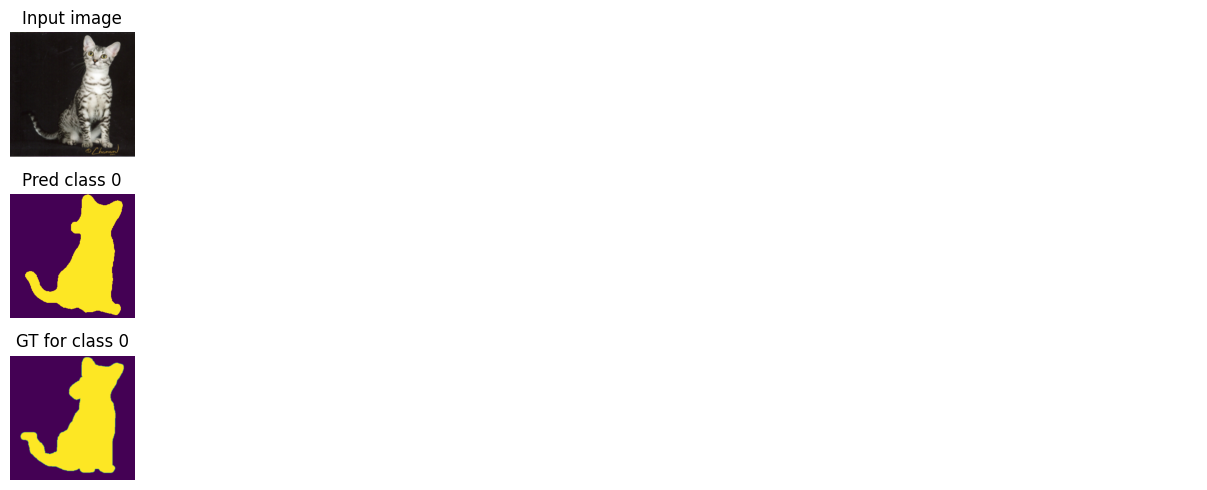

Train loss: 0.07018 | Time: 23m 25s | Val loss: 0.08986
Train_DICE_avg: 0.96241 | Train_Jaccard_avg: 0.93049 | Train_Sensitivity_avg: 0.97326 | Train_Specificity_avg: 0.96472 
Class 0 - Train_DICE: 0.96241 | Train_Jaccard: 0.93049 | Train_Sensitivity: 0.97326 | Train_Specificity: 0.96472 
Val_DICE_avg: 0.94059 | Val_Jaccard_avg: 0.89497 | Val_Sensitivity_avg: 0.95841 | Val_Specificity_avg: 0.95392 
Class 0 - Val_DICE: 0.94059 | Val_Jaccard: 0.89497 | Val_Sensitivity: 0.95841 | Val_Specificity: 0.95392 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]



Global Performance Metrics:
Loss mean: 0.09157, std: 0.01162
Dice Coefficient mean: 0.94713, std: 0.04365
Jaccard Index mean: 0.90240, std: 0.06870
Sensitivity mean: 0.94851, std: 0.04445
Specificity mean: 0.96706, std: 0.04041

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94713, std: 0.04365
Jaccard mean: 0.90240, std: 0.06870
Sensitivity mean: 0.94851, std: 0.04445
Specificity mean: 0.96706, std: 0.04041
